In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
data = pd.read_csv('Capstone_Time_Series_ML_2019.csv')

In [0]:
data.head(1000)

thanksgiving  christmas  ...  location_num  federalholiday_name 
0               0          0  ...          2567           Regular-day
1               0          0  ...          1418           Regular-day
2               0          0  ...          1493           Regular-day
3               0          0  ...         71235           Regular-day
4               0          0  ...          1572           Regular-day
5               0          0  ...          4783           Regular-day
6               0          0  ...          2454           Regular-day
7               0          0  ...          3652           Regular-day
8               0          0  ...          3088           Regular-day
9               0          0  ...          1316           Regular-day
10              0          0  ...          4306           Regular-day
11              0          0  ...          4103           Regular-day
12              0          0  ...          3225           Regular-day
13              0          0  ...          2828           Regular-day
14              0          0  ...          4762           Regular-day
15              0          0  ...          3413           Regular-day
16              0          0  ...          2526           Regular-day
17              0          0  ...          3035           Regular-day
18              0          0  ...          1254           Regular-day
19              0          0  ...          4219           Regular-day
20              0          0  ...          2376           Regular-day
21              0          0  ...          4340           Regular-day
22              0          0  ...          2014           Regular-day
23              0          0  ...          4189           Regular-day
24              0          0  ...          1665           Regular-day
25              0          0  ...          4419           Regular-day
26              0          0  ...          2835           Regular-day
27              0          0  ...          1886           Regular-day
28              0          0  ...          4120           Regular-day
29              0          0  ...          2972           Regular-day
..            ...        ...  ...           ...                   ...
970             0          0  ...          4306           Regular-day
971             0          0  ...          1572           Regular-day
972             0          0  ...          4340           Regular-day
973             0          0  ...          4103           Regular-day
974             0          0  ...          2715           Regular-day
975             0          0  ...          2526           Regular-day
976             0          0  ...          2998           Regular-day
977             0          0  ...          4120           Regular-day
978             0          0  ...          2567           Regular-day
979             0          0  ...          1401           Regular-day
980             0          0  ...          1886           Regular-day
981             0          0  ...          1493           Regular-day
982             0          0  ...          4419           Regular-day
983             0          0  ...          2454           Regular-day
984             0          0  ...          3225           Regular-day
985             0          0  ...          2835           Regular-day
986             0          0  ...          3035           Regular-day
987             0          0  ...          2376           Regular-day
988             0          0  ...          2014           Regular-day
989             0          0  ...          1316           Regular-day
990             0          0  ...          2907           Regular-day
991             0          0  ...          3652           Regular-day
992             0          0  ...          1607           Regular-day
993             0          0  ...         71235           Regular-day
994             0          0  ...          4783           Regular-day
995            

In [0]:
#Getting basic details of the data
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81520 entries, 0 to 81519
Data columns (total 13 columns):
thanksgiving                         81520 non-null int64
christmas                            81520 non-null int64
onedaypriorchristmas_and_new_year    81520 non-null int64
federalholiday                       81520 non-null int64
holiday                              81520 non-null int64
blackfridaycheck                     81520 non-null int64
business_date                        81520 non-null object
dayofweek                            81520 non-null int64
Weekends                             81520 non-null int64
sales                                81520 non-null float64
trans                                81520 non-null int64
location_num                         81520 non-null int64
federalholiday_name                  81520 non-null object
dtypes: float64(1), int64(10), object(2)
memory usage: 8.1+ MB
None
       thanksgiving     christmas  ...         trans  location_nu

In [0]:
#Importing datetime lib so that data could be differentiated by Month and year
import datetime

In [0]:
data['business_date'] = pd.to_datetime(data['business_date'])
data['business_date'] = pd.to_datetime(data['business_date'])

In [0]:
data['year'] = data['business_date'].dt.year
data['month'] = data['business_date'].dt.month

Text(0, 0.5, 'Sales')

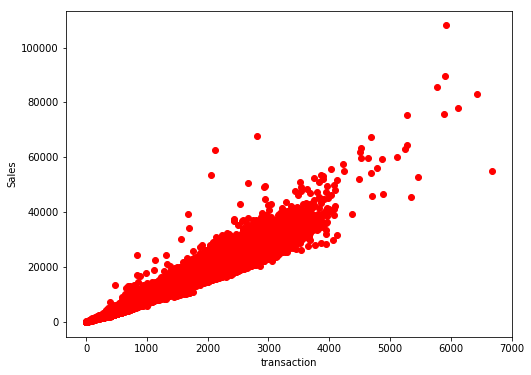

In [0]:
#plot between transaction and sale
plt.figure(figsize=(8,6))
plt.plot(data['trans'],data['sales'],'ro')
plt.xlabel('transaction')
plt.ylabel('Sales')

In [0]:
# Quarterly basis
data['quarter'] = data['month'].apply(lambda x: 1 if ((x>=1) & (x<=3)) else 2 if ((x>=4) & (x<=6)) else 3 if ((x>=7 )& (x<=9)) else 4)

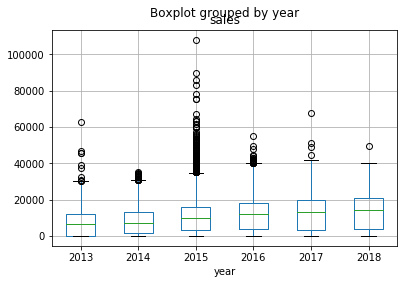

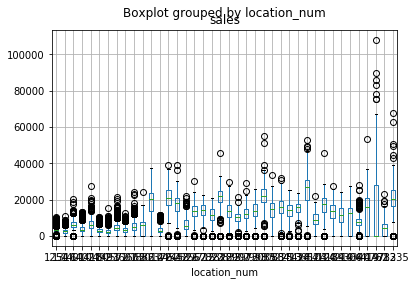

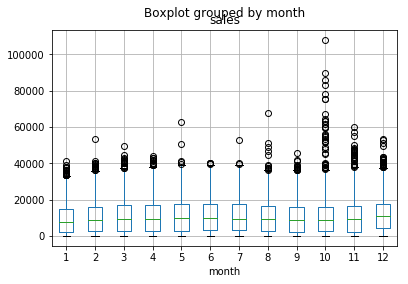

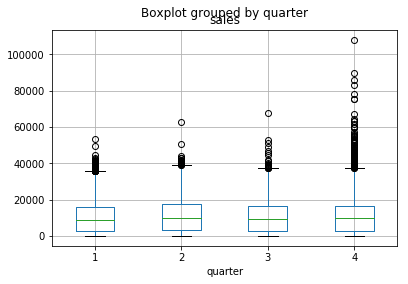

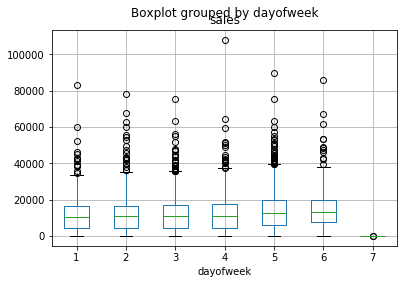

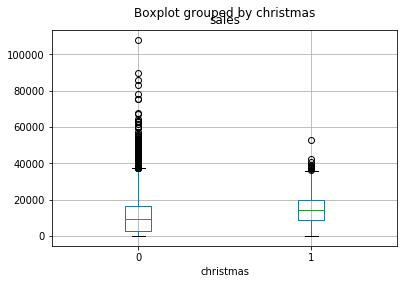

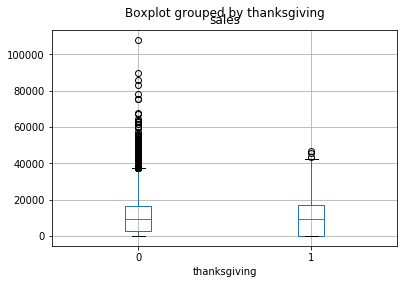

In [0]:
#boxplot of data quarterly,monthly, yearly and specific dates 
data.boxplot(column='sales', by = 'year')
data.boxplot(column='sales', by = 'location_num')
data.boxplot(column='sales', by = 'month')
data.boxplot(column='sales', by = 'quarter')
data.boxplot(column='sales', by = 'dayofweek')
data.boxplot(column='sales', by = 'christmas')
data.boxplot(column='sales', by = 'thanksgiving')

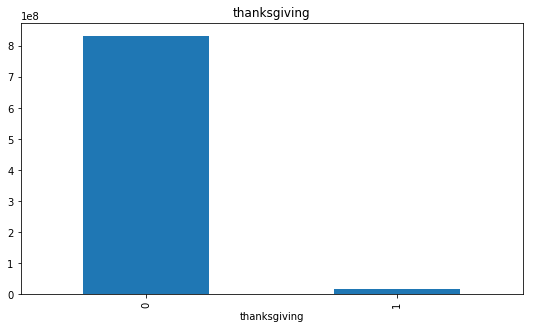

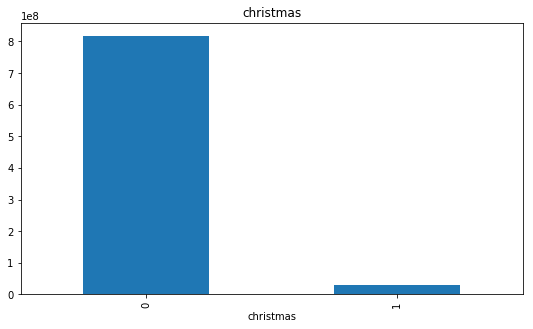

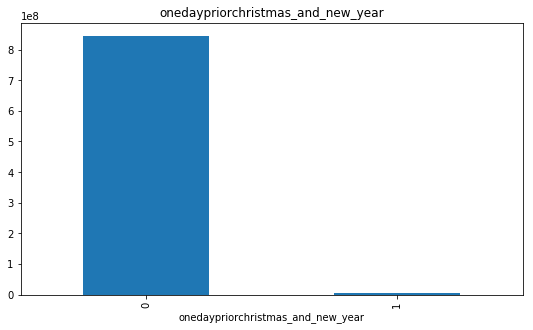

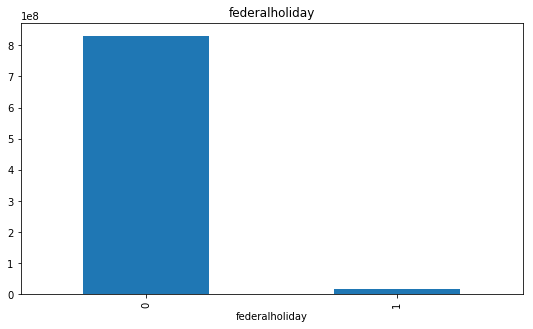

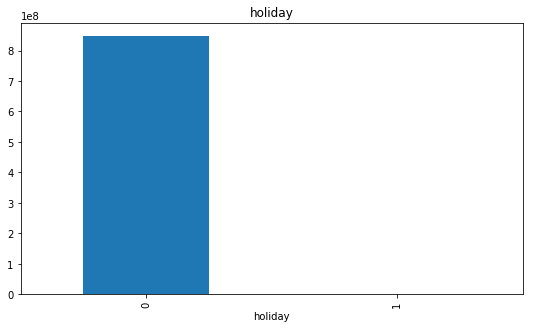

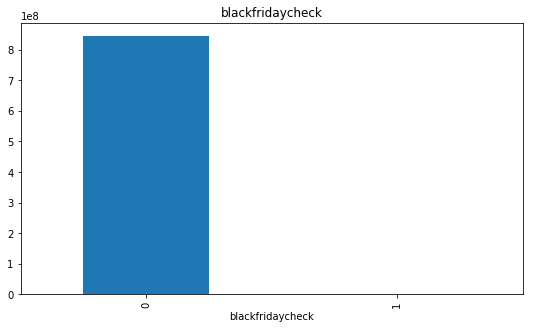

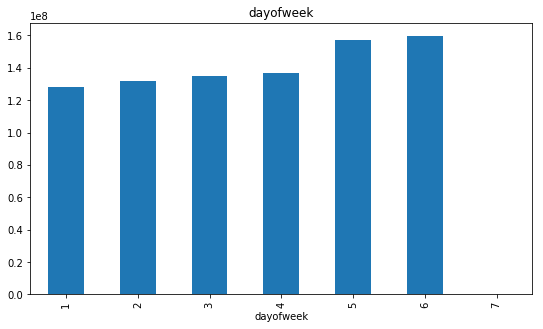

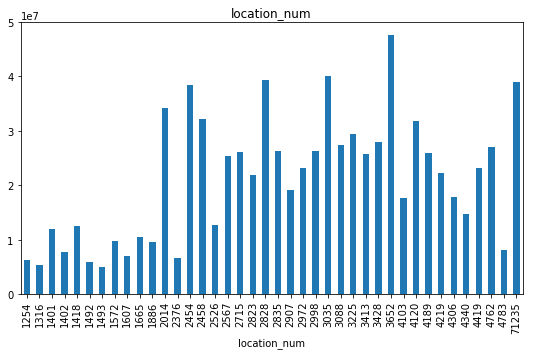

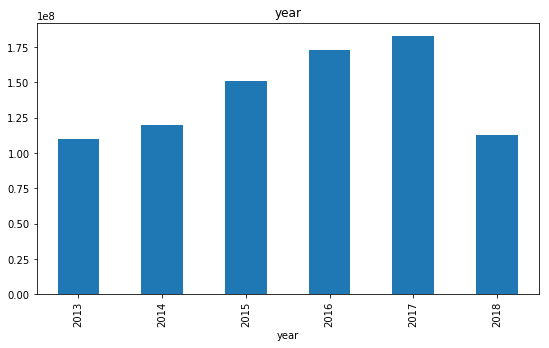

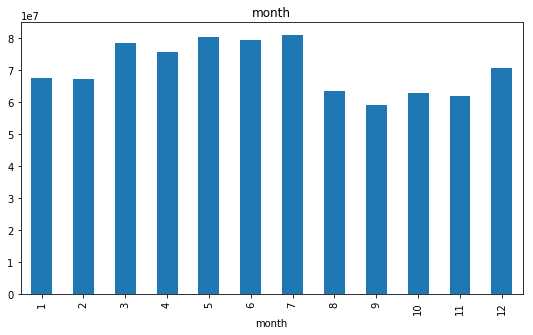

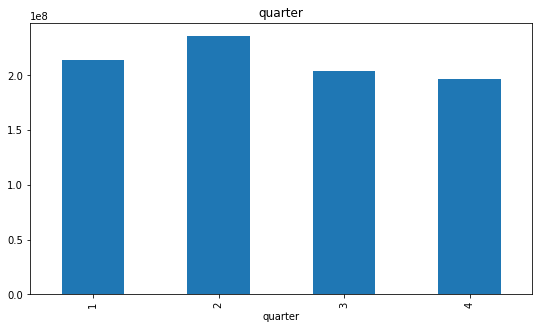

In [0]:
for i in ['thanksgiving', 'christmas', 'onedaypriorchristmas_and_new_year','federalholiday', 'holiday', 'blackfridaycheck','dayofweek','location_num','year', 'month', 'quarter']:
    test = data.groupby([i]).sales.sum()
    test.plot(kind = 'bar',figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()
    

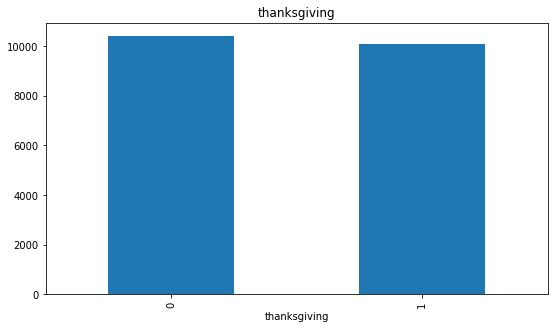

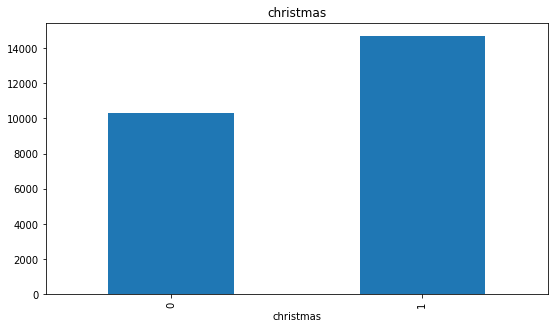

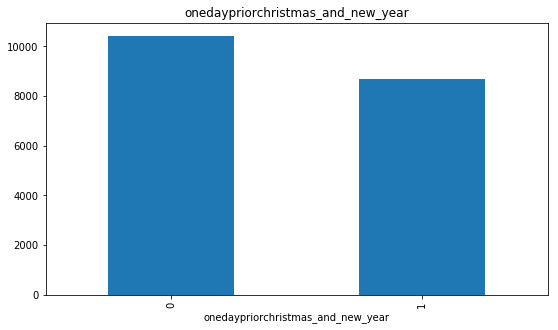

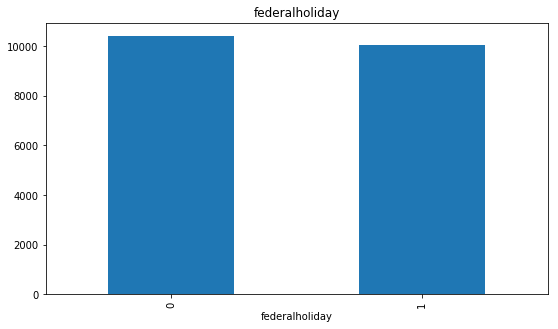

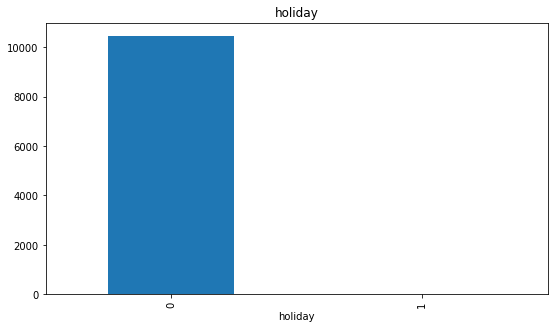

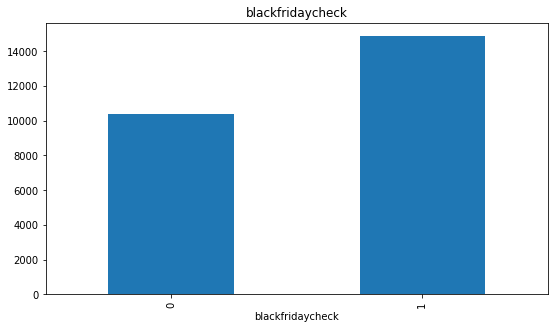

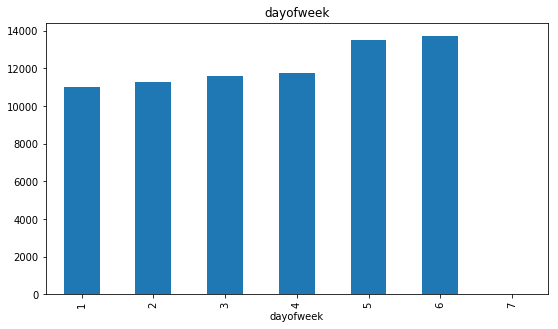

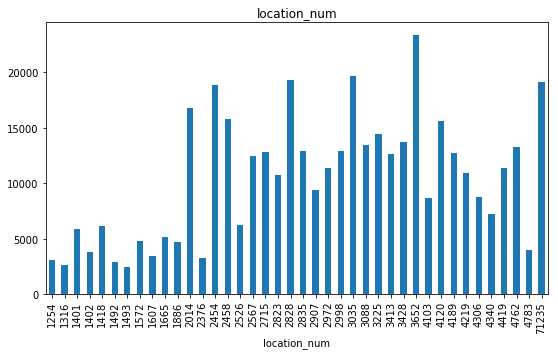

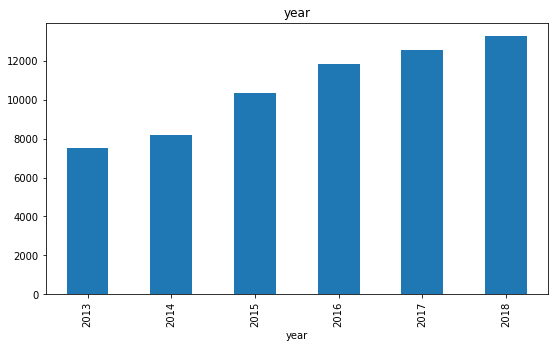

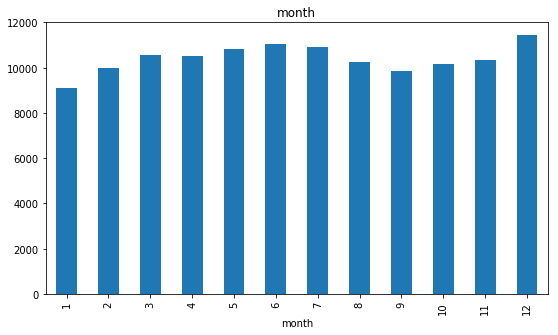

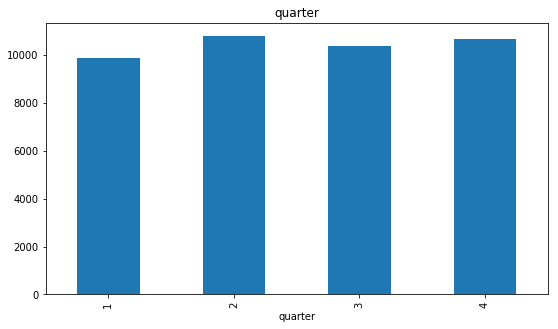

In [0]:
#Plotting sales vs i 
for i in ['thanksgiving', 'christmas', 'onedaypriorchristmas_and_new_year','federalholiday', 'holiday', 'blackfridaycheck','dayofweek','location_num','year', 'month', 'quarter']:
    test = data.groupby([i]).sales.mean()
    test.plot(kind = 'bar',figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()

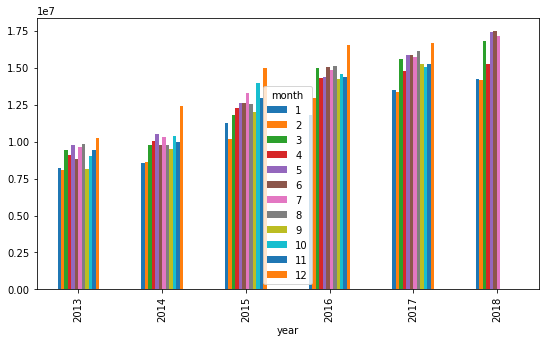

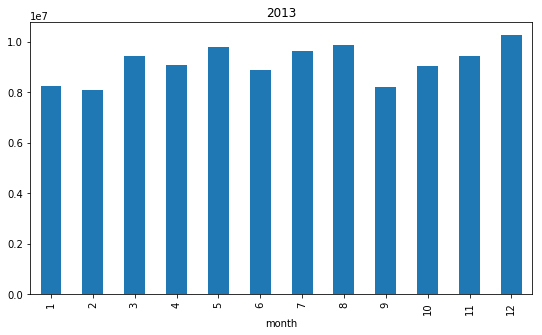

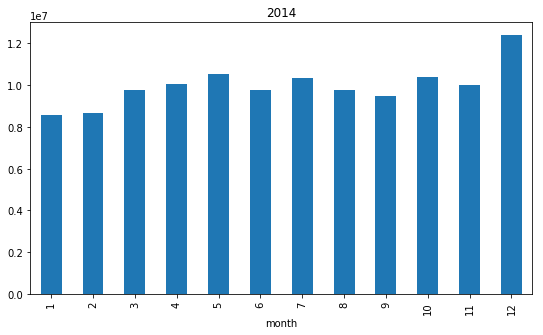

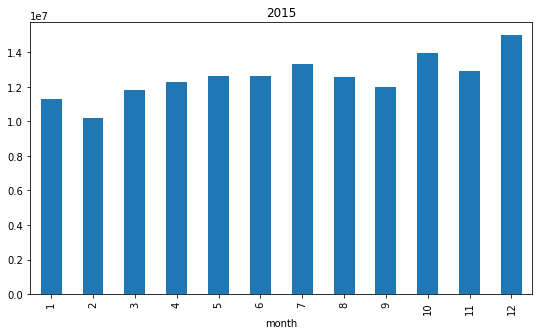

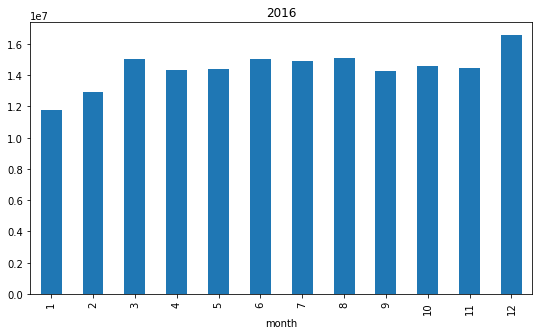

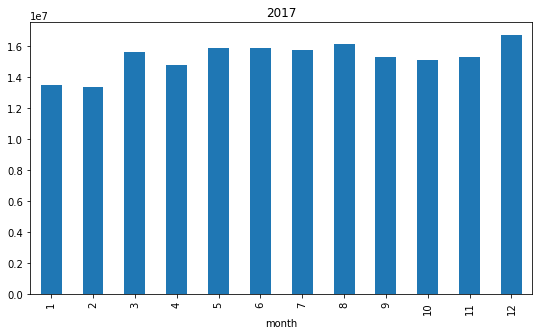

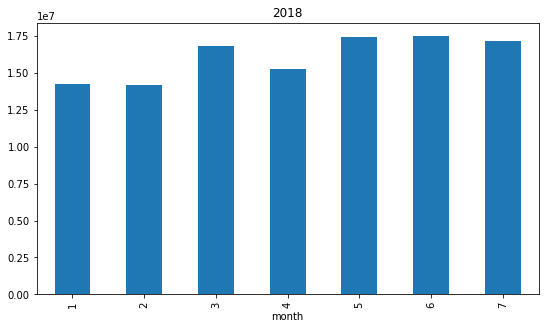

In [0]:
#Plotting sales over the months for various years
temp = data.pivot_table(values = 'sales', columns= 'month', index='year', aggfunc= 'sum')
temp.plot(kind = 'bar',figsize=(9,5), sharey = True)
plt.show()
for i in data['year'].unique():
    test = data[data['year'] == i]
    temp = test.groupby(['month']).sales.sum()
    temp.plot(kind = 'bar',figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()

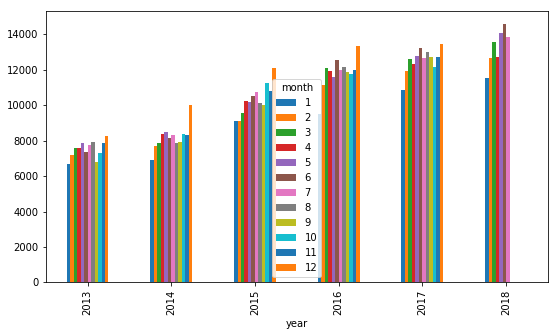

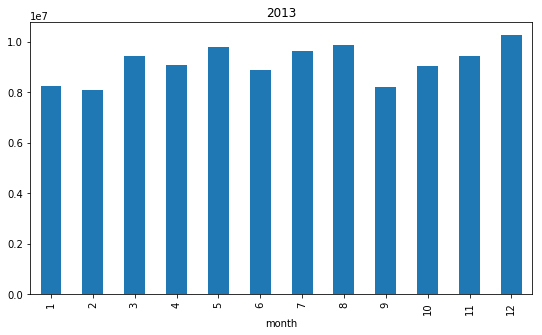

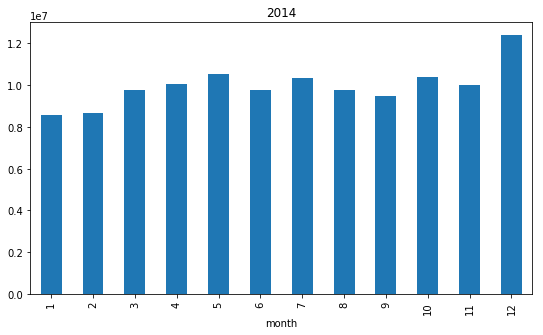

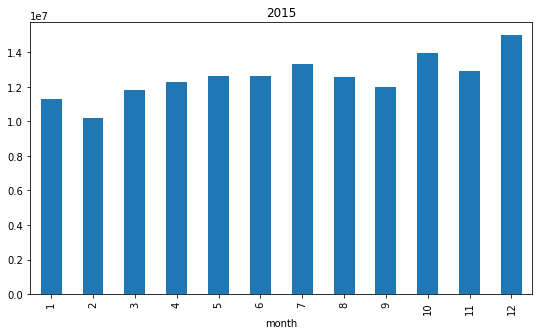

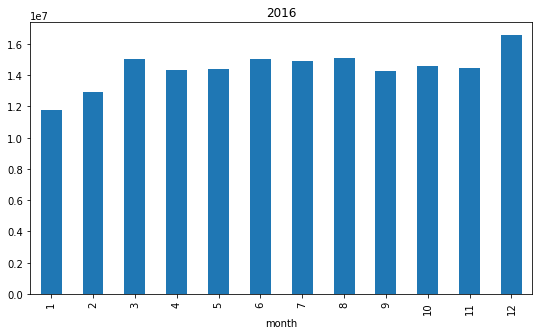

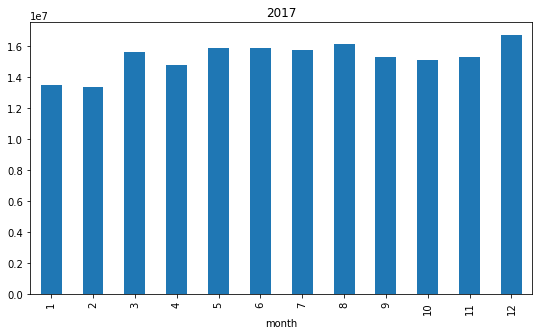

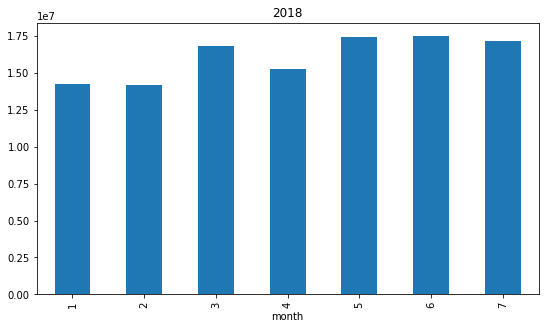

In [0]:
temp = data.pivot_table(values = 'sales', columns= 'month', index='year', aggfunc= 'mean')
temp.plot(kind = 'bar',figsize=(9,5), sharey = True)
plt.show()
for i in data['year'].unique():
    test = data[data['year'] == i]
    temp = test.groupby(['month']).sales.sum()
    temp.plot(kind = 'bar',figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()

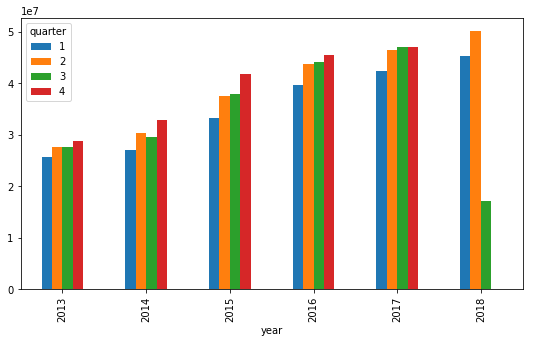

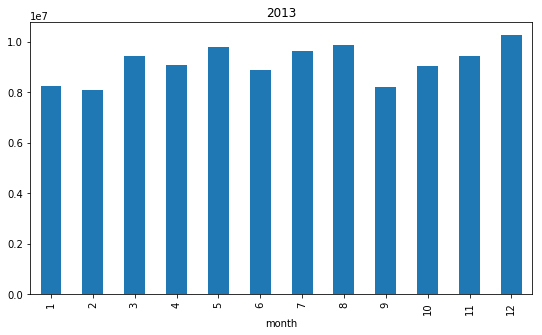

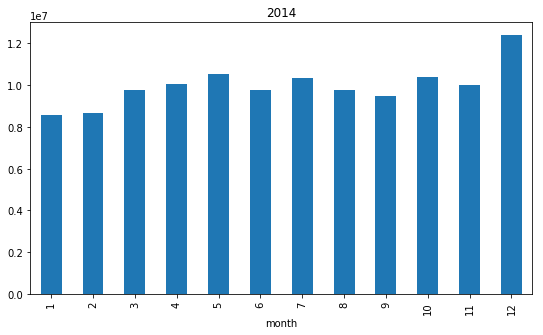

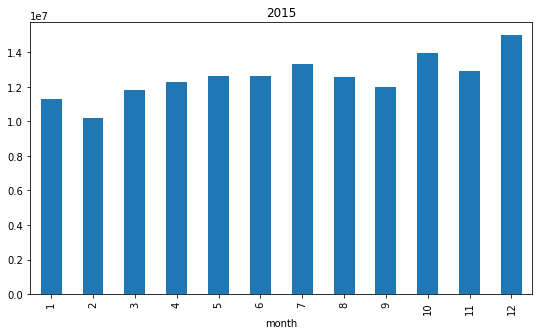

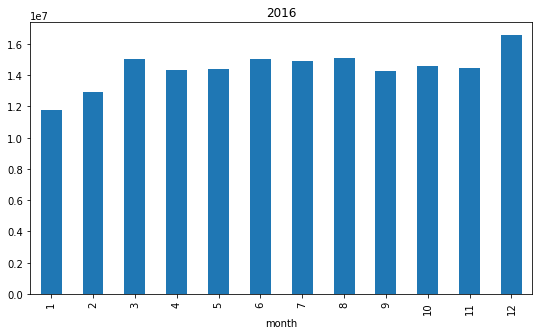

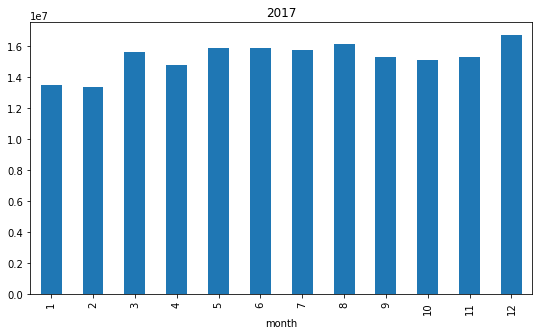

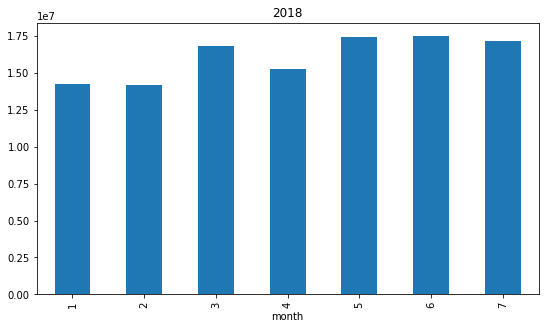

In [0]:
#Plotting sales over the quarters for different years
temp = data.pivot_table(values = 'sales', columns= 'quarter', index='year', aggfunc= 'sum')
temp.plot(kind = 'bar',figsize=(9,5), sharey = True)
plt.show()
for i in data['year'].unique():
    test = data[data['year'] == i]
    temp = test.groupby(['month']).sales.sum()
    temp.plot(kind = 'bar',figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()

# LOCATION_WISE ANALYSIS

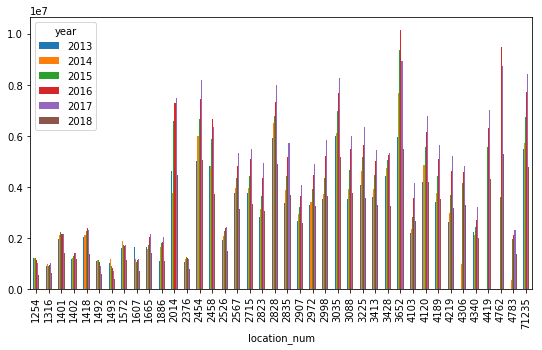

In [0]:
#Plotting sales over different locations
temp = data.pivot_table(values = 'sales', columns= 'year', index='location_num', aggfunc= 'sum')
temp.plot(kind = 'bar',figsize=(9,5), sharey = True)

In [0]:
df1 = pd.DataFrame({'Best_shop':temp.idxmax()},index = temp.idxmax().index)
df2 = pd.DataFrame({'Total_Sales':temp.max()},index = temp.max().index)
pd.merge(df1, df2, how ='inner', on =df1.index)

key_0  Best_shop  Total_Sales
0   2013       3035   5997199.43
1   2014       3652   7690766.85
2   2015       3652   9347846.04
3   2016       3652  10128707.08
4   2017       3652   8940994.27
5   2018       3652   5498471.25

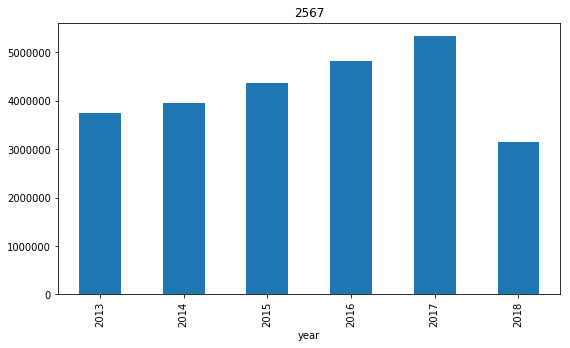

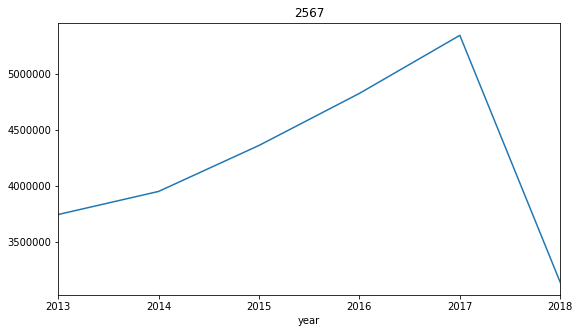

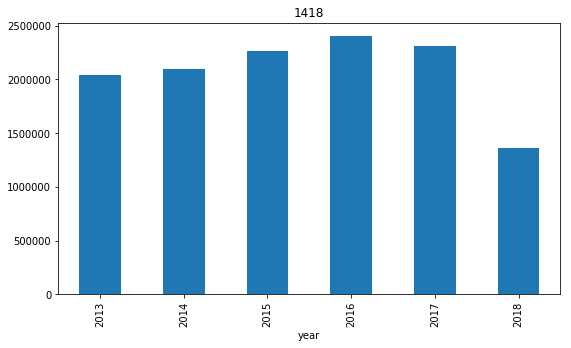

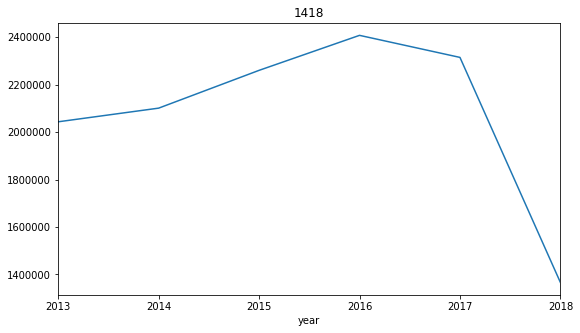

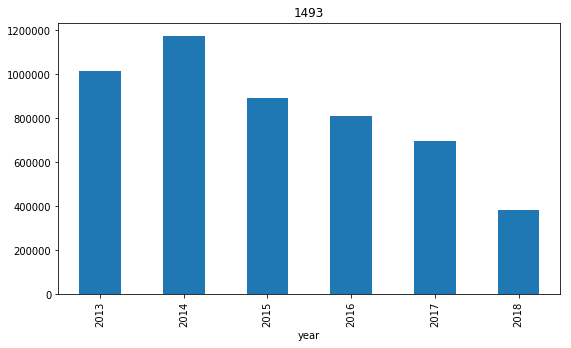

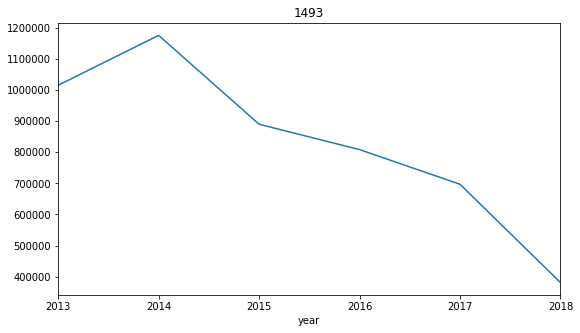

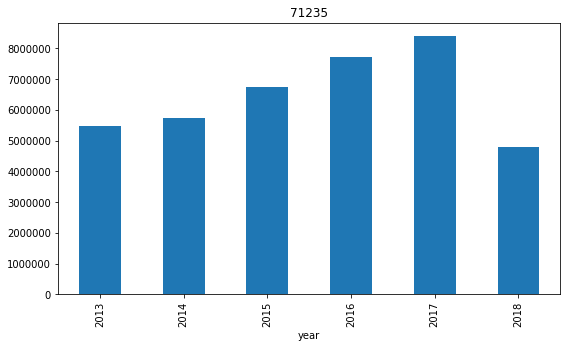

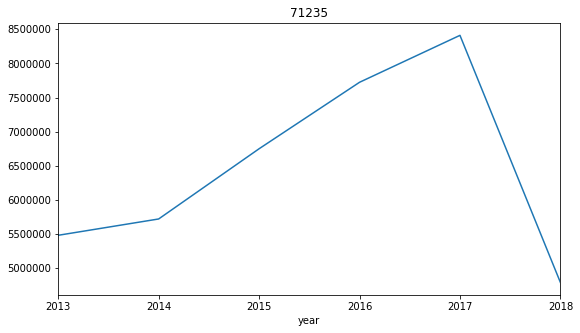

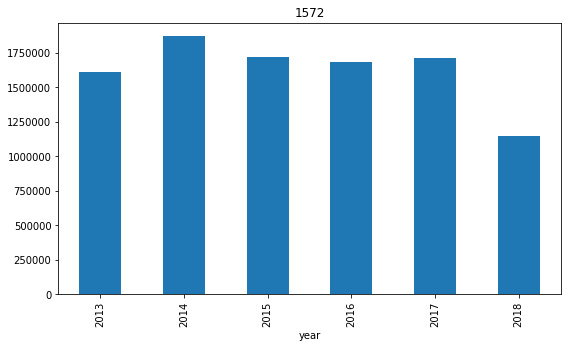

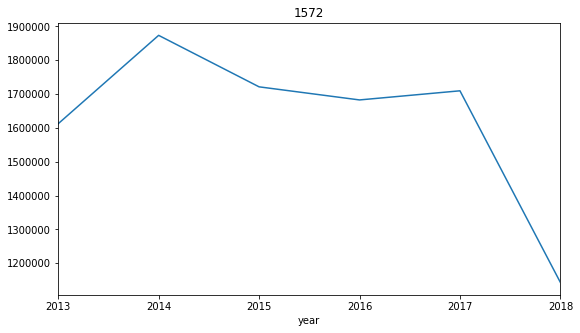

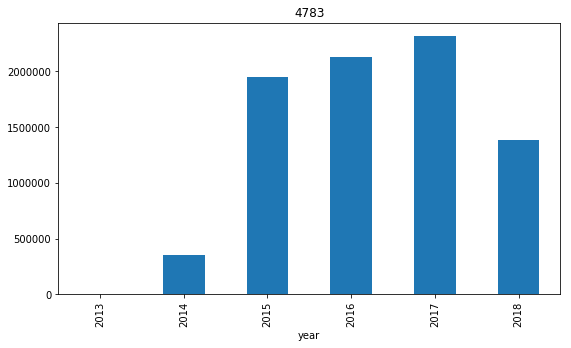

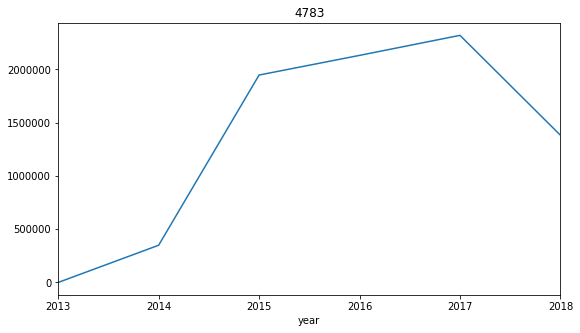

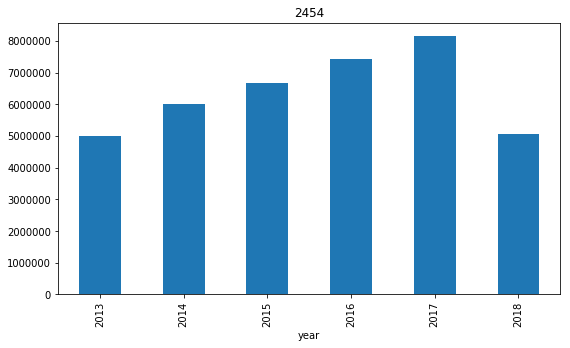

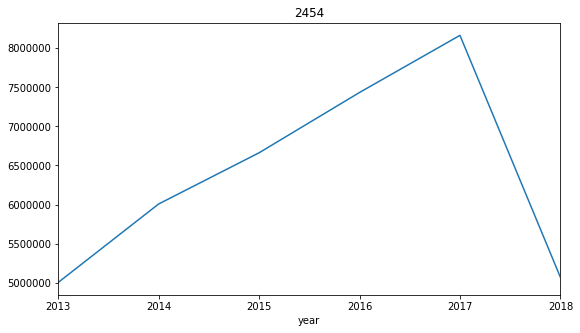

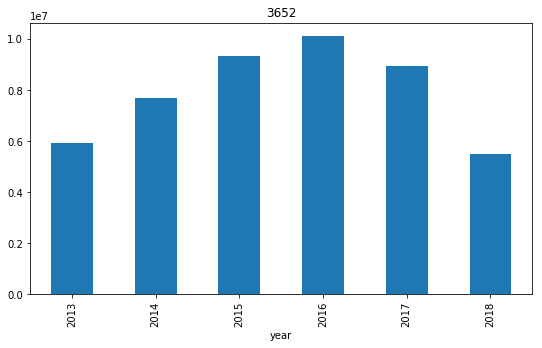

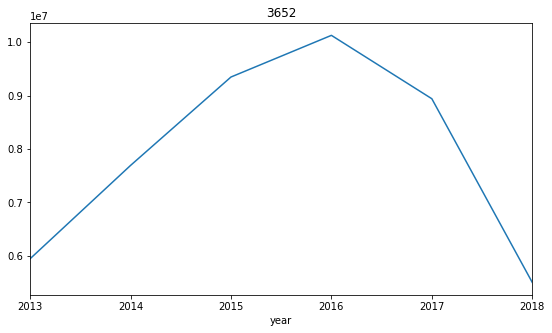

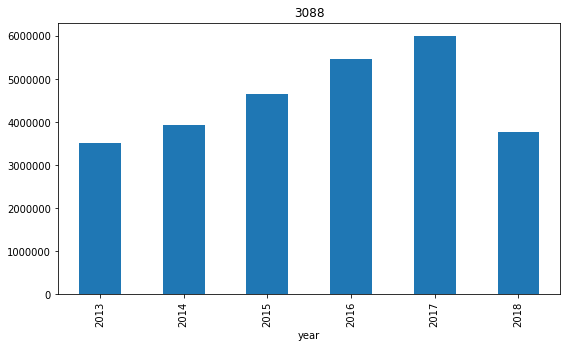

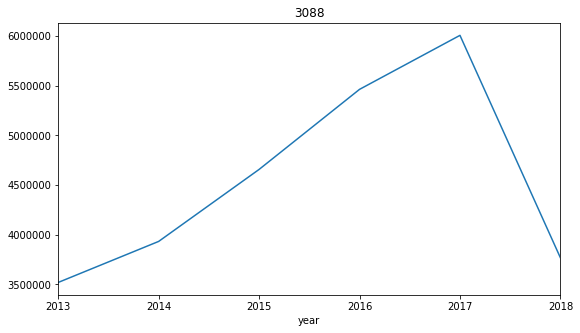

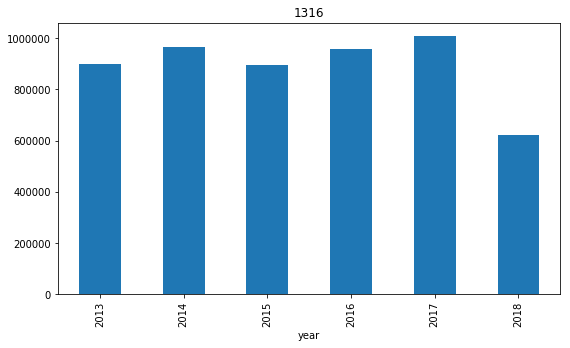

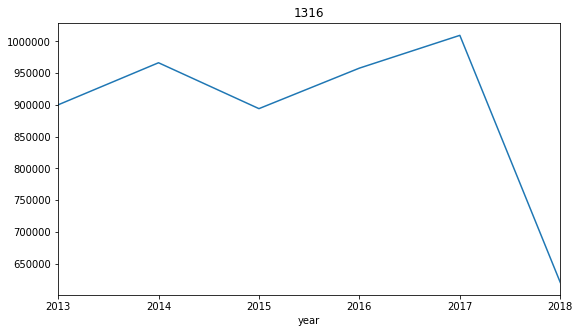

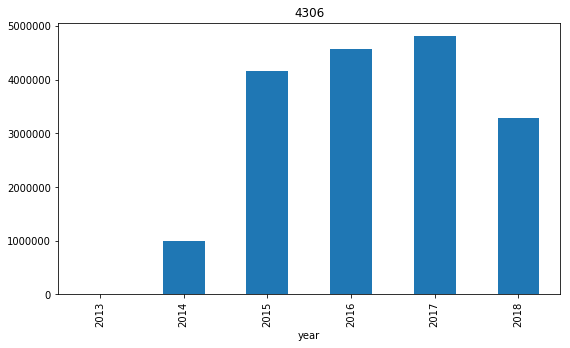

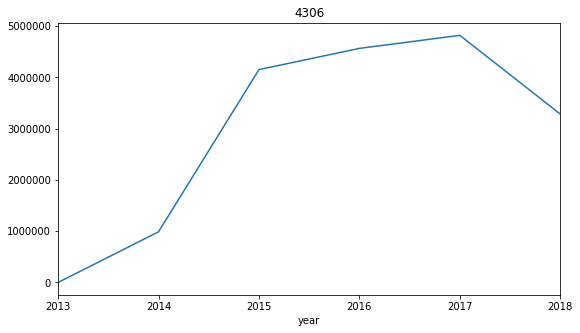

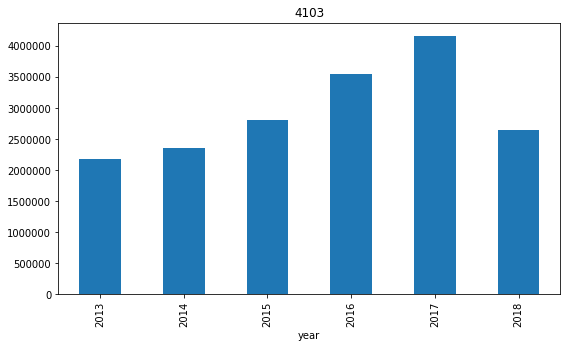

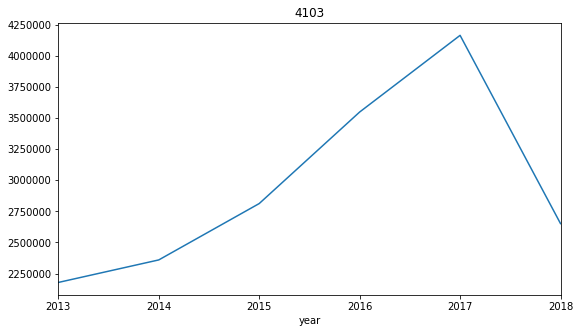

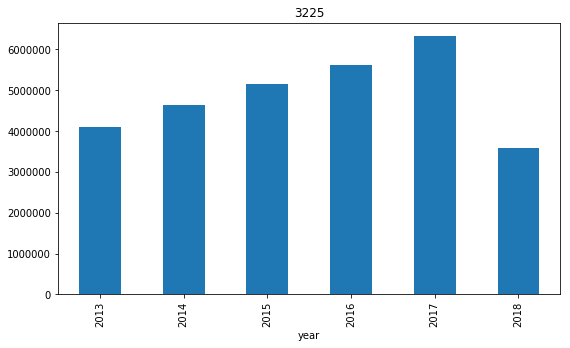

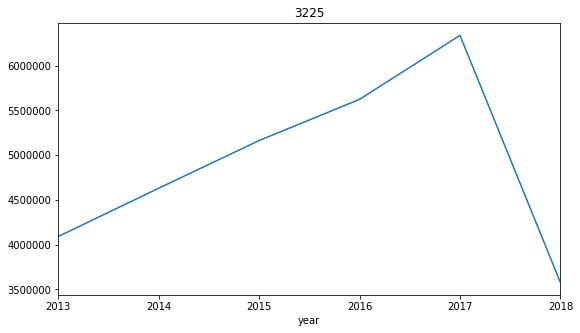

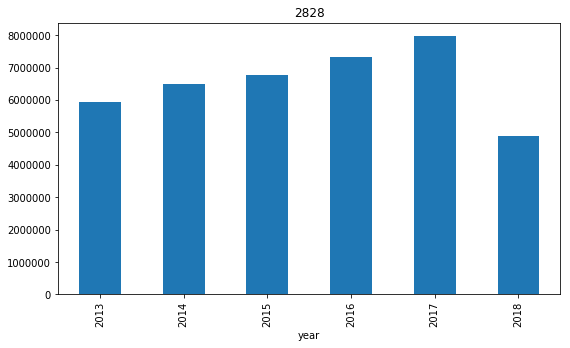

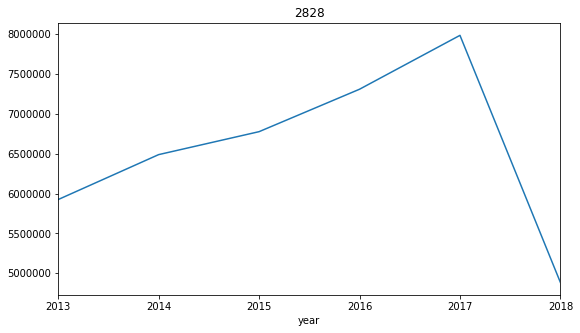

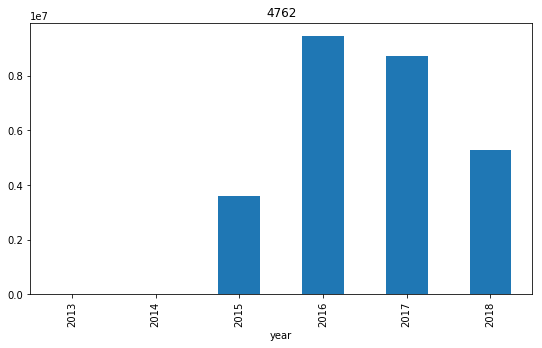

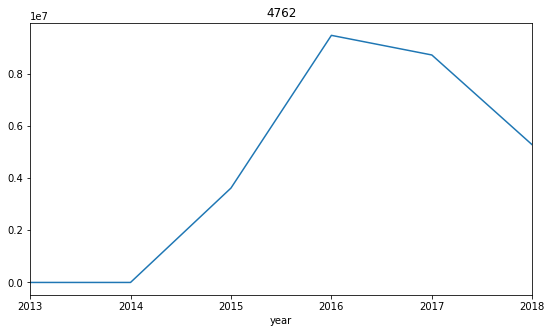

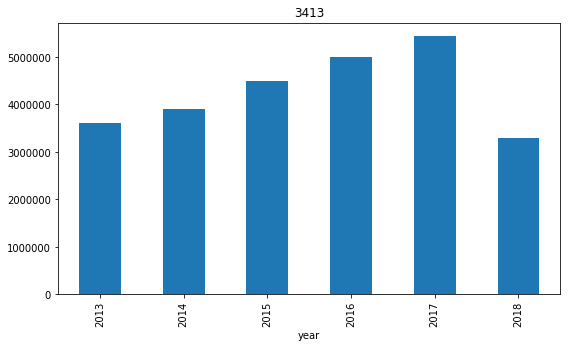

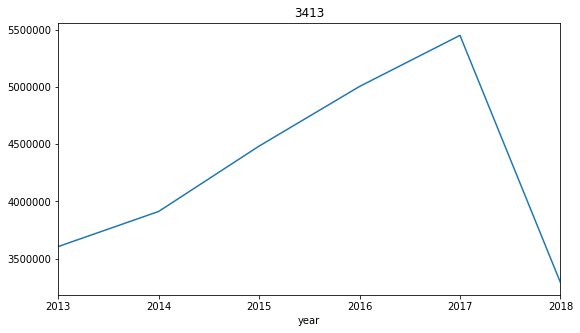

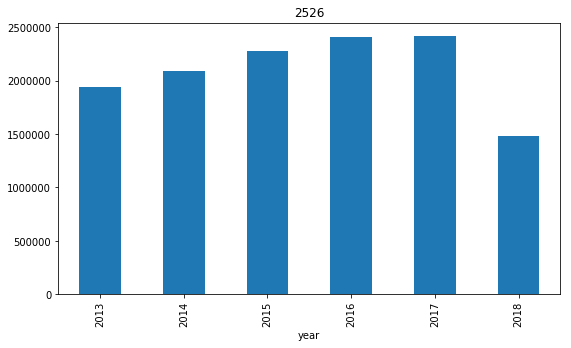

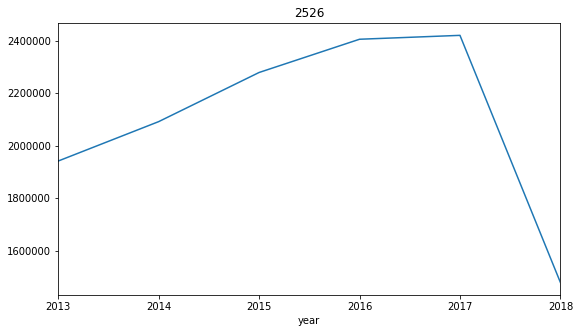

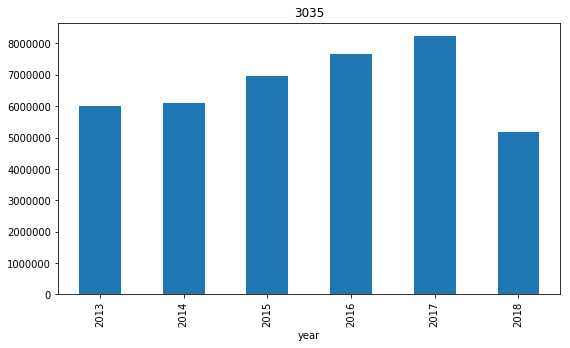

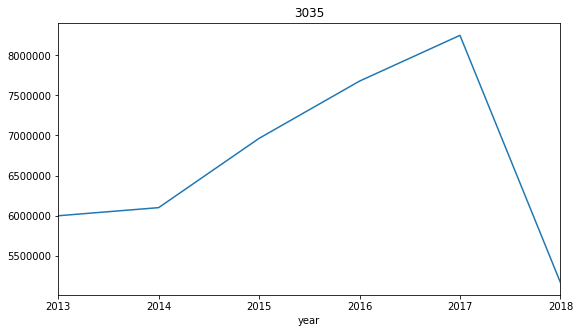

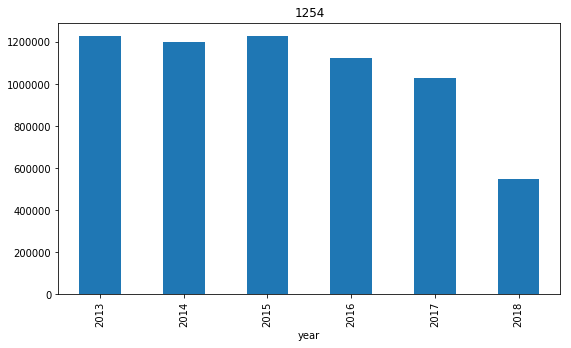

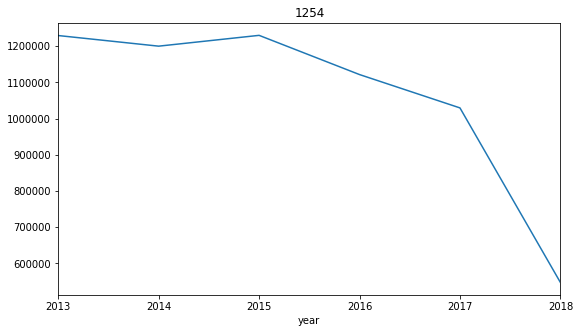

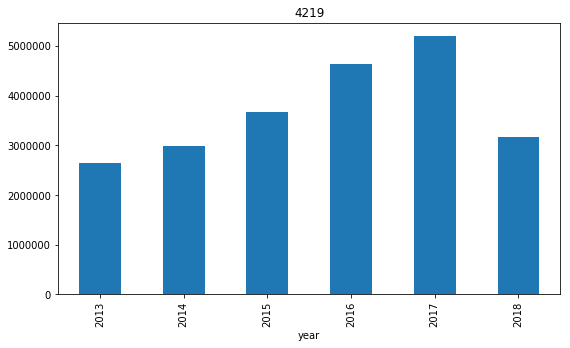

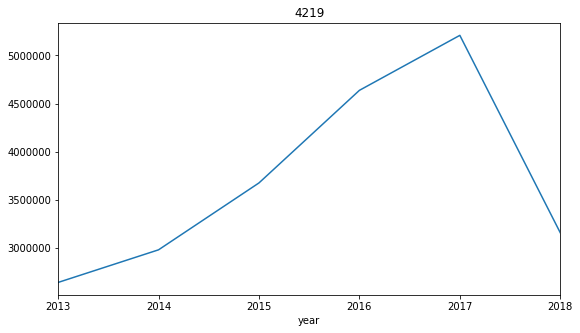

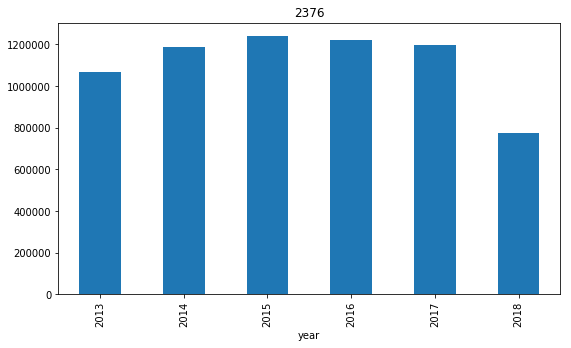

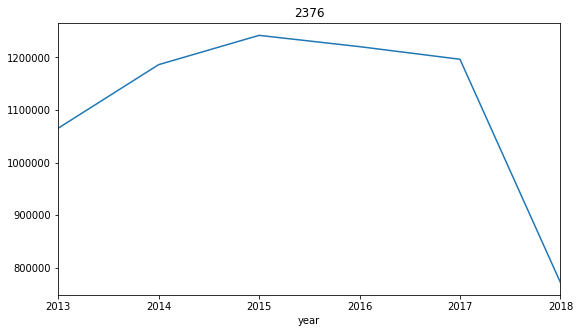

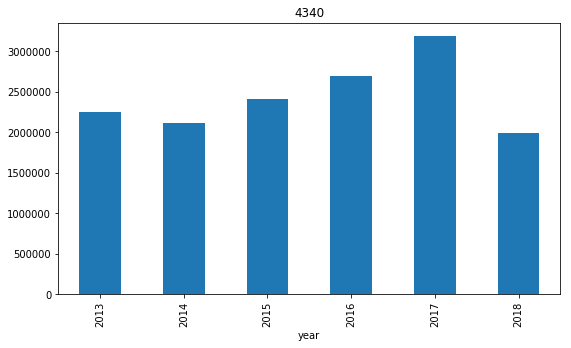

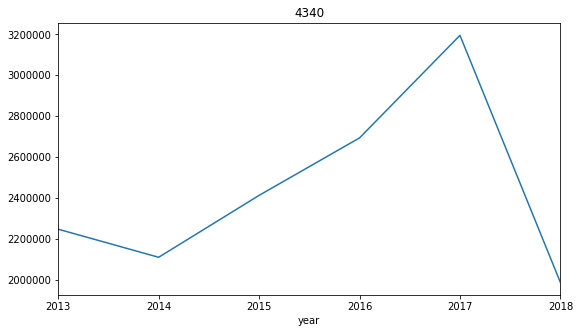

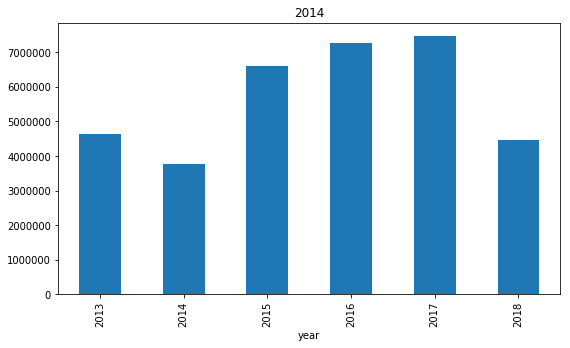

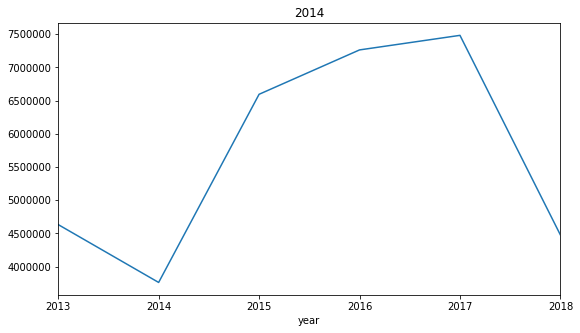

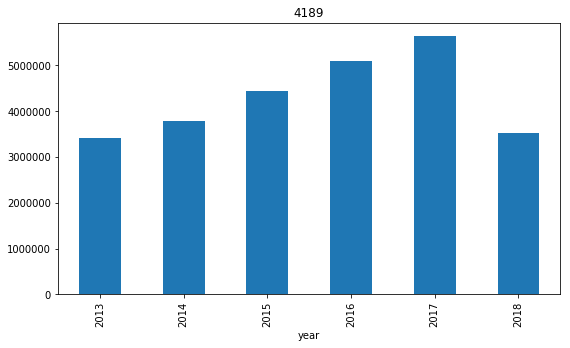

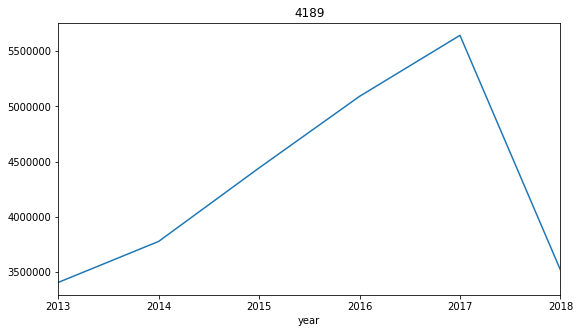

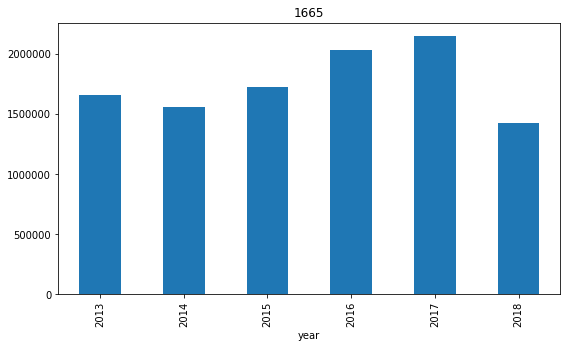

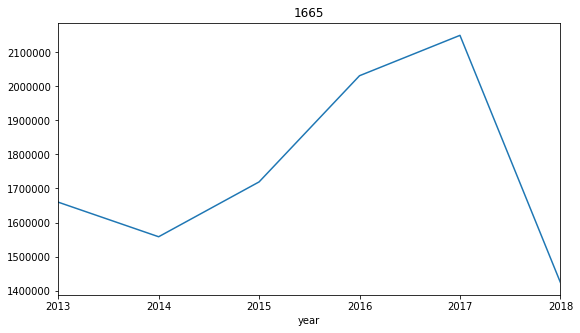

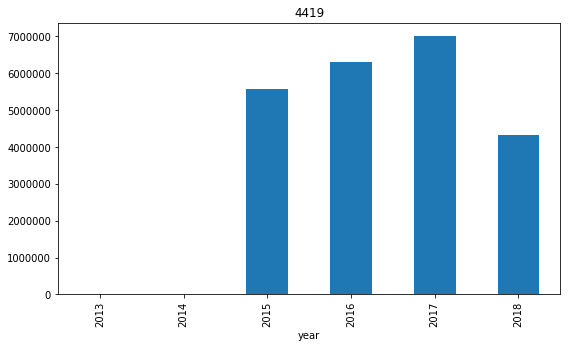

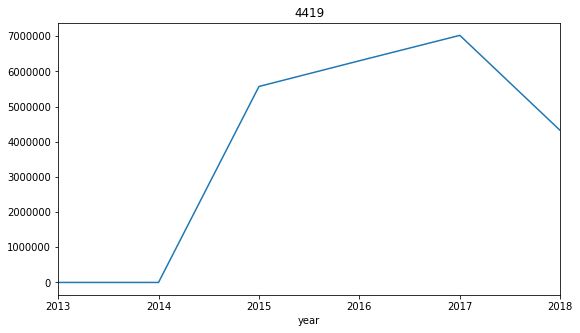

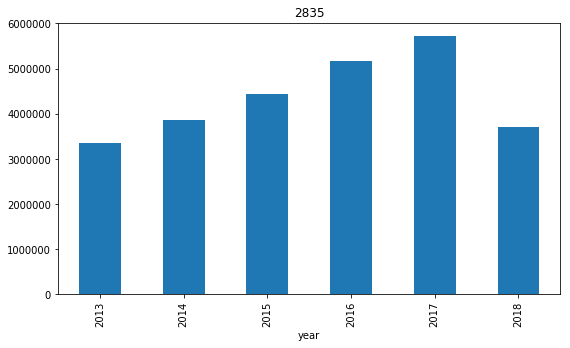

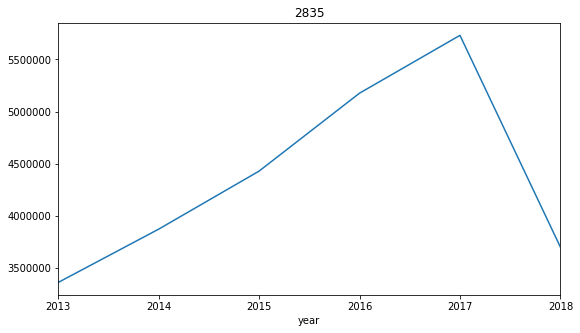

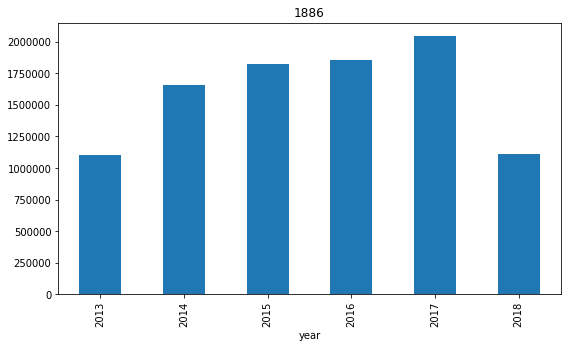

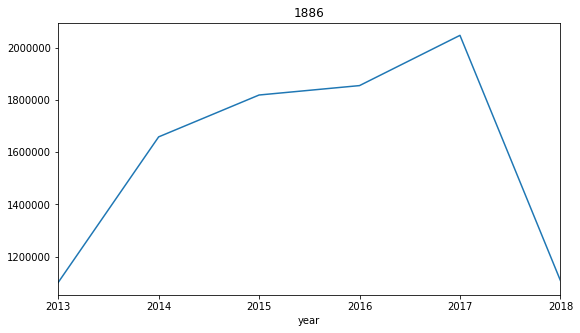

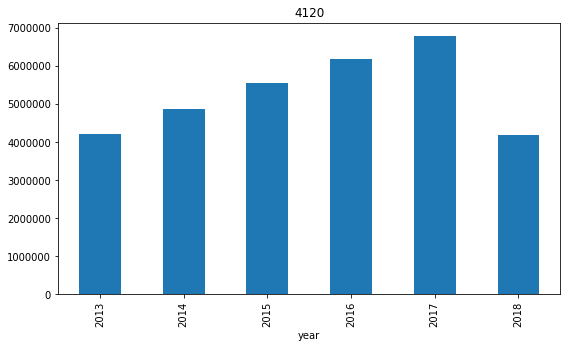

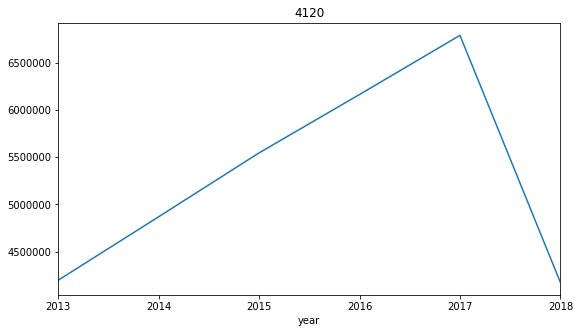

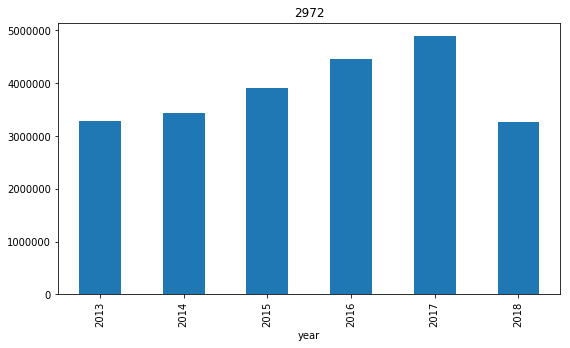

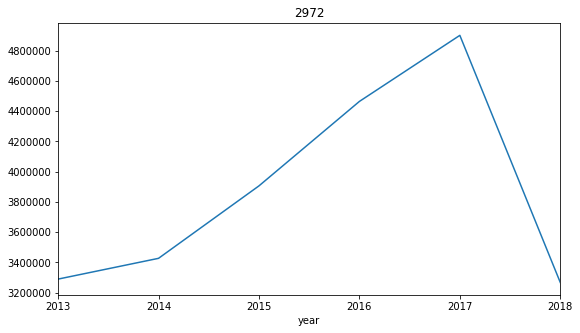

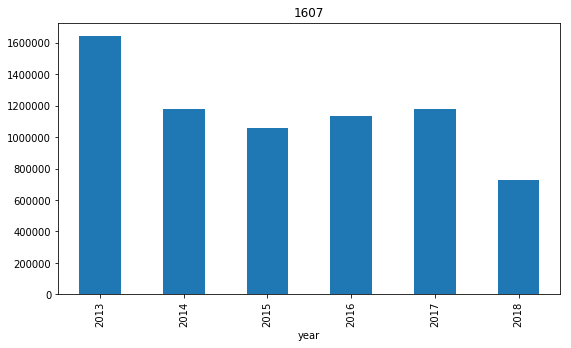

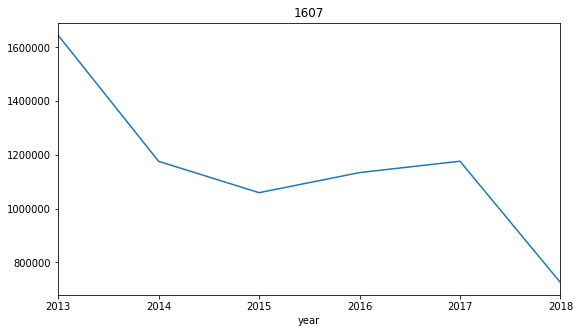

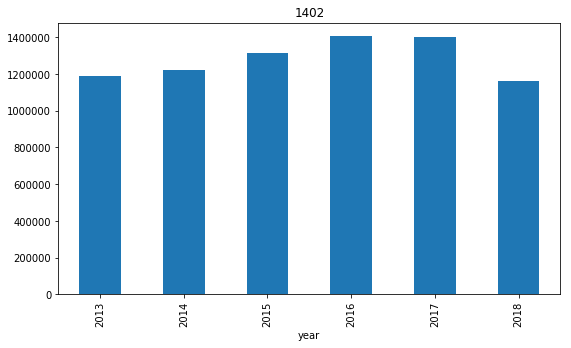

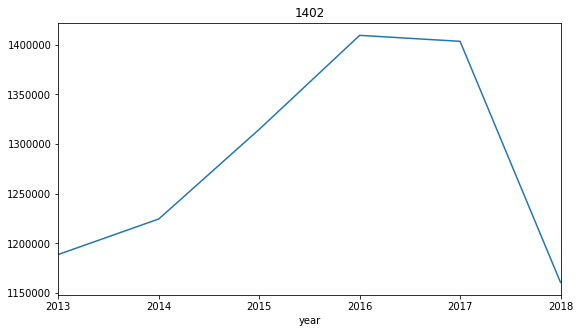

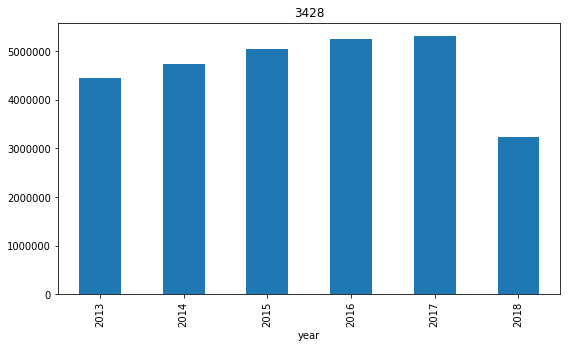

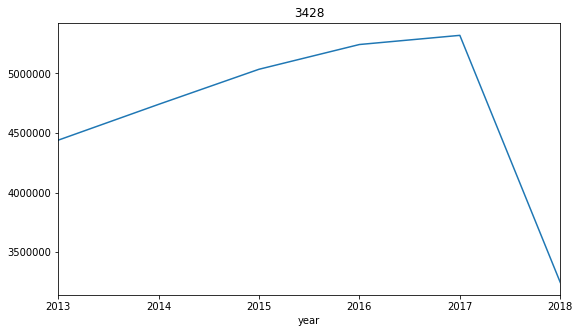

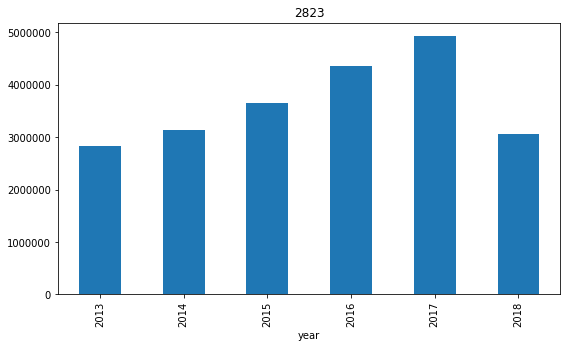

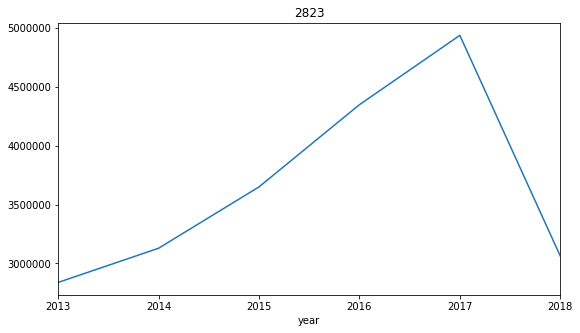

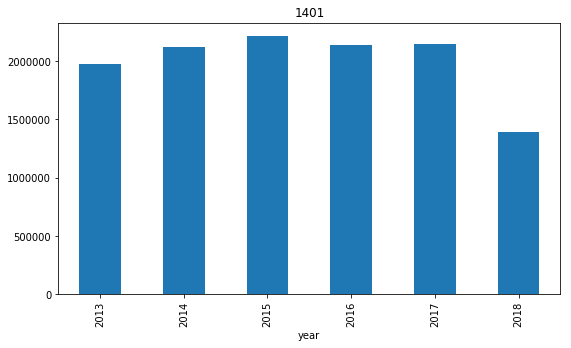

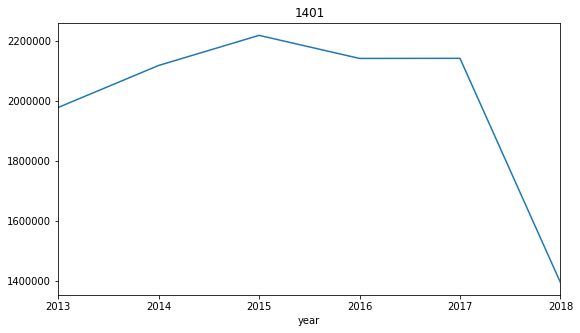

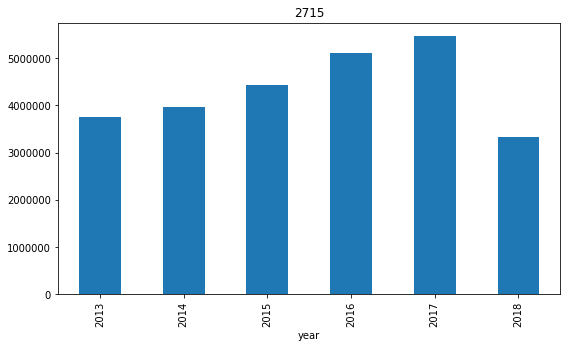

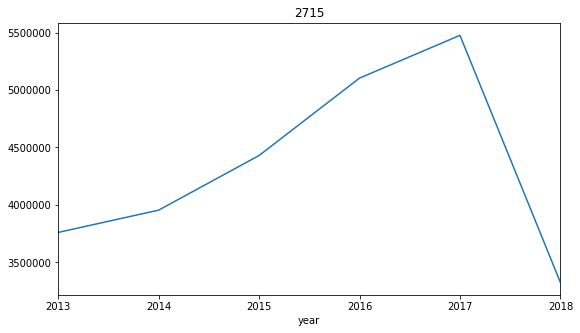

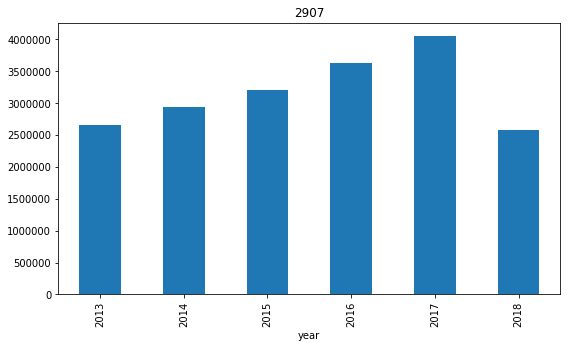

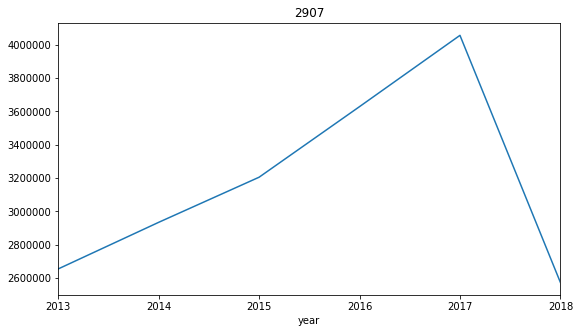

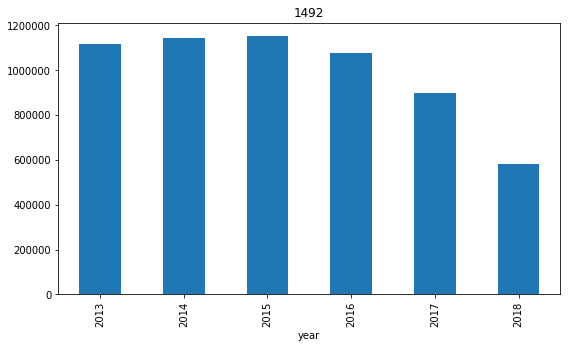

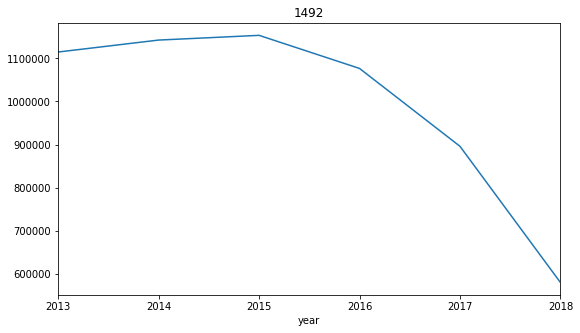

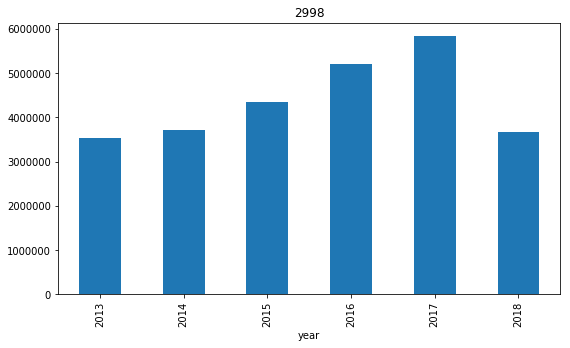

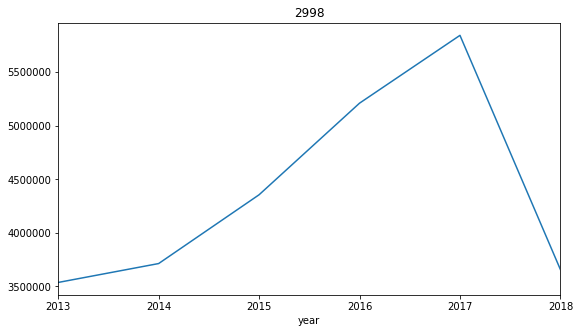

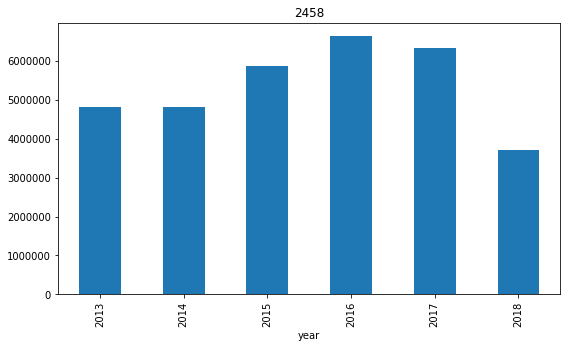

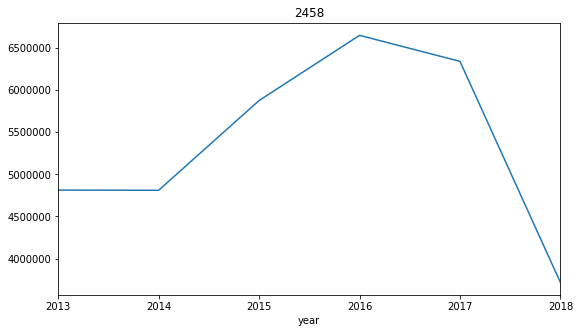

In [0]:
#Graphical representation of sales of ecah shopes over the years
for i in data['location_num'].unique():
    test = data[data['location_num'] == i]
    temp = test.groupby(['year']).sales.sum()
    temp.plot(kind = 'bar',figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()
    temp.plot(figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()
    

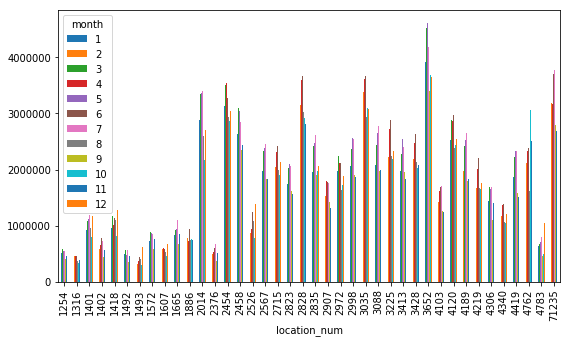

In [0]:
##Graphical representation of sales of each shopes over the months for different years
temp = data.pivot_table(values = 'sales', columns= 'month', index='location_num', aggfunc= 'sum')
temp.plot(kind = 'bar',figsize=(9,5), sharey = True)

In [0]:
df1 = pd.DataFrame({'Best_shop':temp.idxmax()},index = temp.idxmax().index)
df2 = pd.DataFrame({'Total_Sales':temp.max()},index = temp.max().index)
pd.merge(df1, df2, how ='inner', on =df1.index)

key_0  Best_shop  Total_Sales
0       1       3652   3918320.14
1       2       3652   3998578.27
2       3       3652   4525531.48
3       4       3652   4434840.75
4       5       3652   4603220.88
5       6       3652   4258986.65
6       7       3652   4173166.59
7       8       3652   3426585.66
8       9       3652   3405232.08
9      10       3652   3678269.08
10     11       3652   3475362.00
11     12       3652   3650733.20

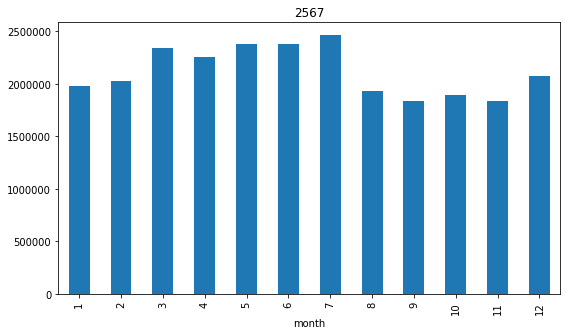

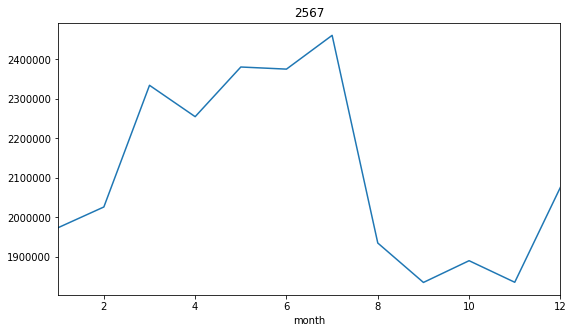

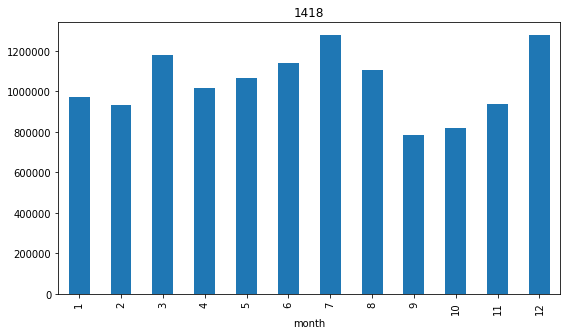

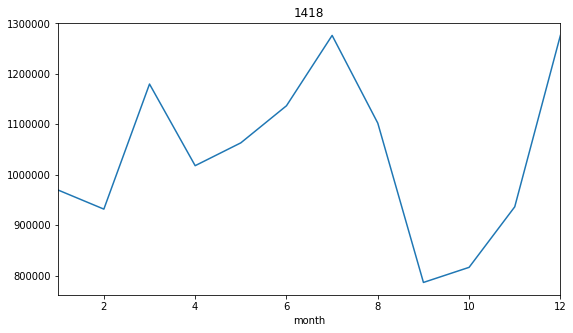

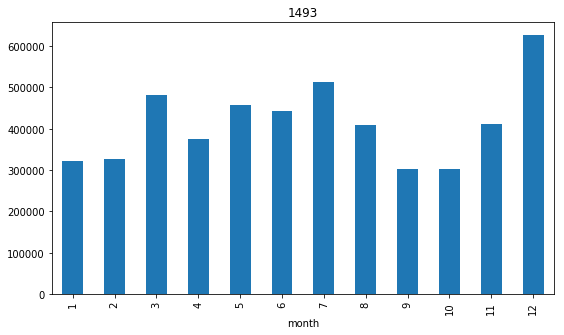

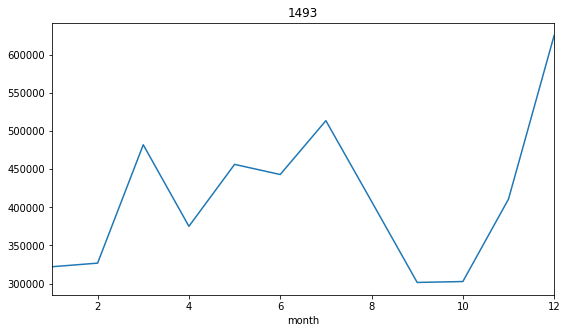

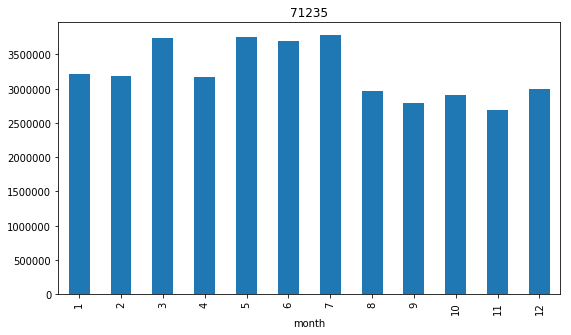

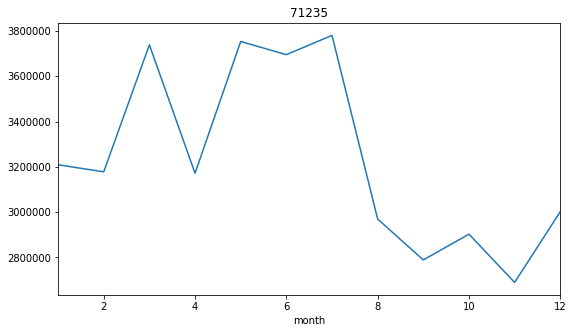

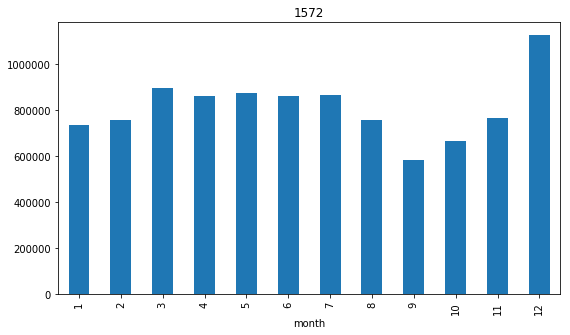

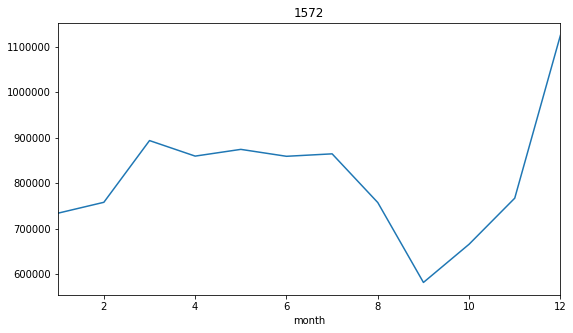

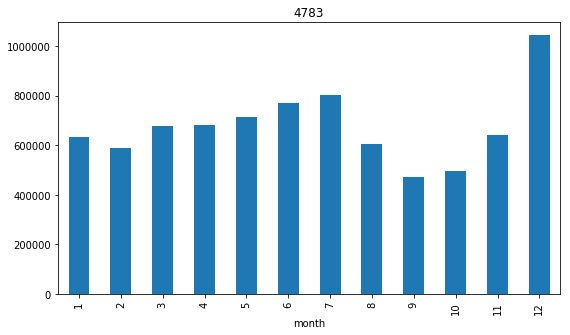

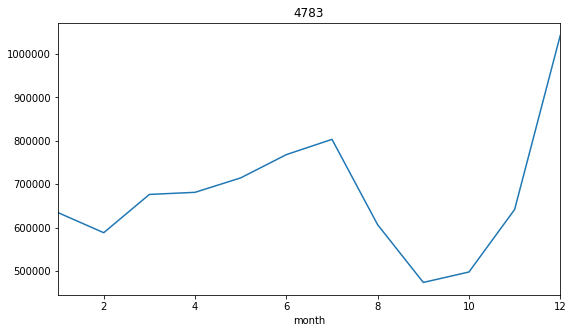

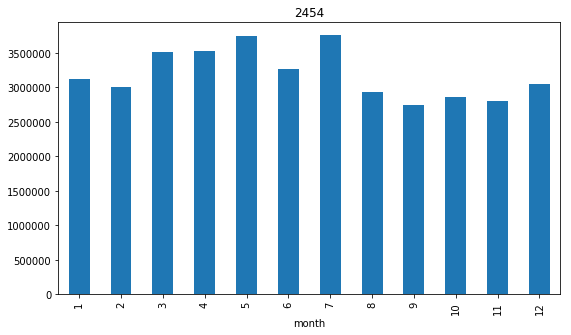

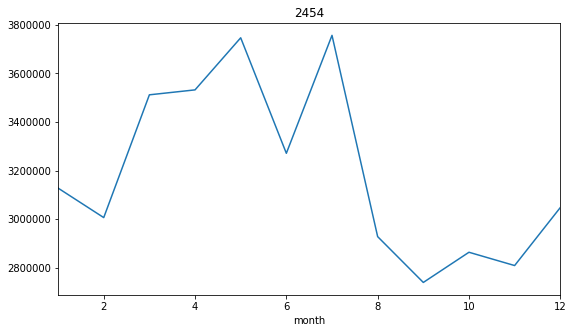

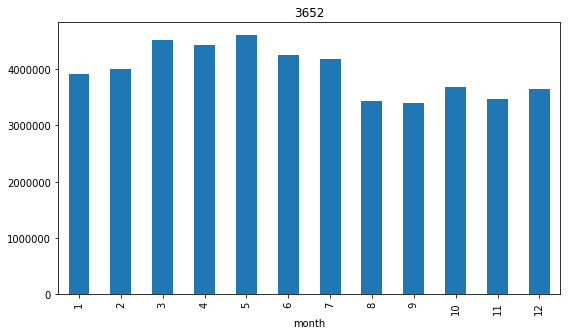

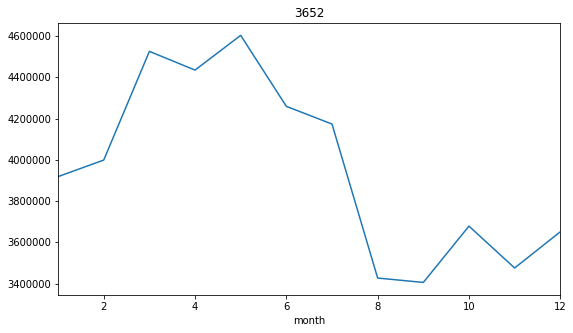

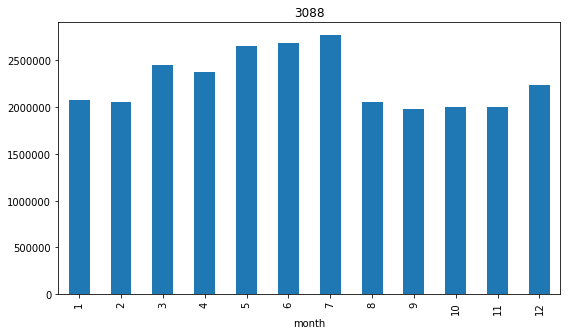

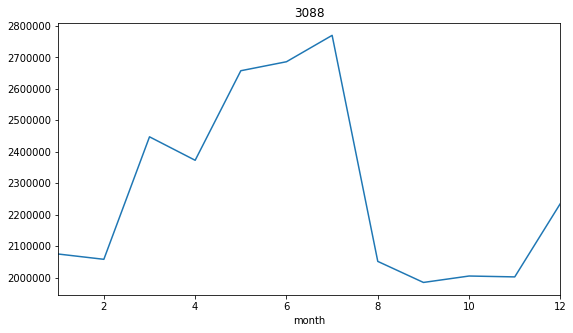

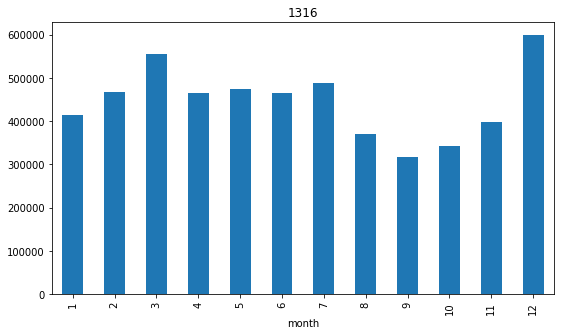

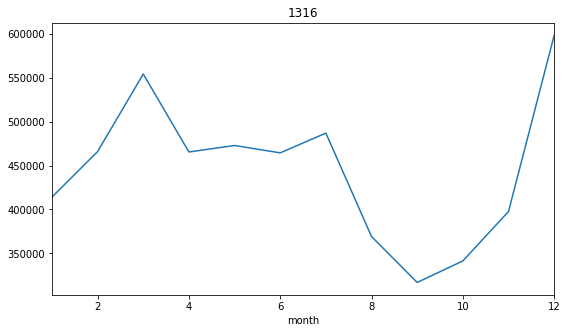

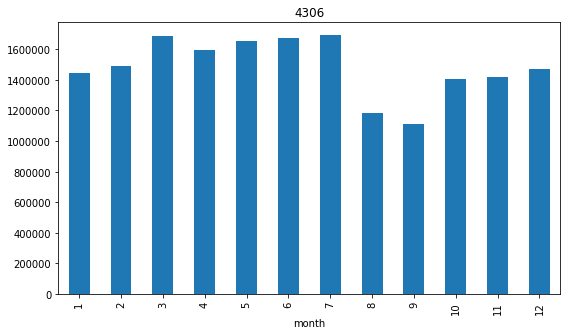

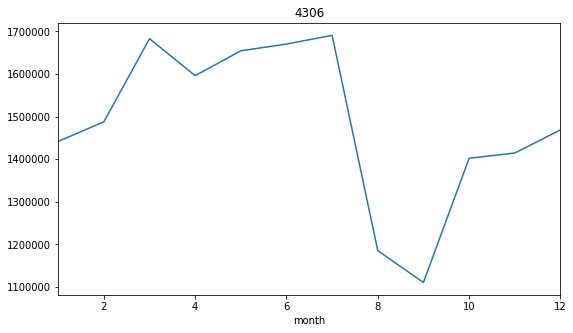

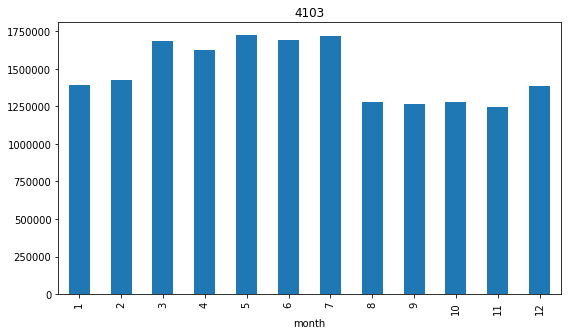

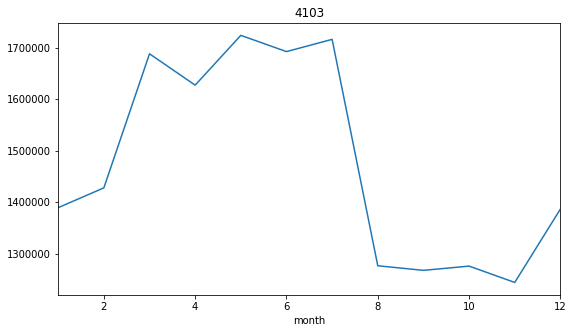

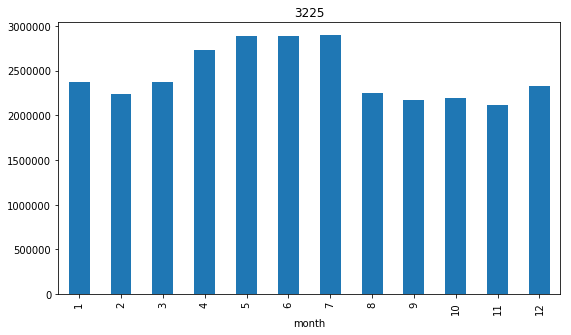

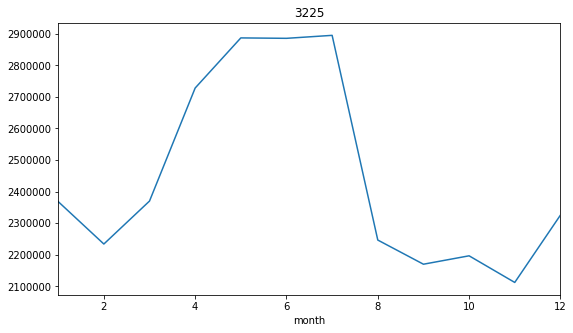

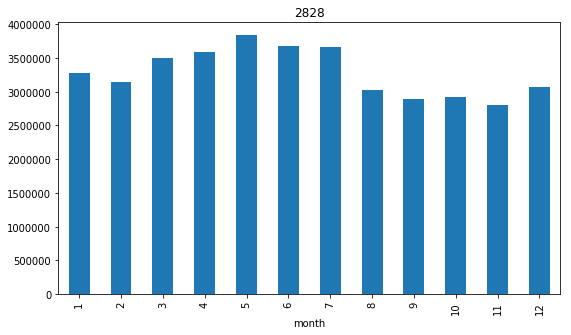

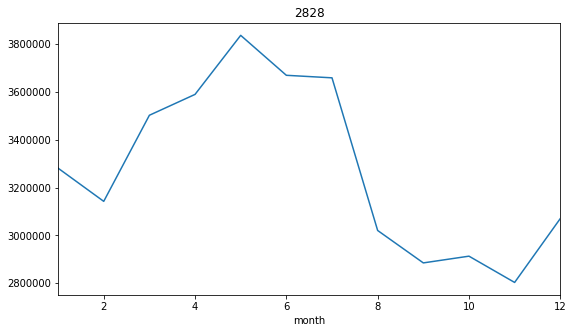

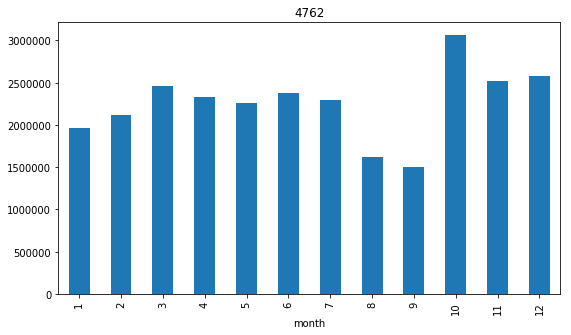

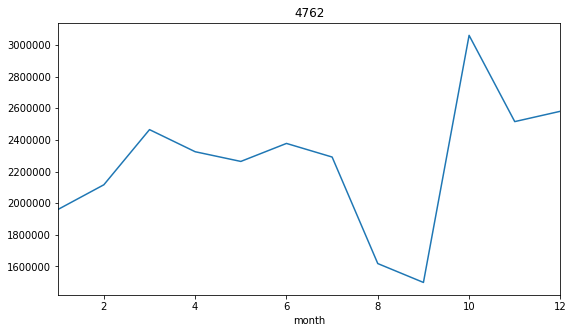

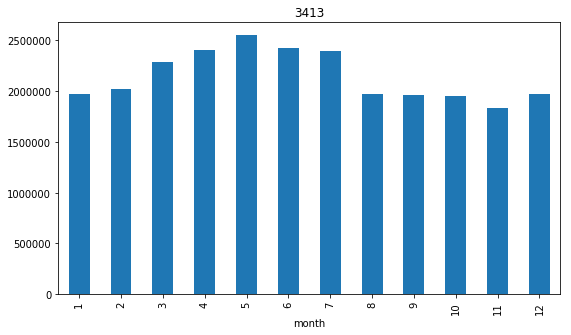

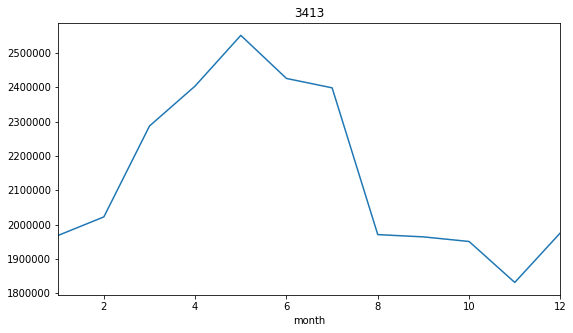

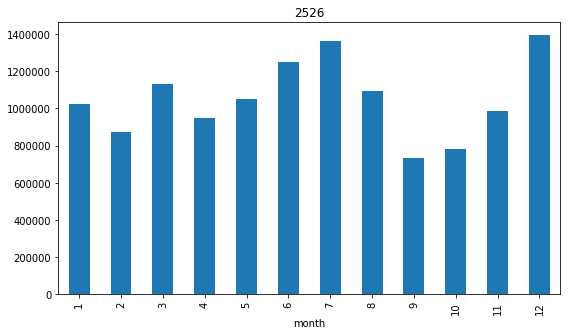

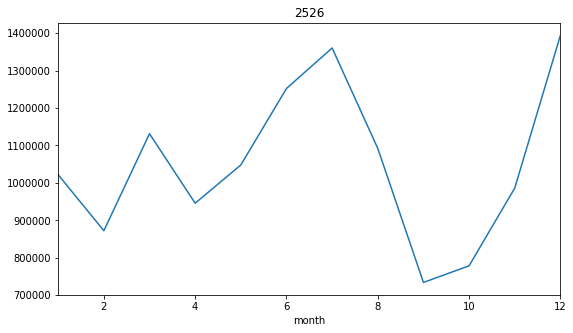

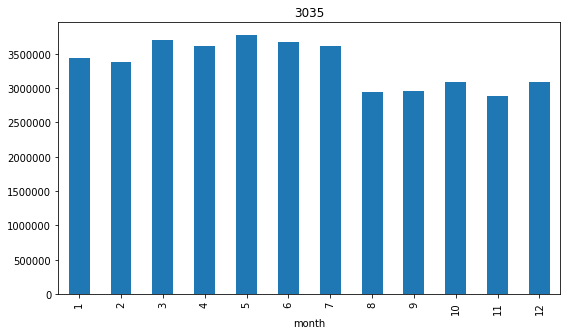

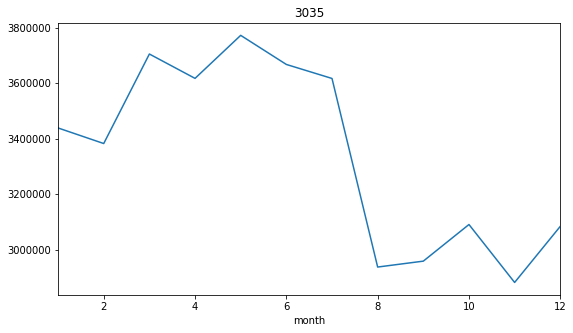

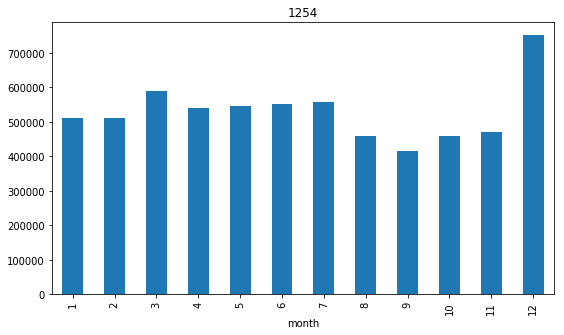

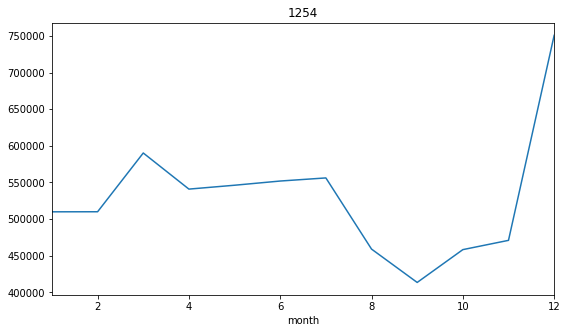

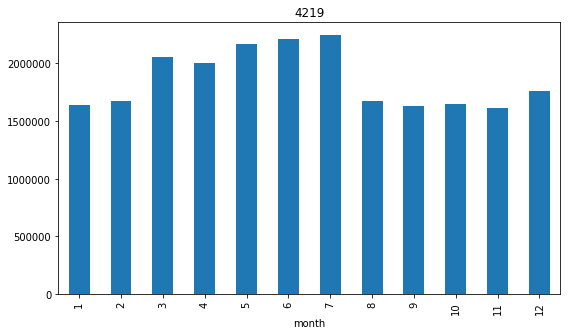

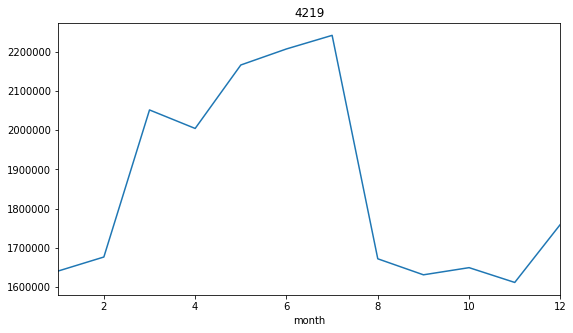

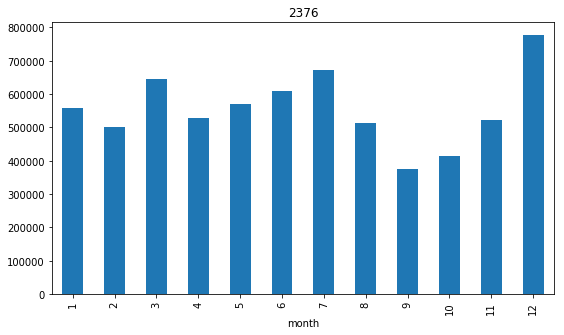

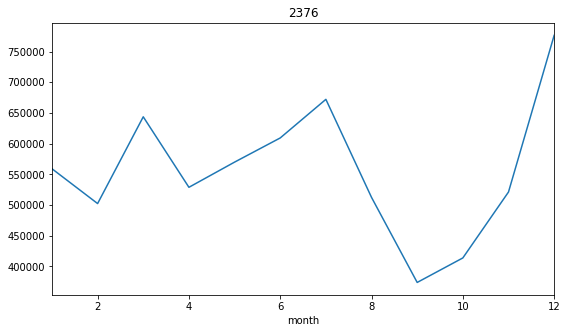

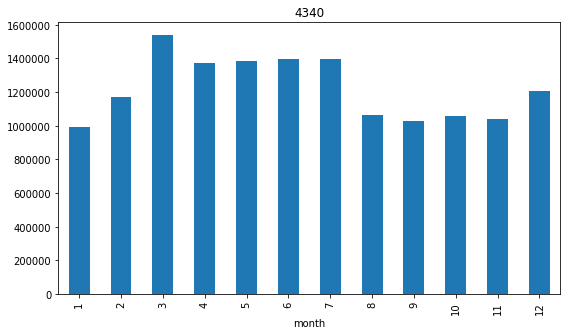

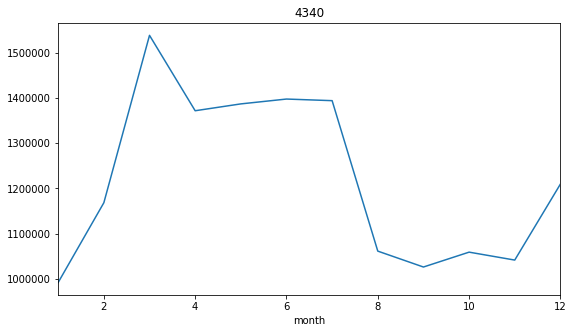

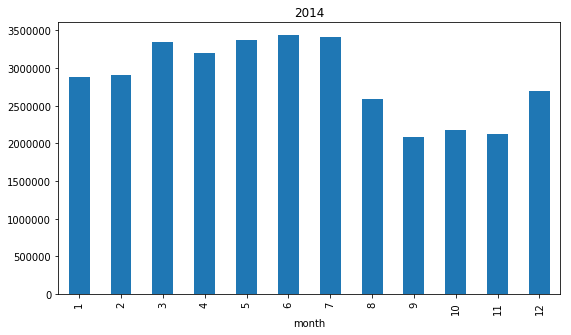

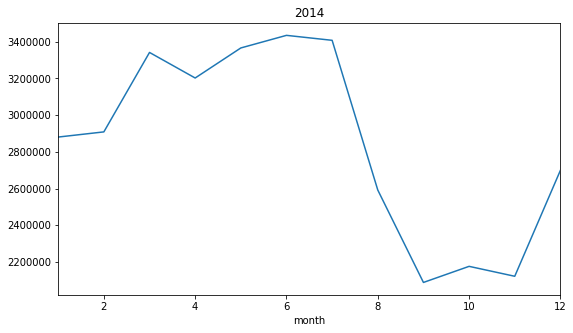

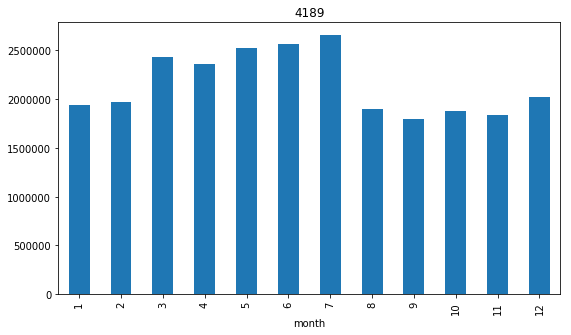

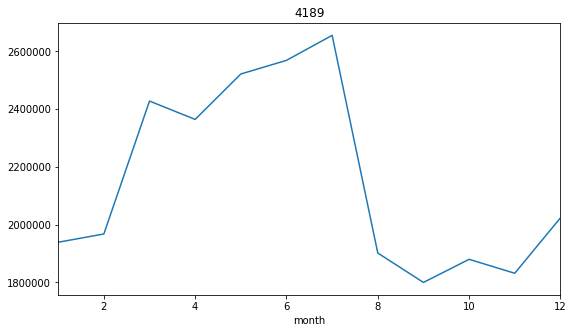

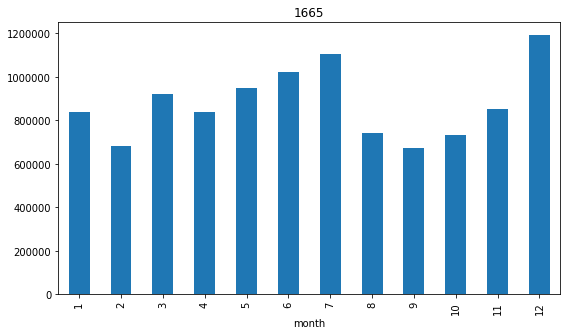

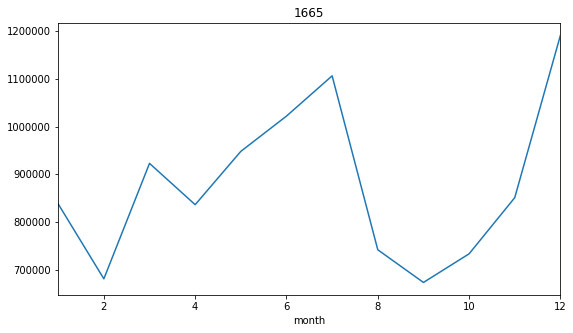

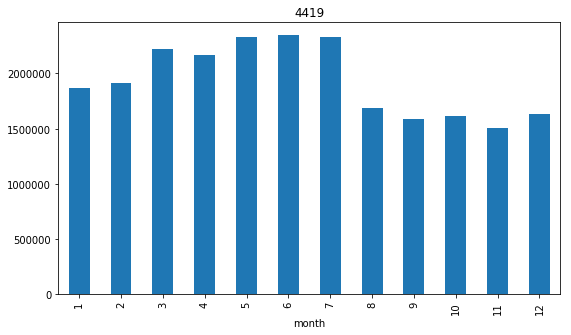

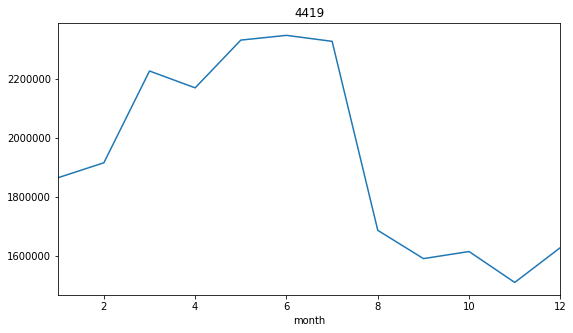

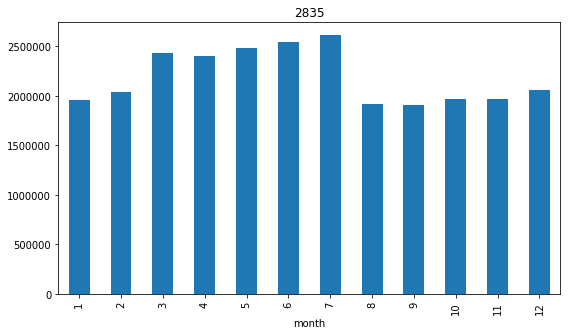

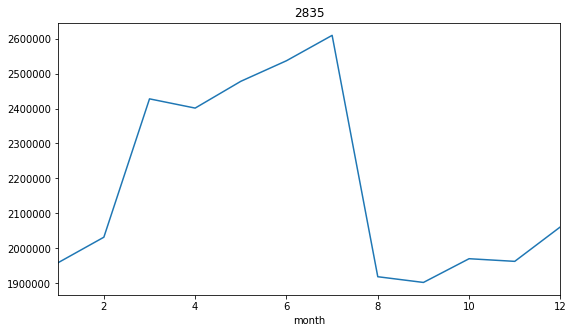

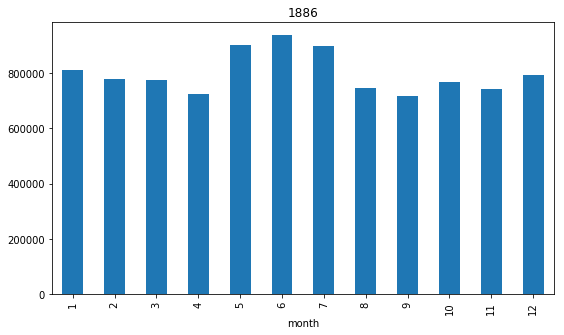

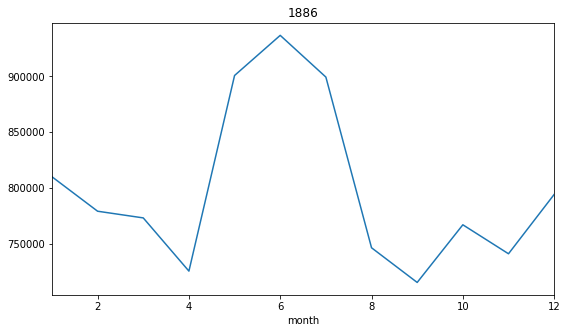

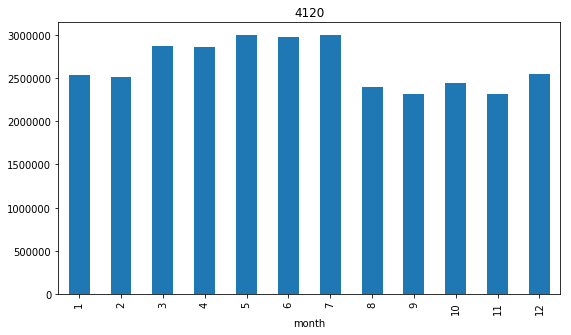

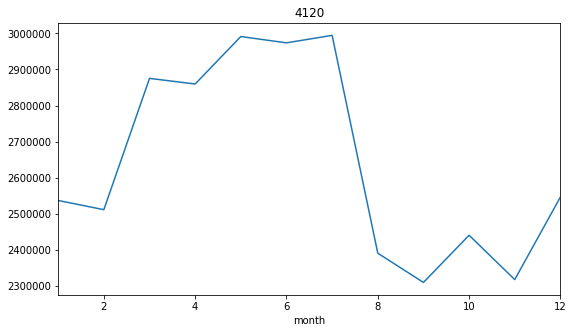

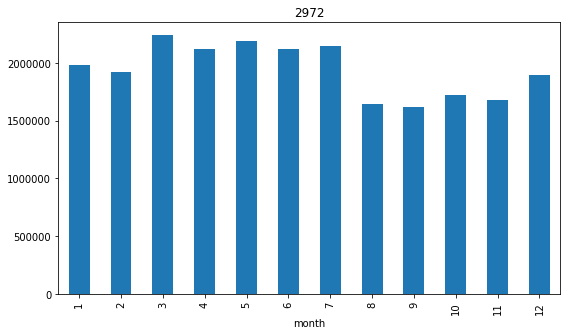

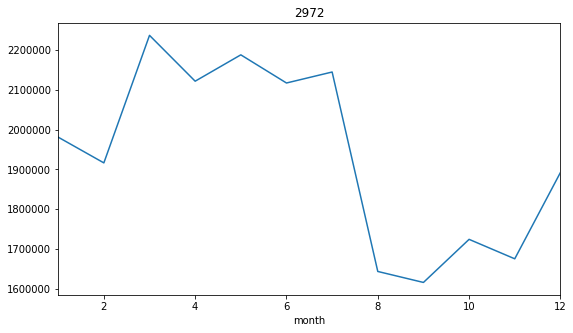

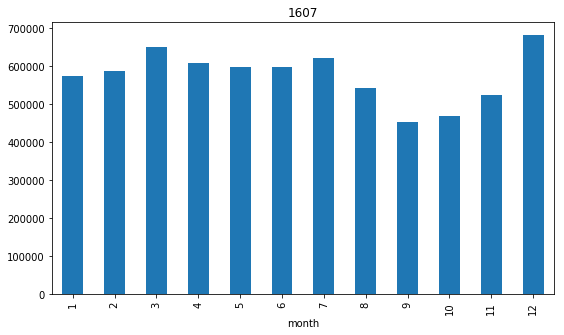

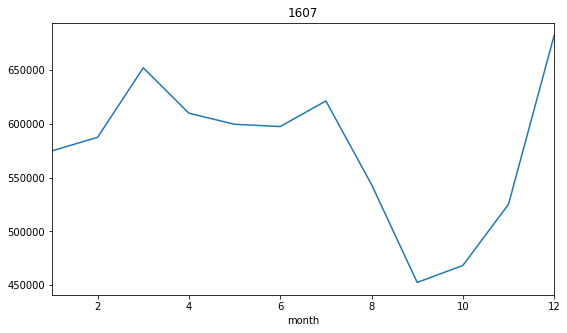

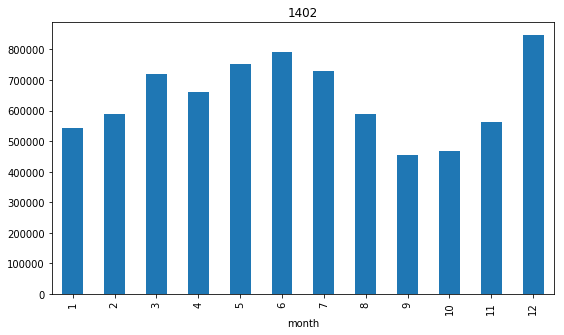

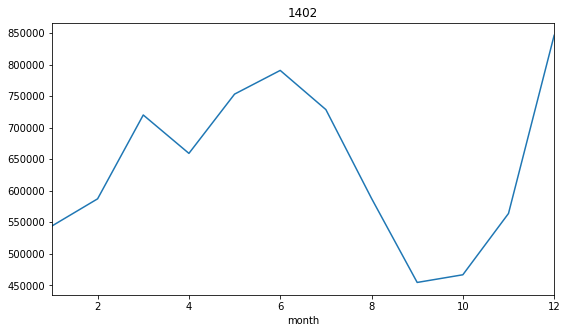

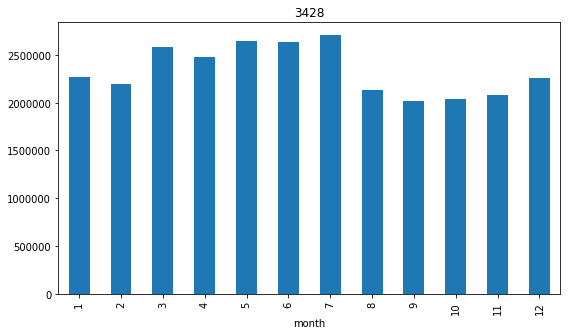

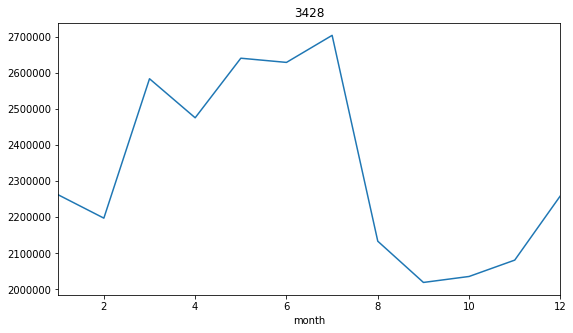

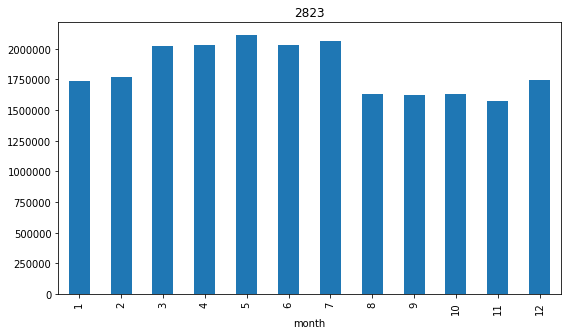

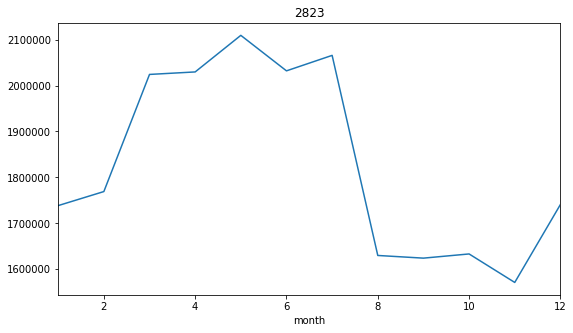

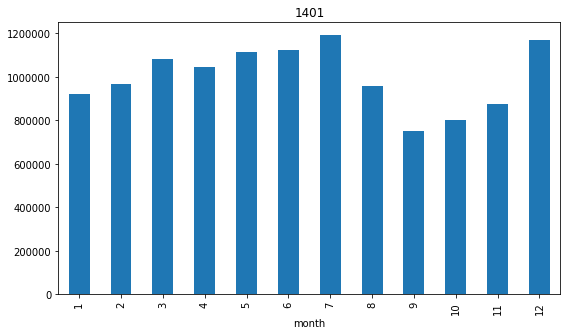

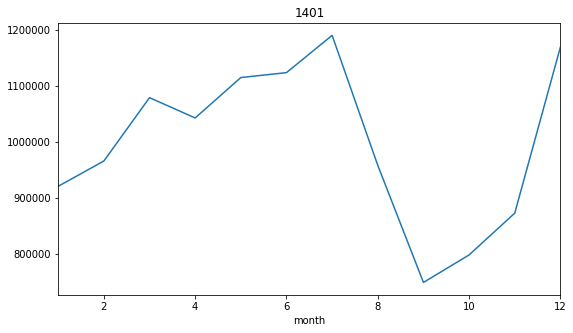

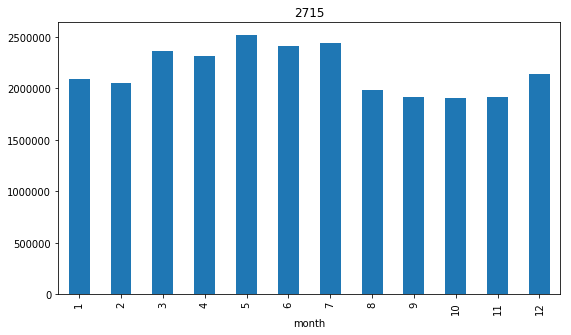

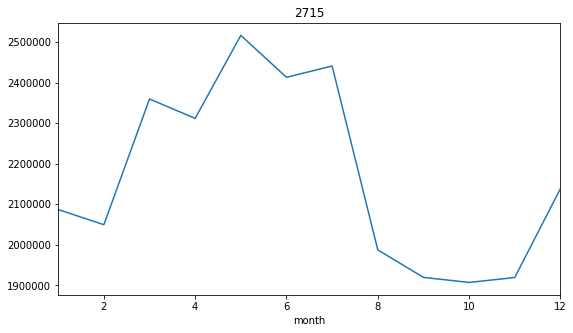

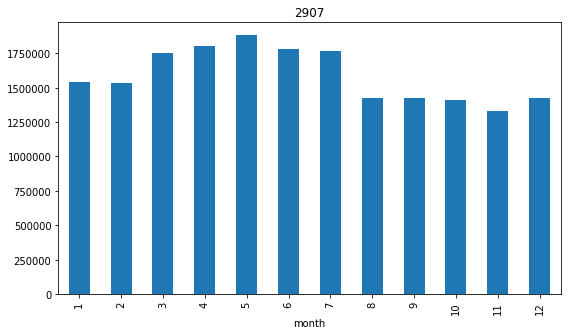

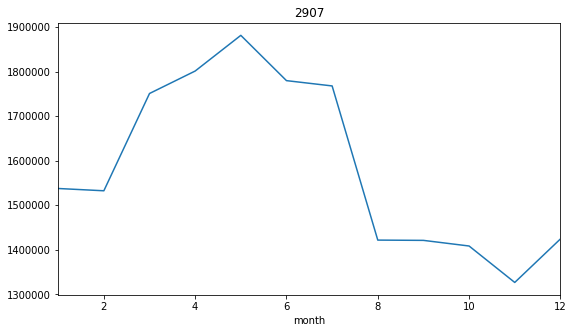

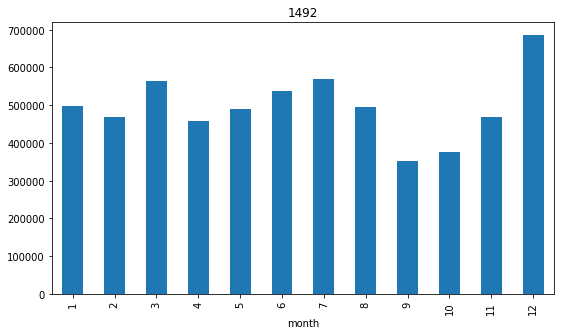

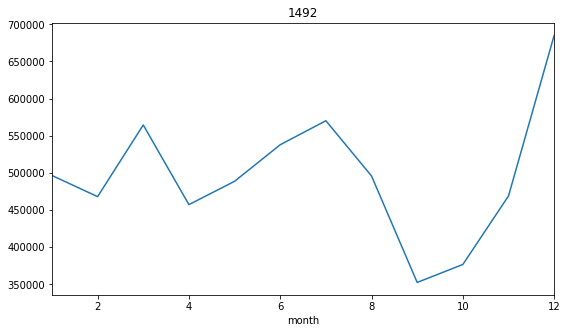

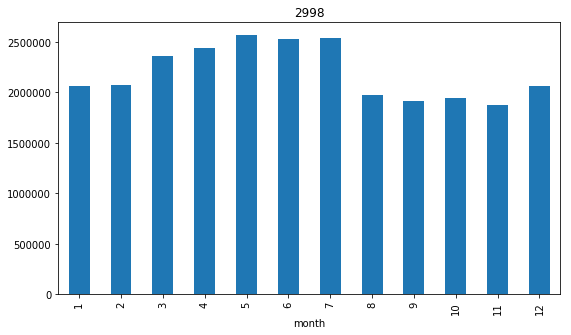

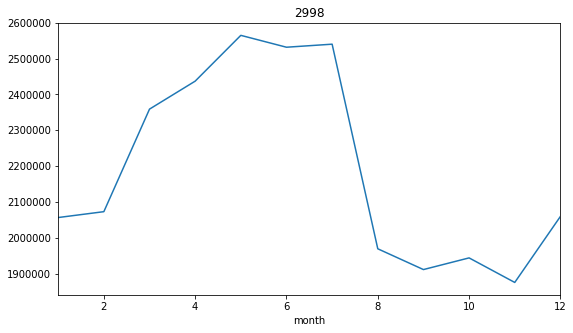

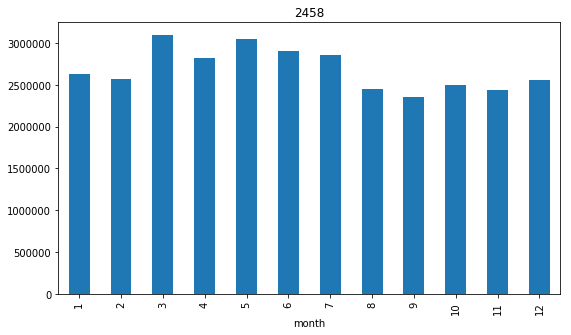

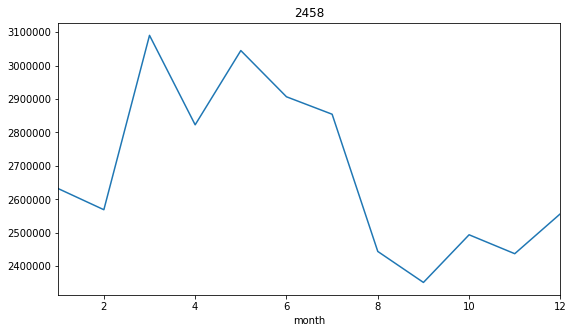

In [0]:
#Sales of each shopes over the months
for i in data['location_num'].unique():
    test = data[data['location_num'] == i]
    temp = test.groupby(['month']).sales.sum()
    temp.plot(kind = 'bar',figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()
    temp.plot(figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()

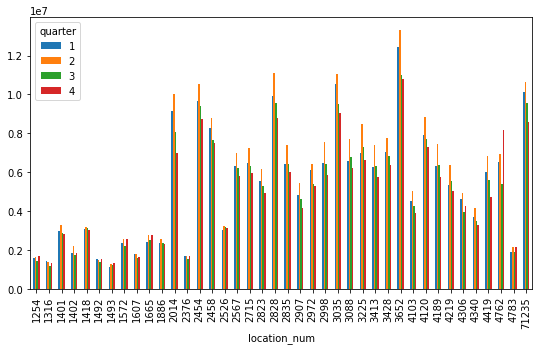

In [0]:
#Sales of each shopes in a quarterly basis
temp = data.pivot_table(values = 'sales', columns= 'quarter', index='location_num', aggfunc= 'sum')
temp.plot(kind = 'bar',figsize=(9,5), sharey = True)

In [0]:
df1 = pd.DataFrame({'Best_shop':temp.idxmax()},index = temp.idxmax().index)
df2 = pd.DataFrame({'Total_Sales':temp.max()},index = temp.max().index)
pd.merge(df1, df2, how ='inner', on =df1.index)

key_0  Best_shop  Total_Sales
0      1       3652  12442429.89
1      2       3652  13297048.28
2      3       3652  11004984.33
3      4       3652  10804364.28

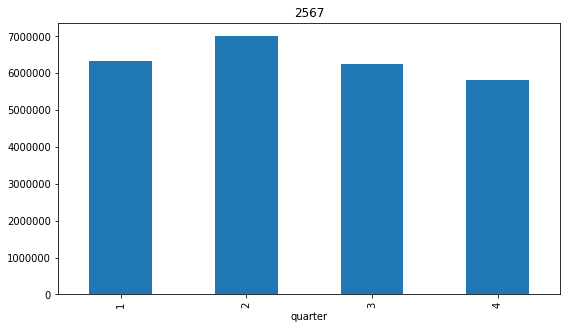

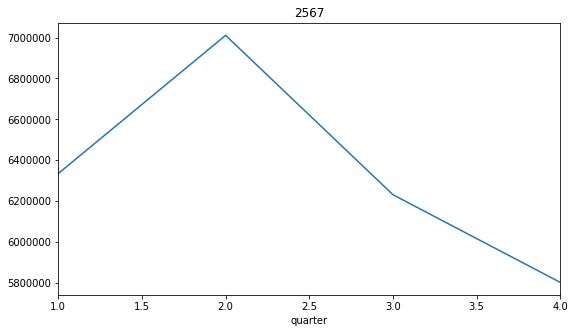

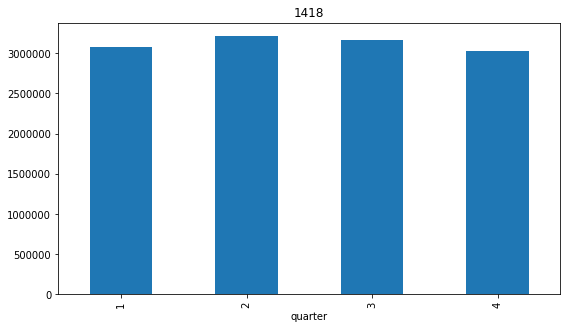

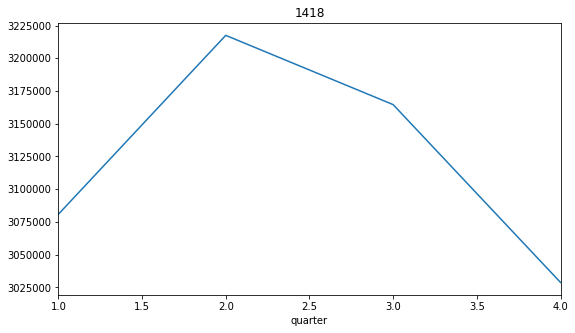

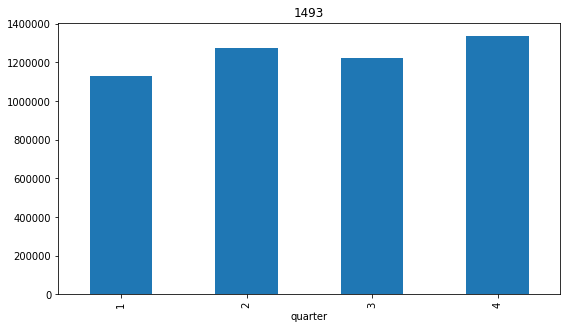

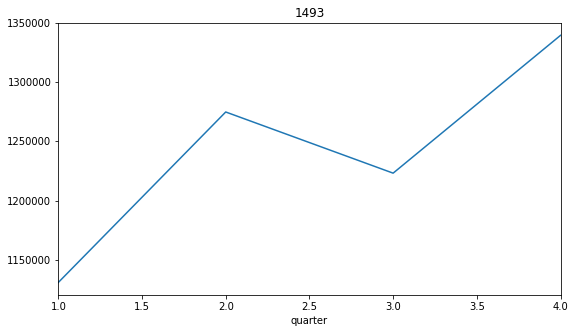

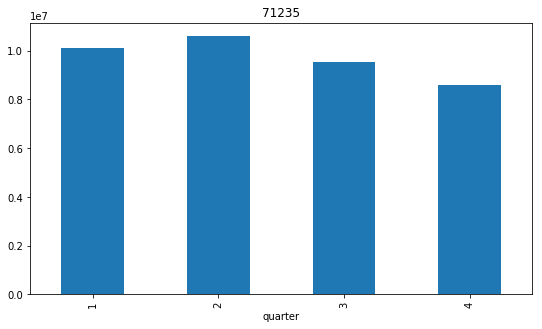

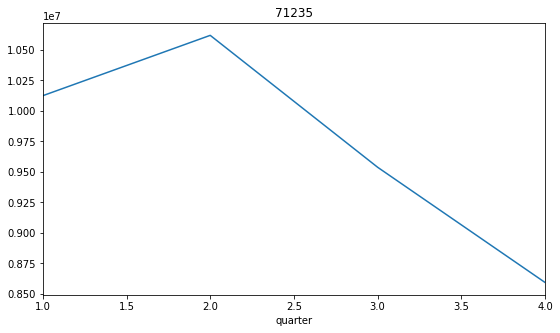

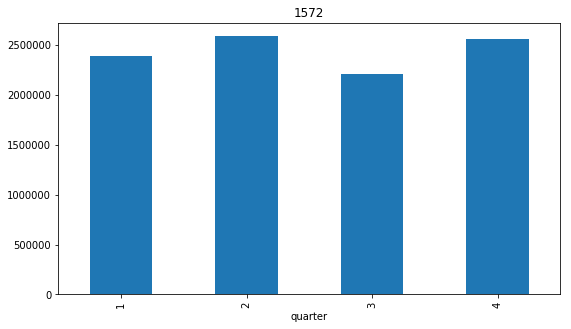

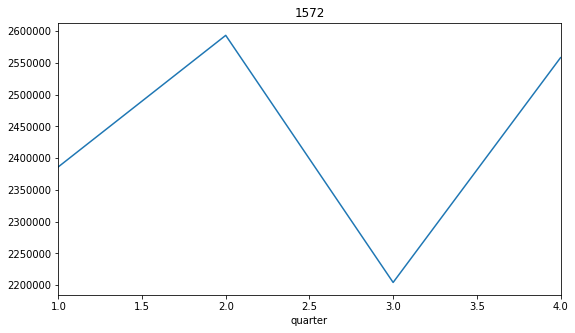

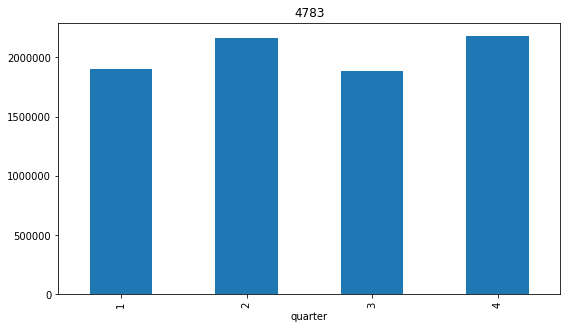

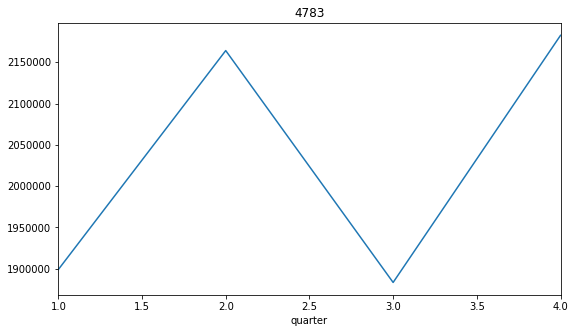

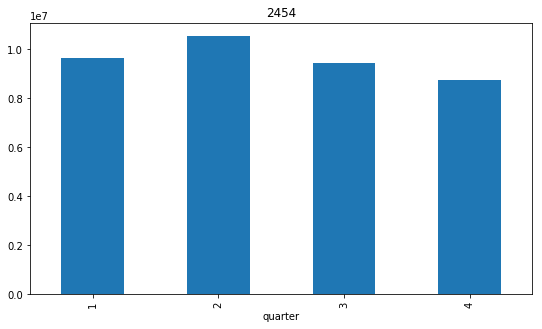

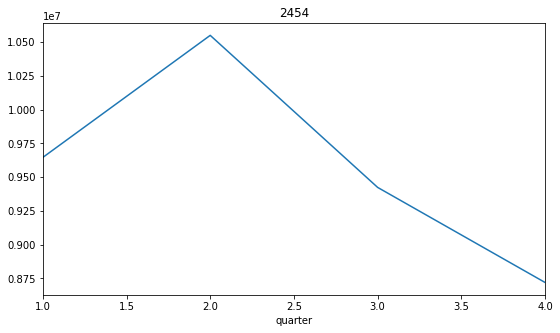

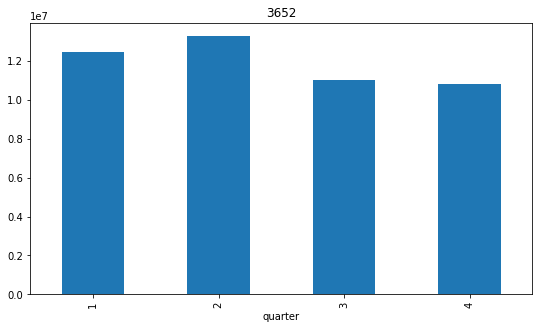

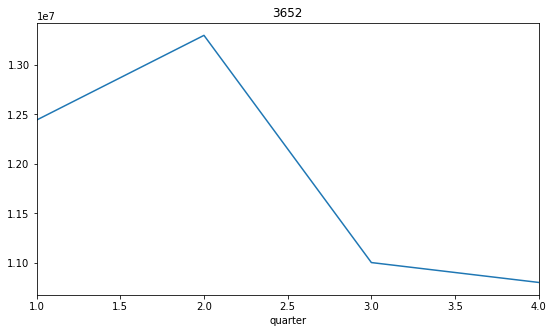

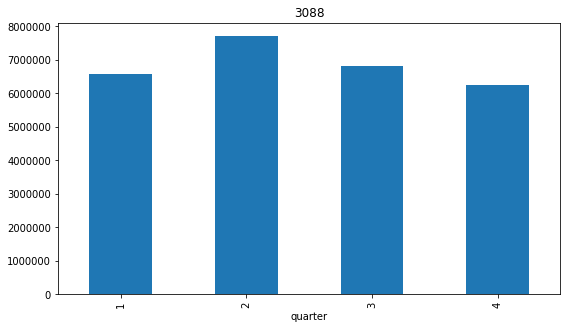

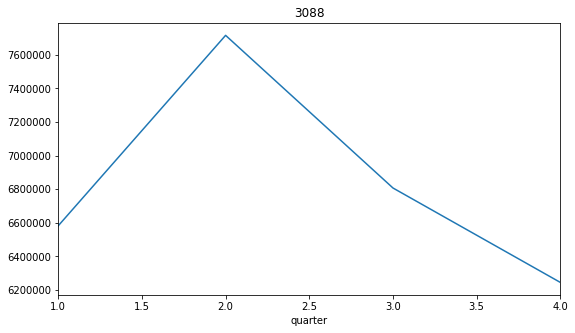

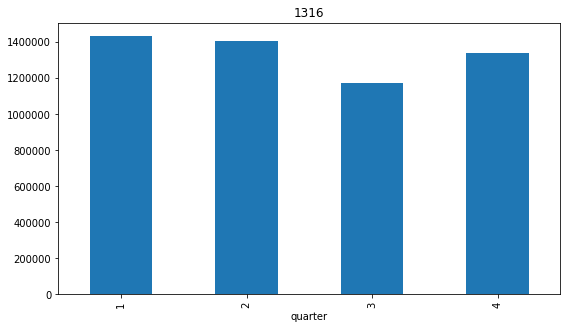

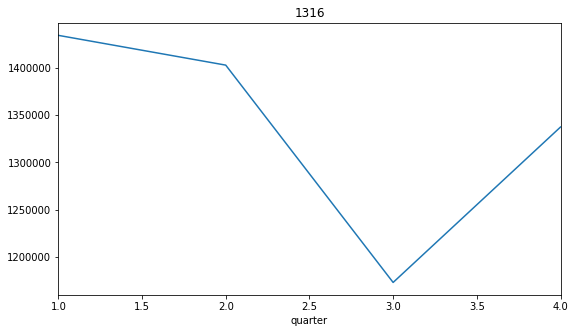

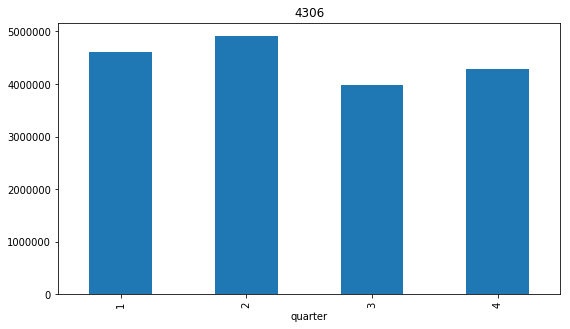

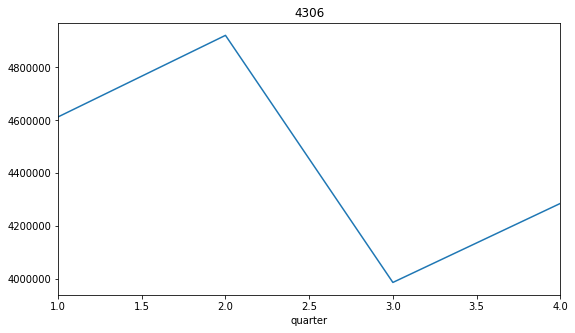

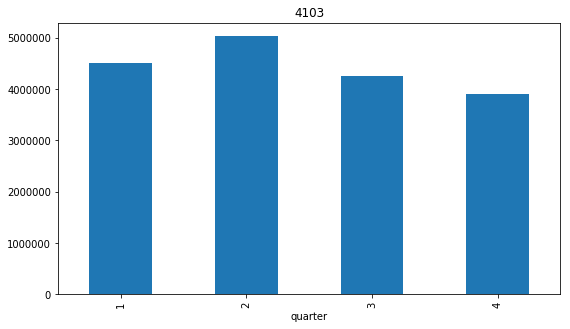

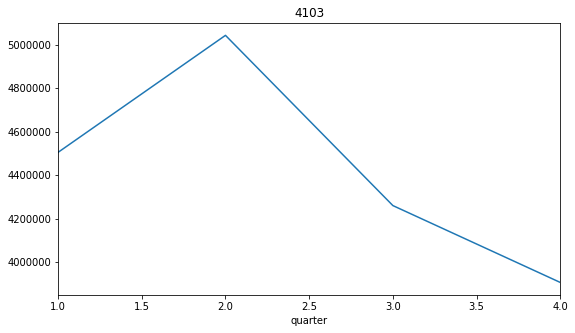

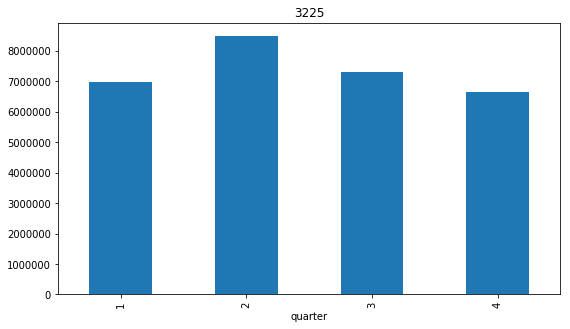

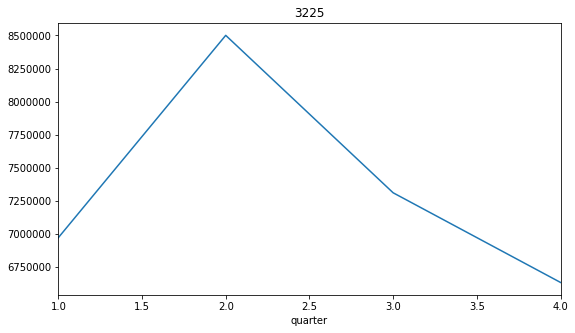

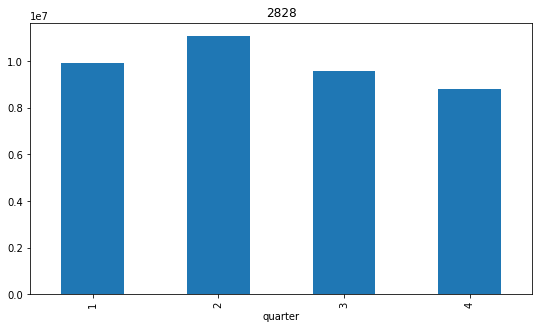

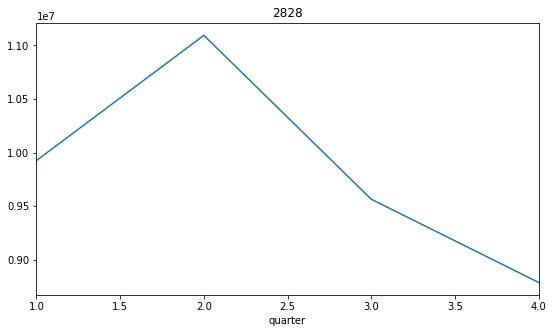

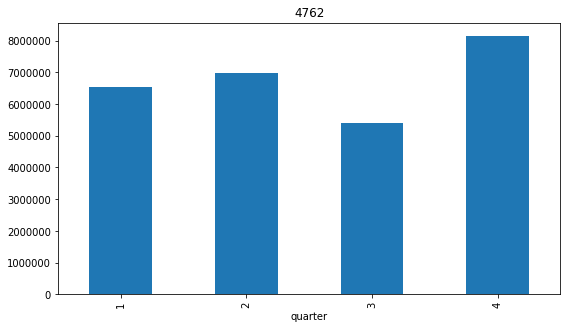

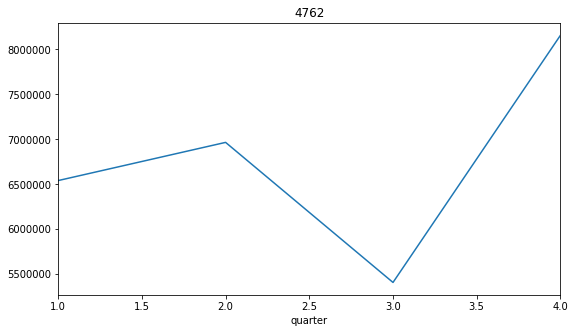

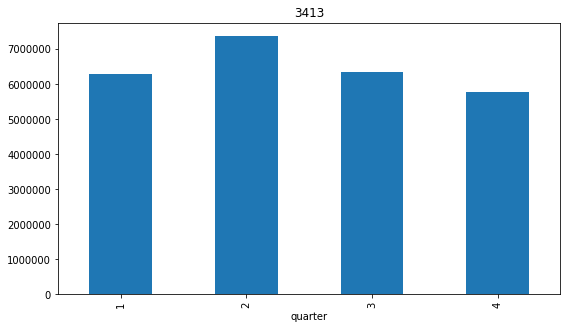

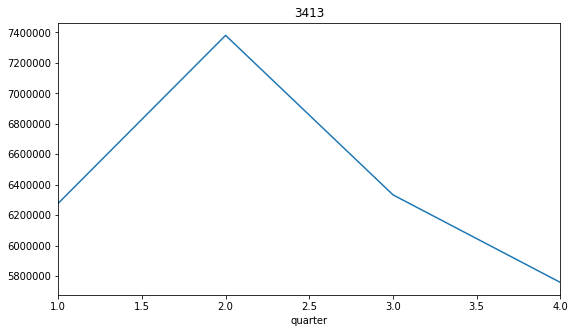

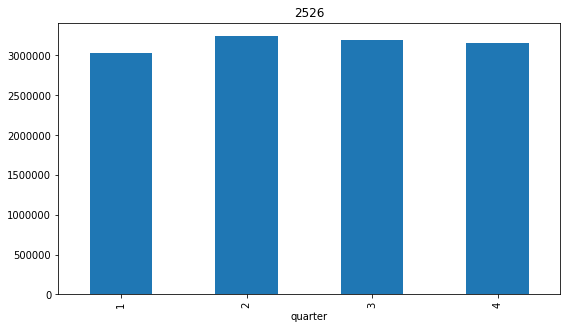

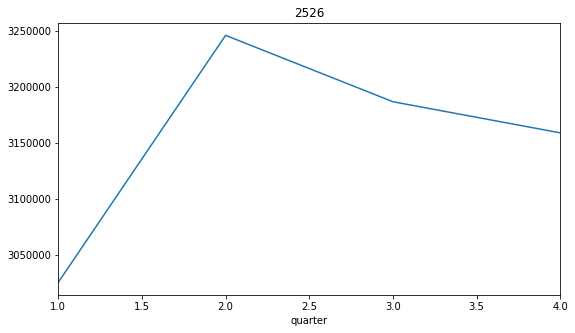

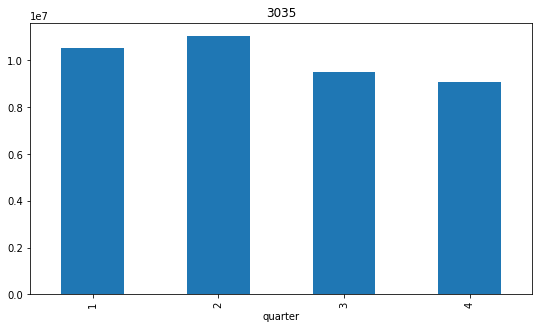

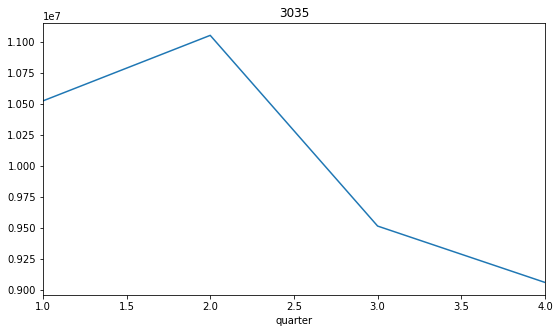

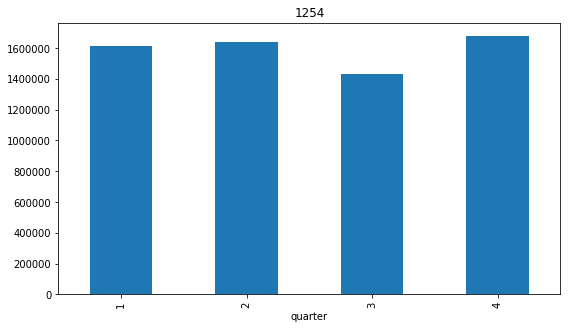

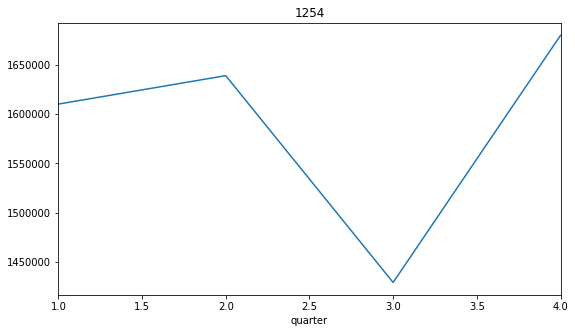

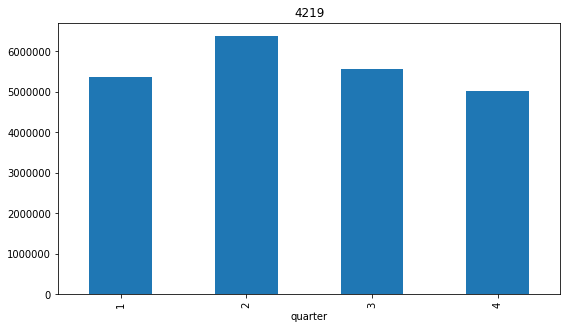

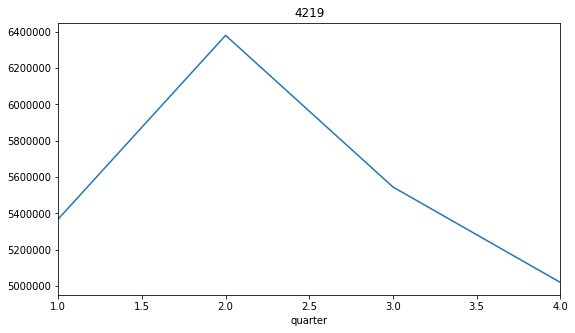

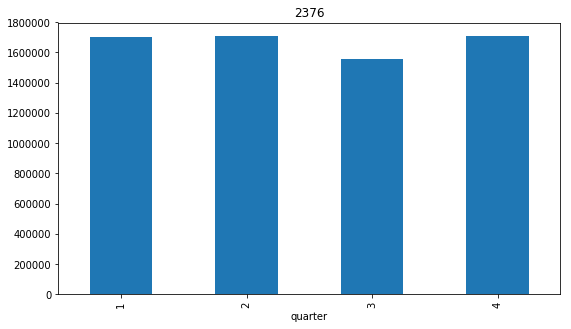

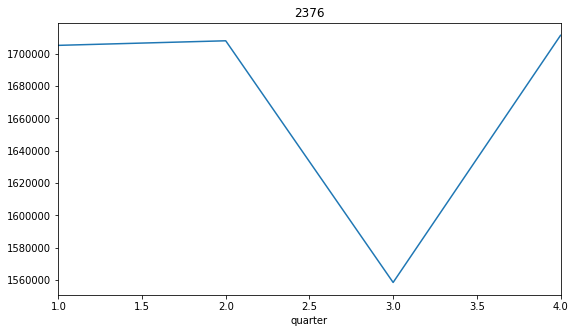

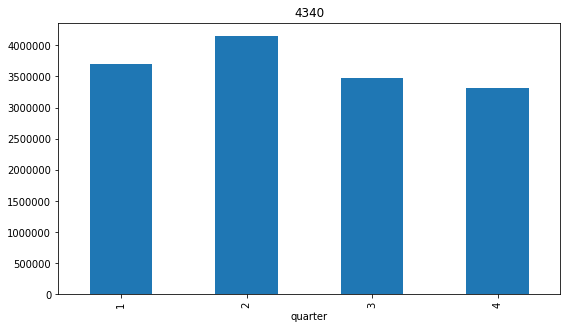

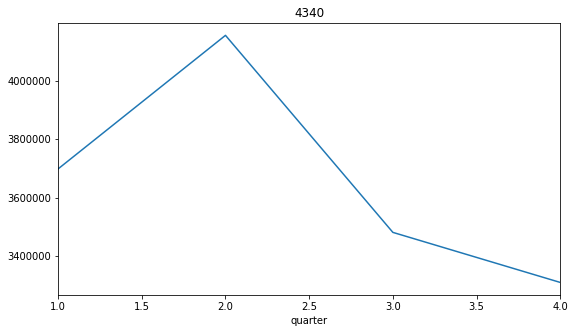

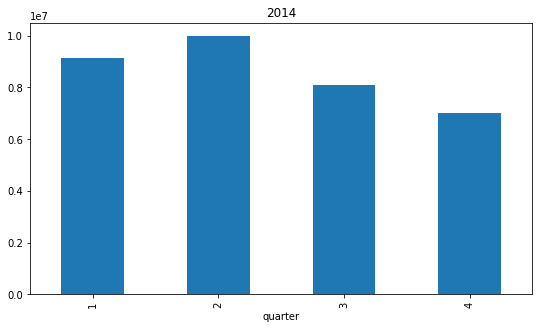

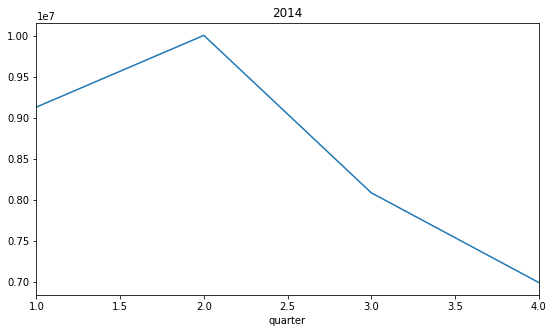

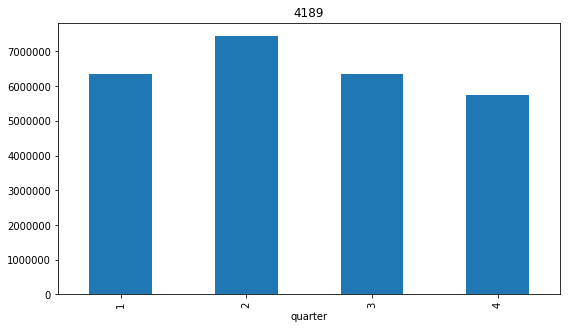

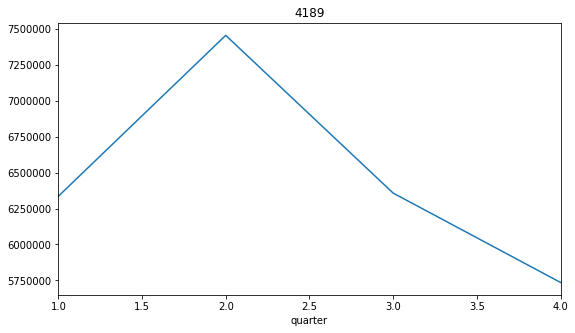

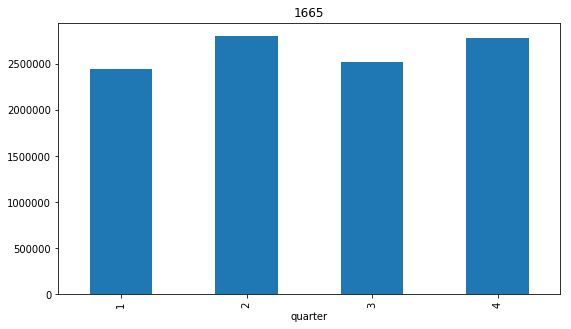

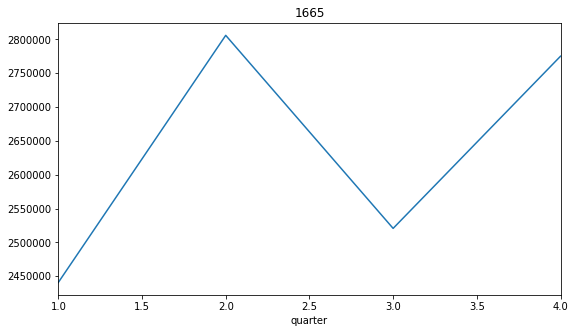

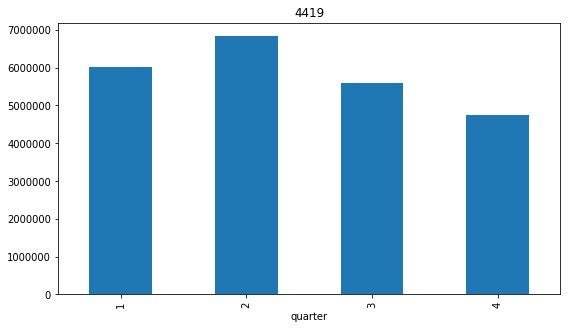

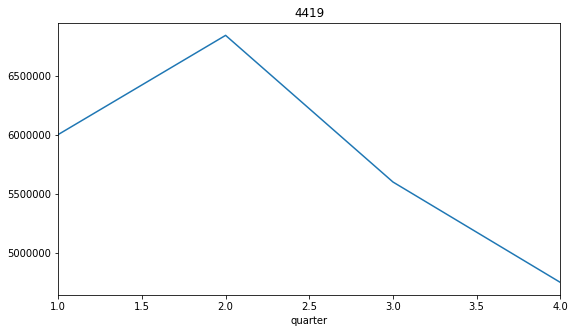

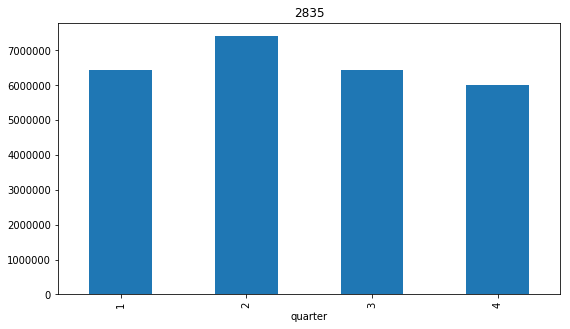

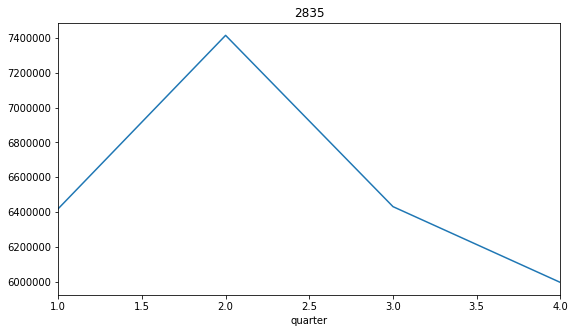

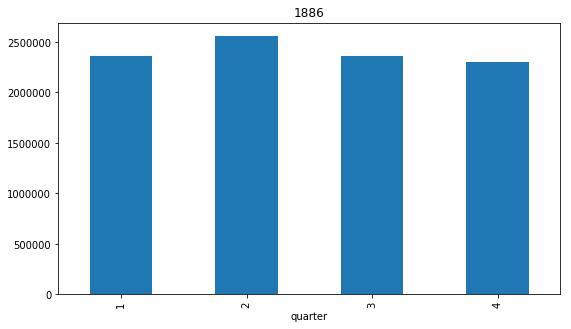

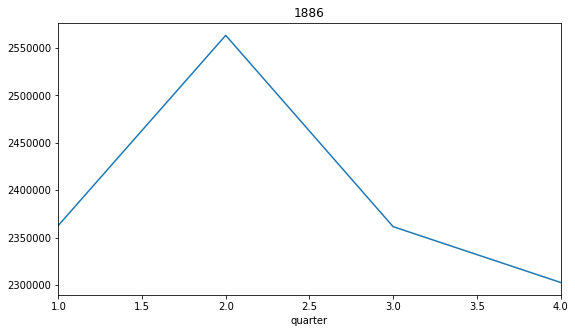

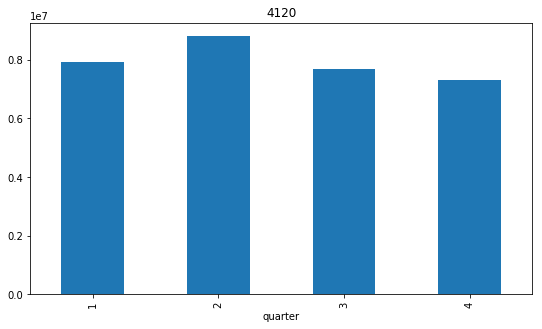

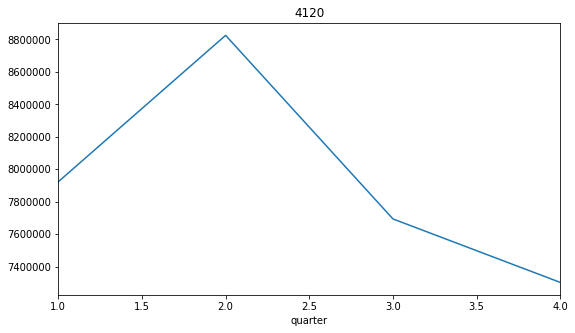

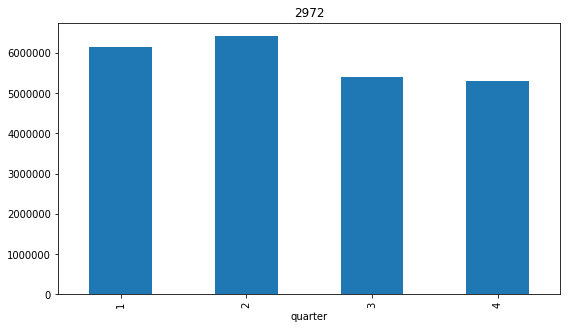

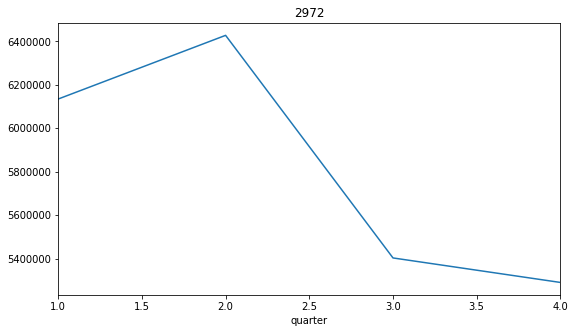

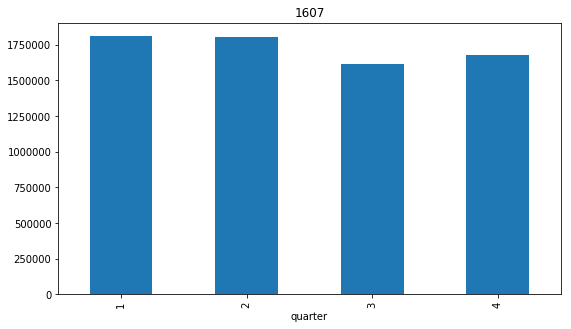

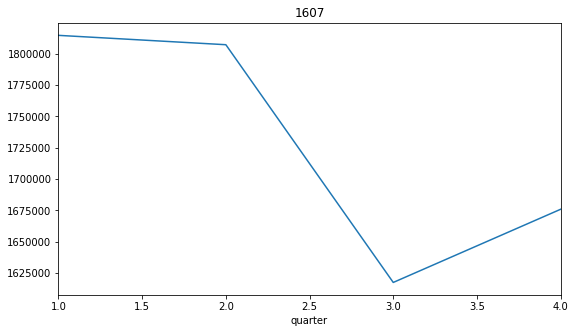

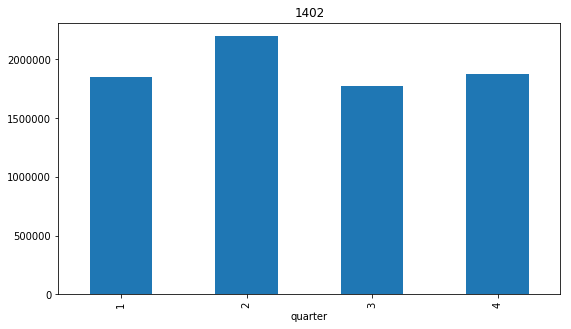

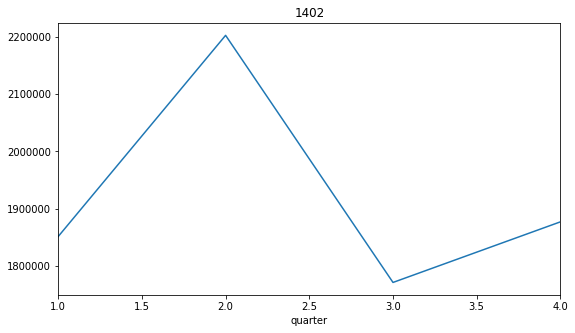

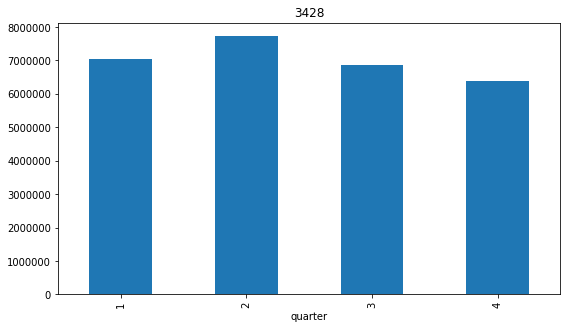

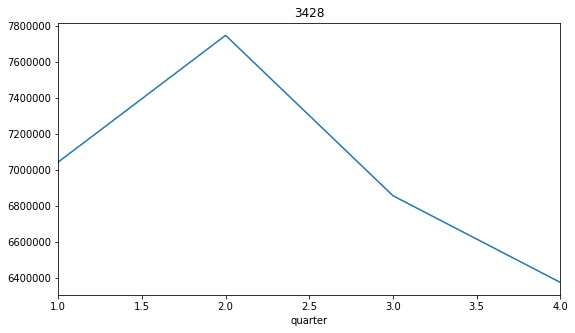

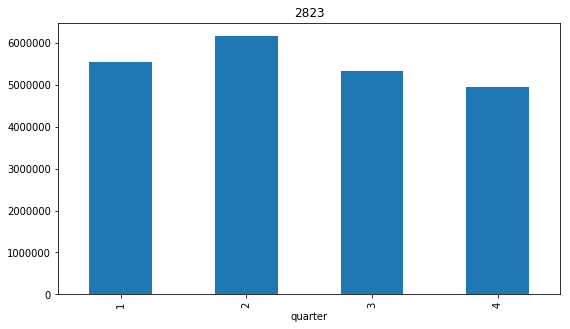

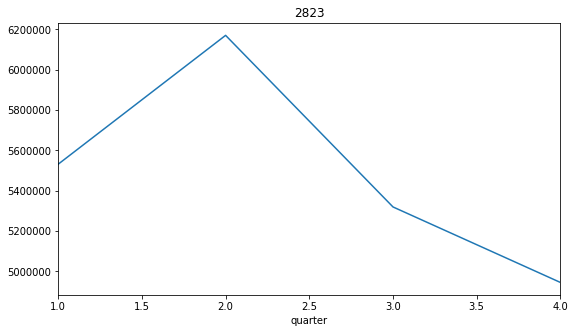

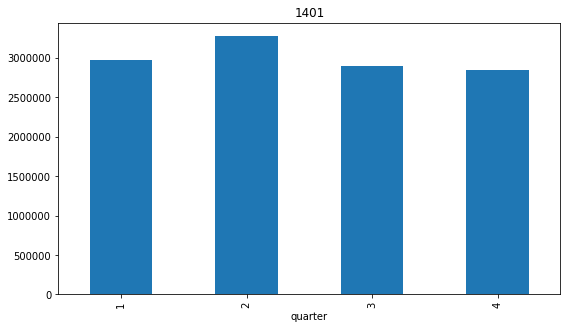

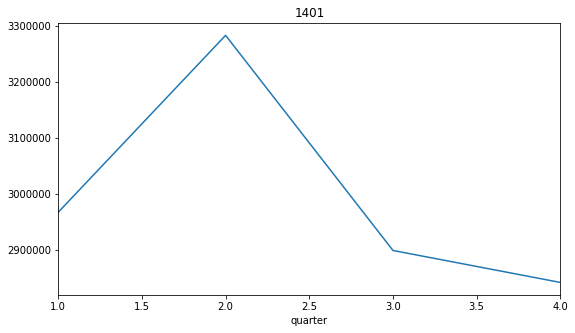

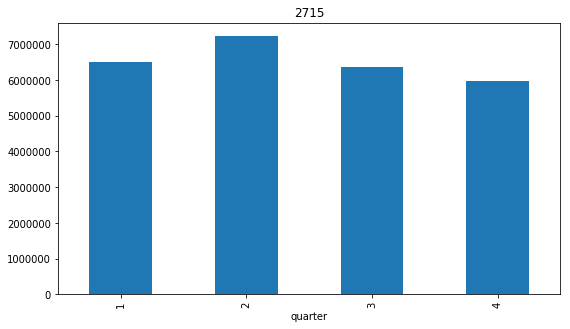

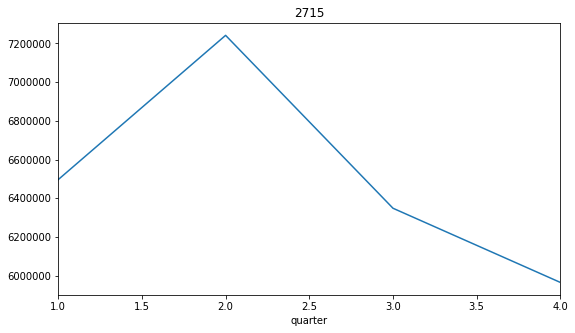

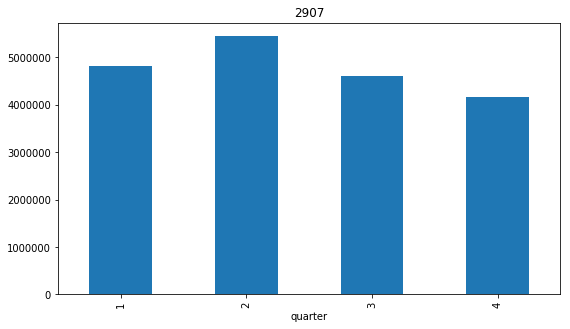

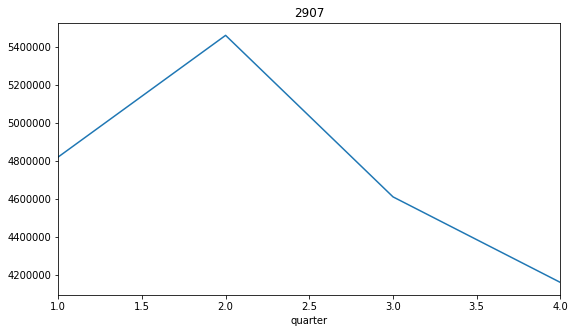

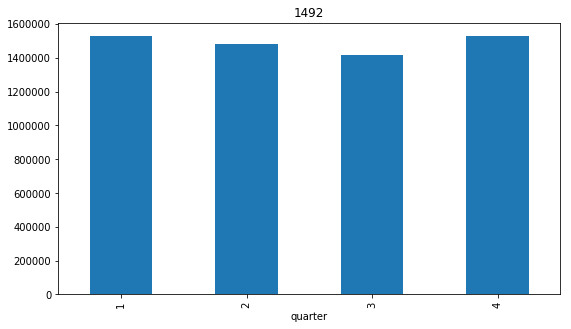

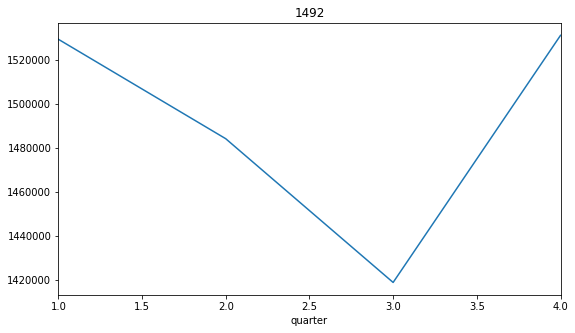

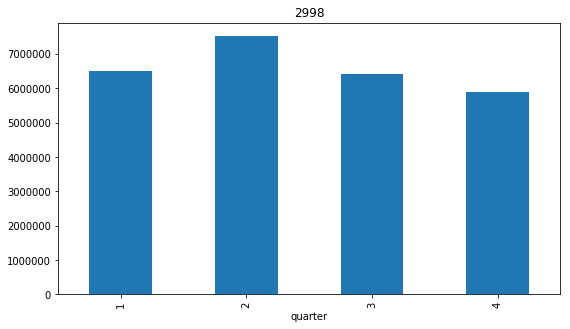

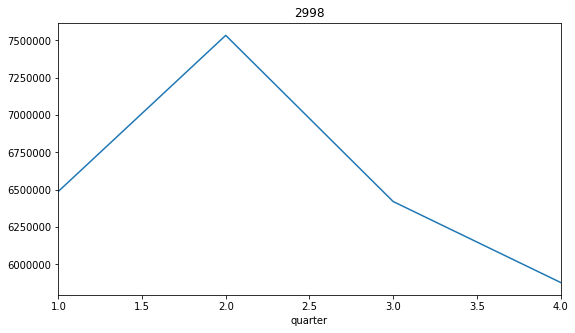

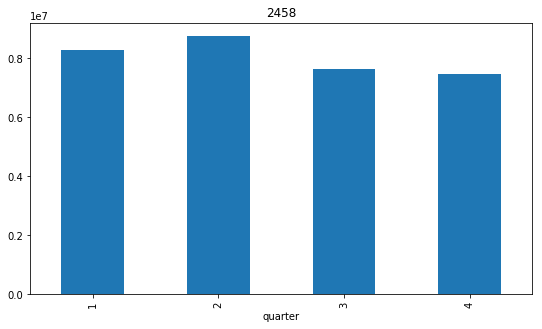

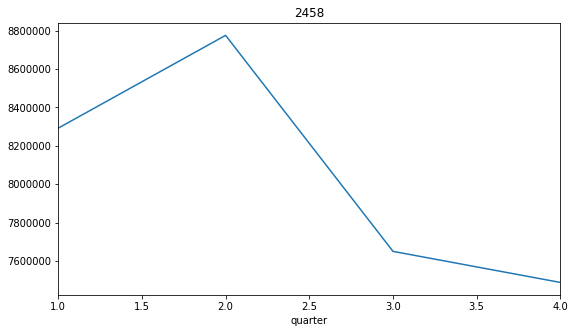

In [0]:
#Sales of each shopes in a quarterly basis
for i in data['location_num'].unique():
    test = data[data['location_num'] == i]
    temp = test.groupby(['quarter']).sales.sum()
    temp.plot(kind = 'bar',figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()
    temp.plot(figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()

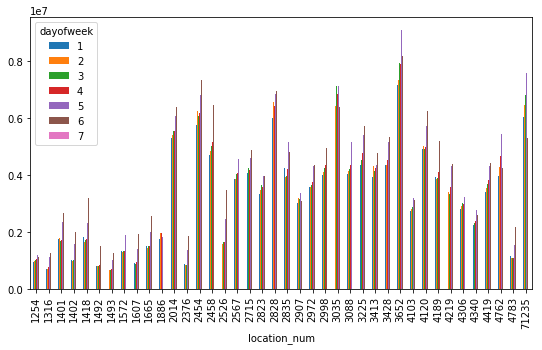

In [0]:
#Sales of each shopes over the week days
temp = data.pivot_table(values = 'sales', columns= 'dayofweek', index='location_num', aggfunc= 'sum')
temp.plot(kind = 'bar',figsize=(9,5), sharey = True)

In [0]:
df1 = pd.DataFrame({'Best_shop':temp.idxmax()},index = temp.idxmax().index)
df2 = pd.DataFrame({'Total_Sales':temp.max()},index = temp.max().index)
pd.merge(df1, df2, how ='inner', on =df1.index)

key_0  Best_shop  Total_Sales
0      1       3652   7150367.42
1      2       3652   7342687.21
2      3       3652   7928942.77
3      4       3652   7879674.55
4      5       3652   9069421.60
5      6       3652   8177733.23
6      7       2458        20.66

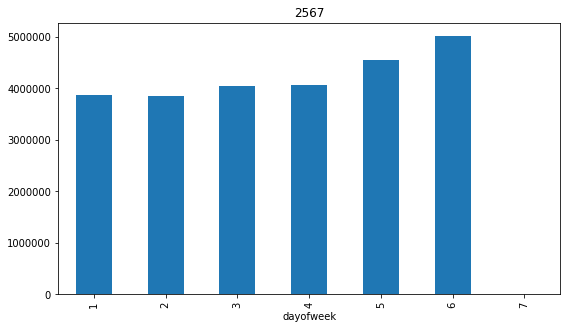

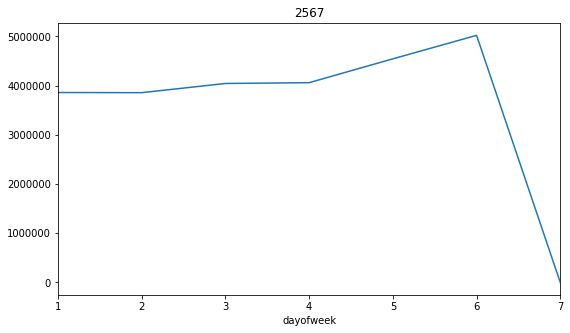

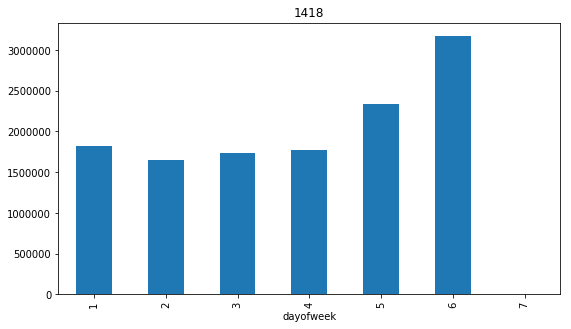

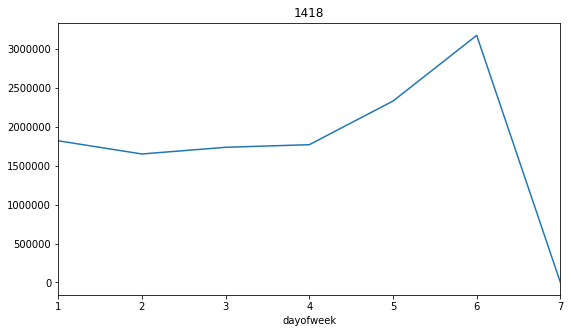

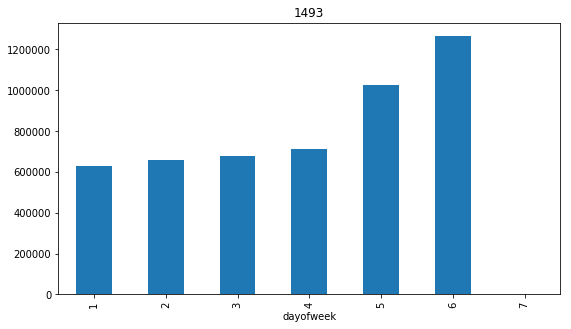

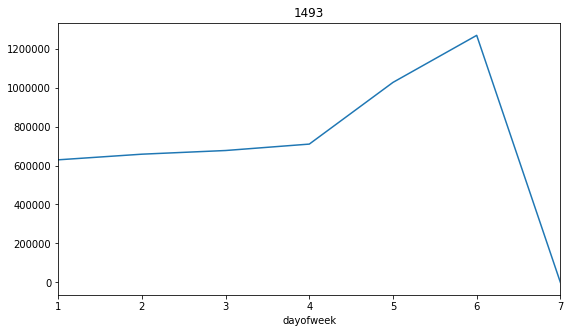

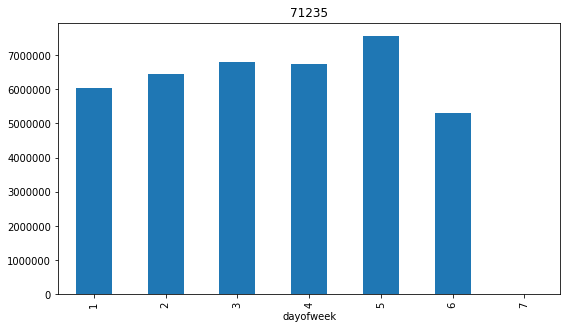

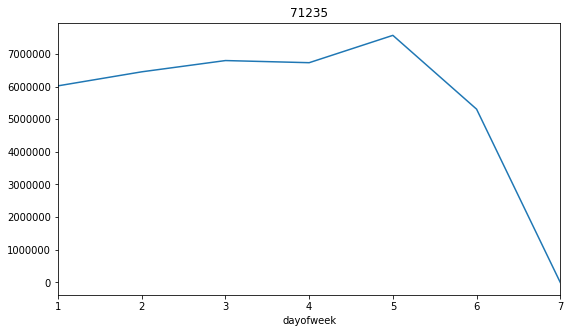

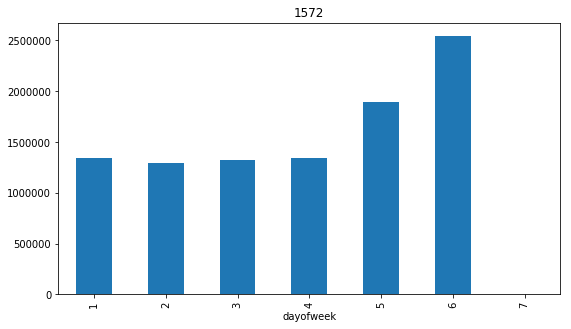

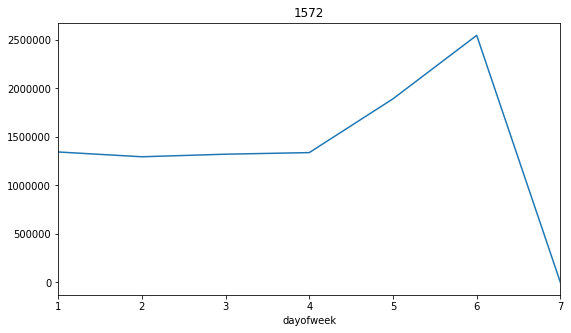

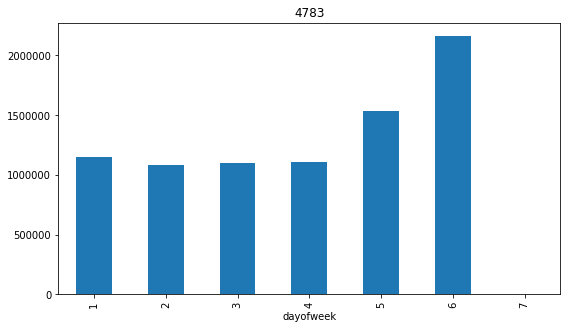

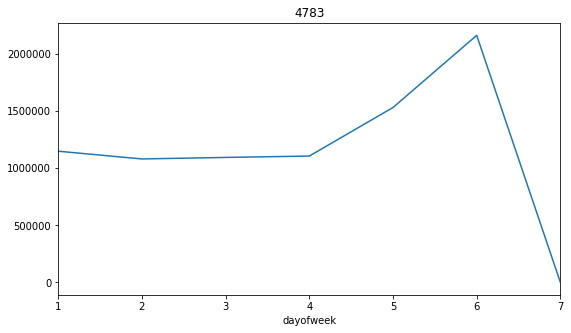

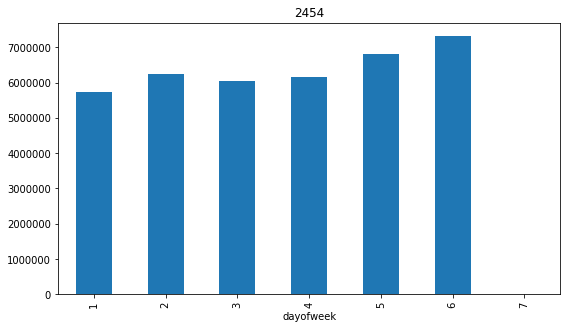

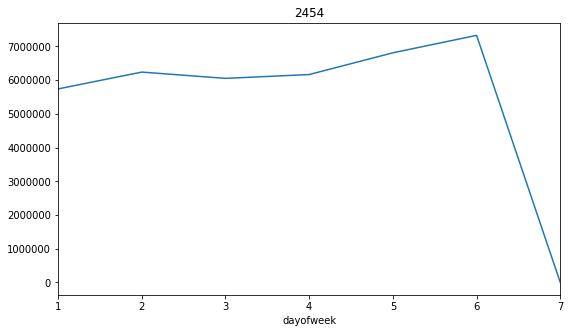

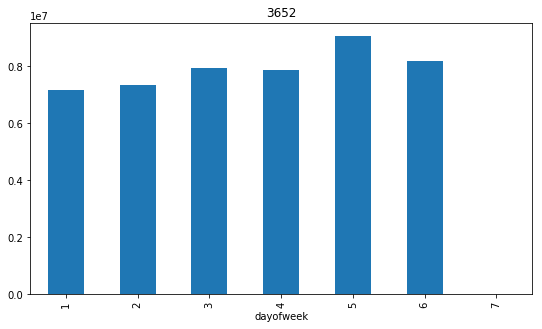

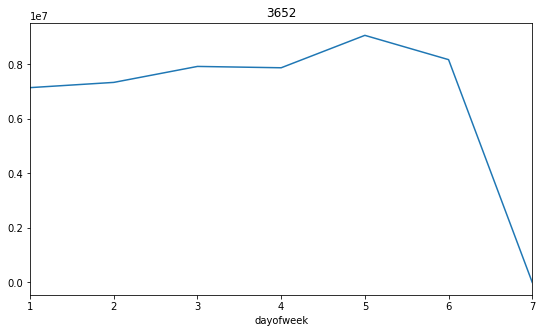

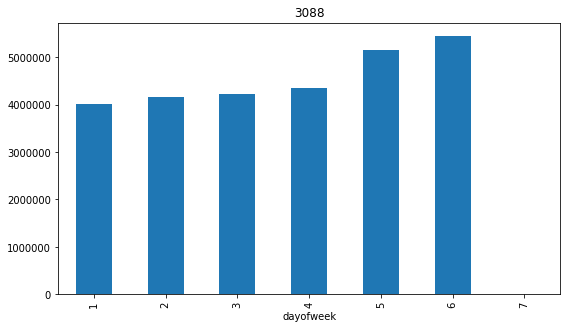

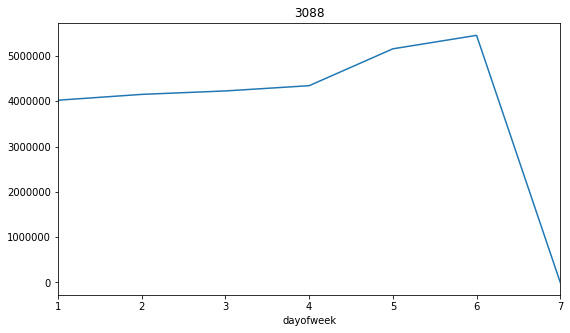

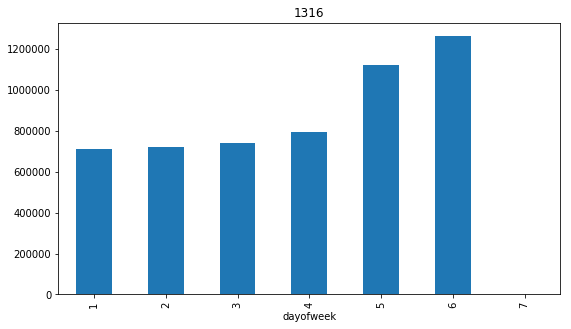

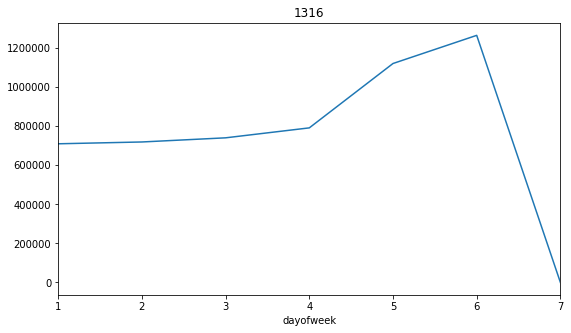

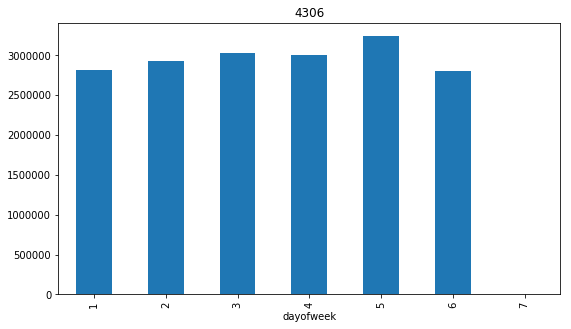

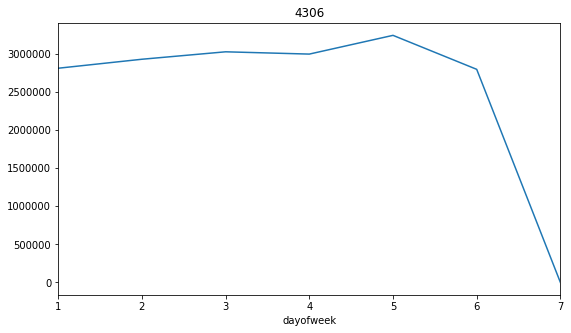

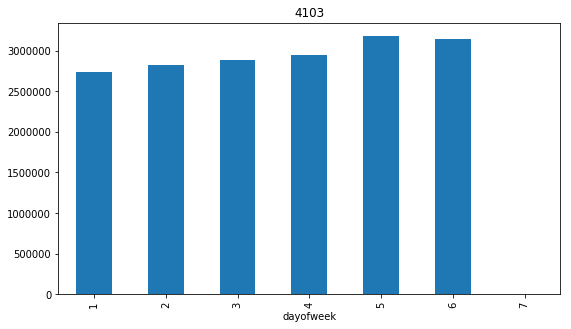

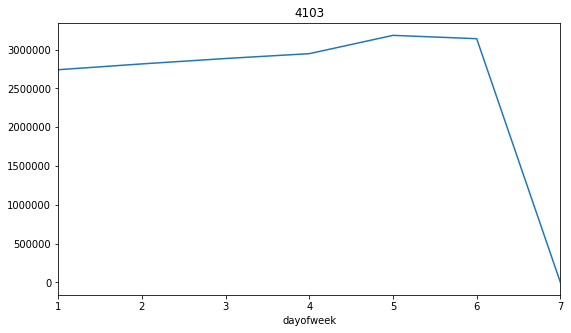

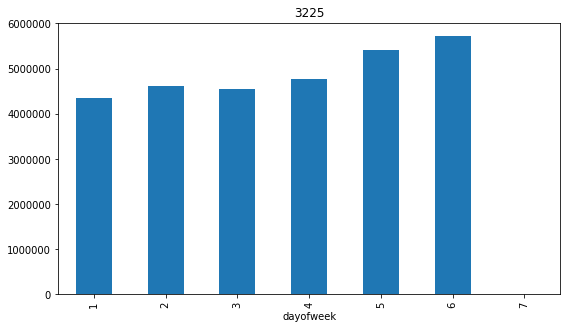

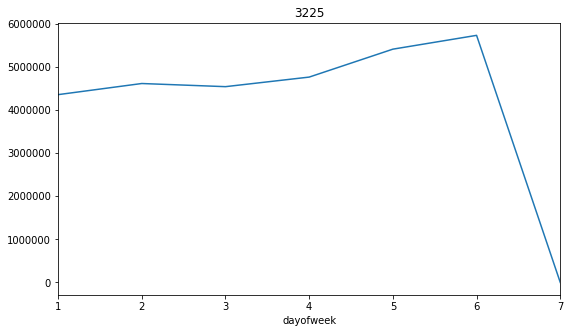

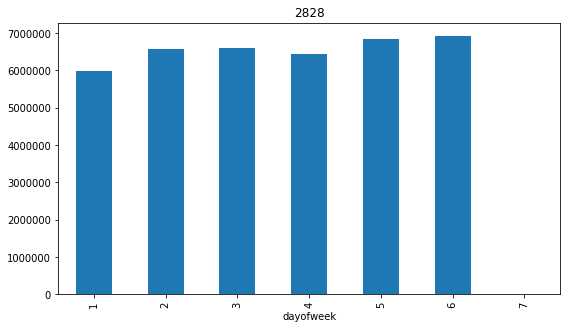

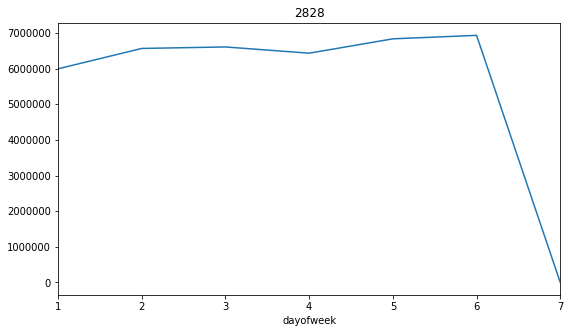

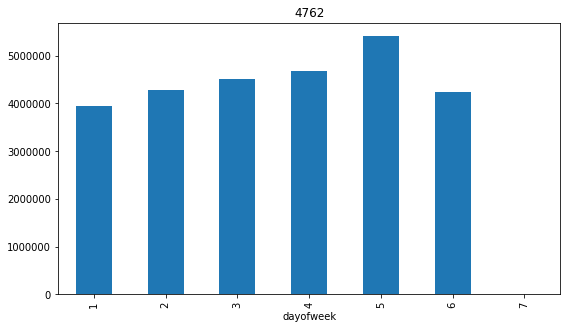

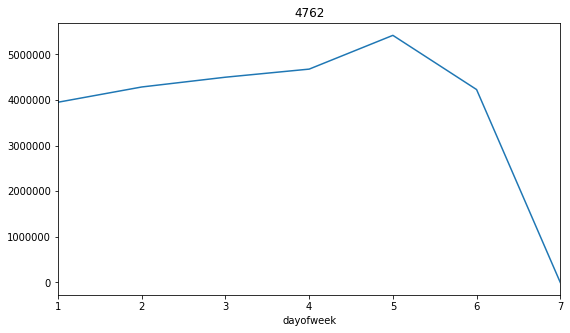

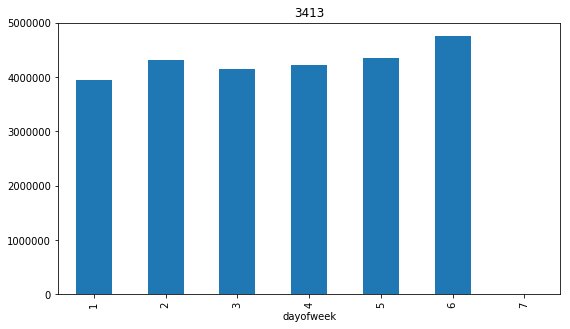

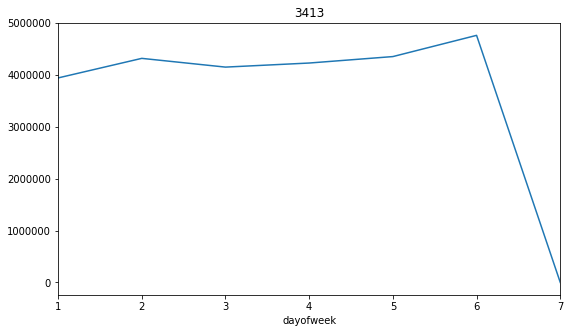

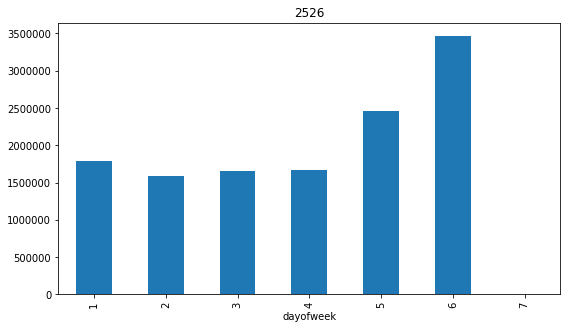

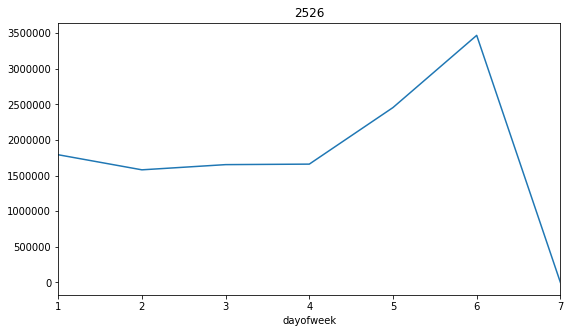

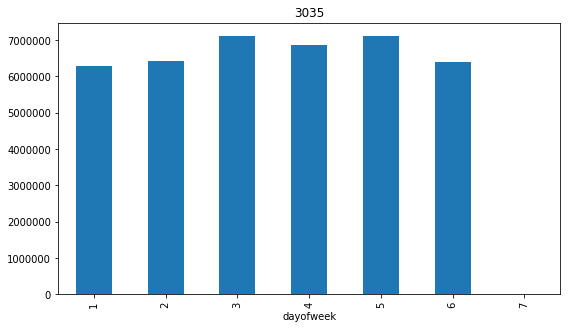

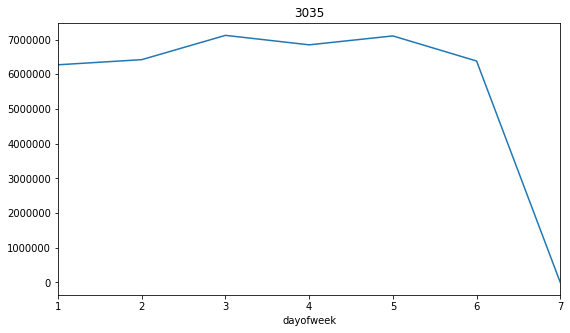

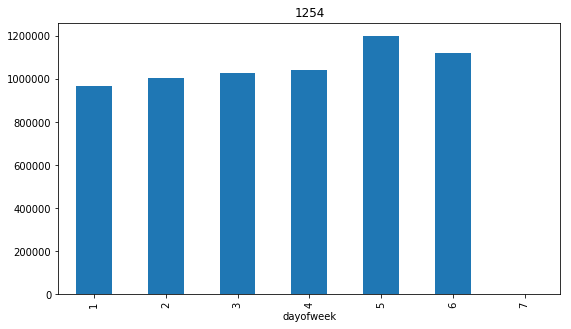

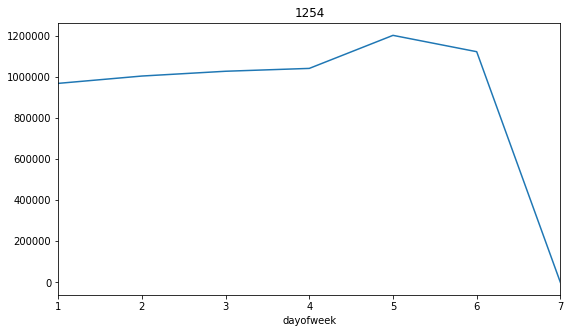

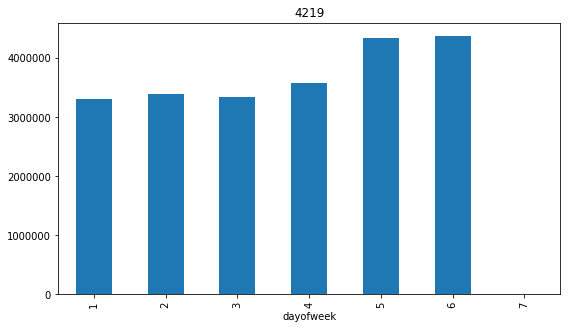

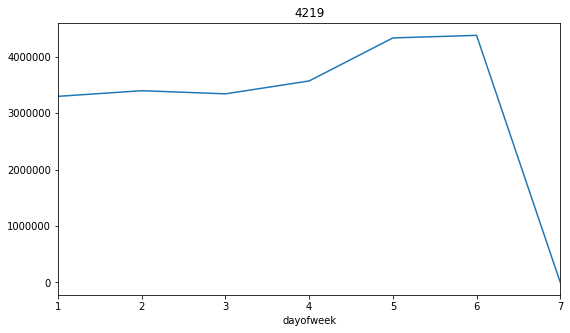

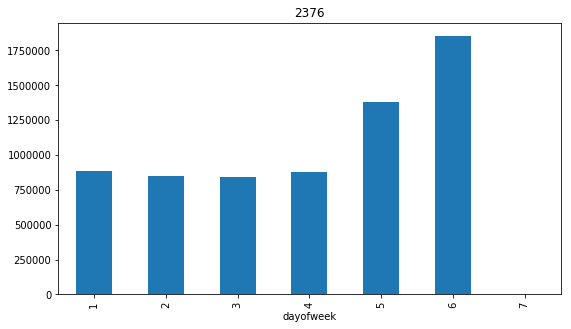

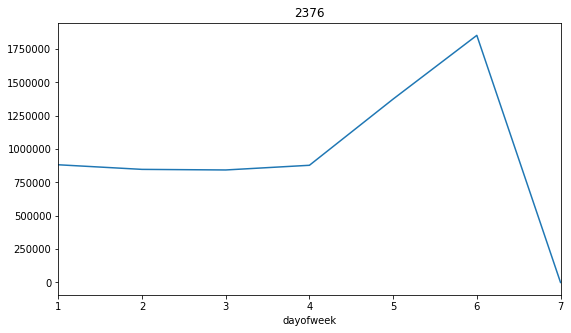

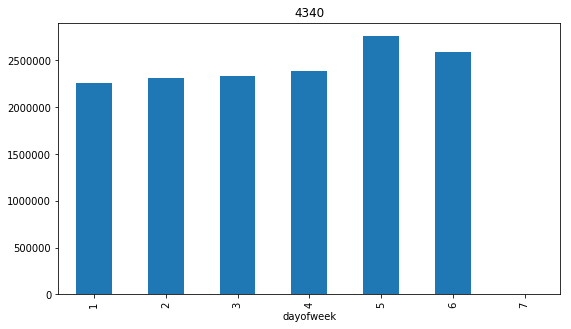

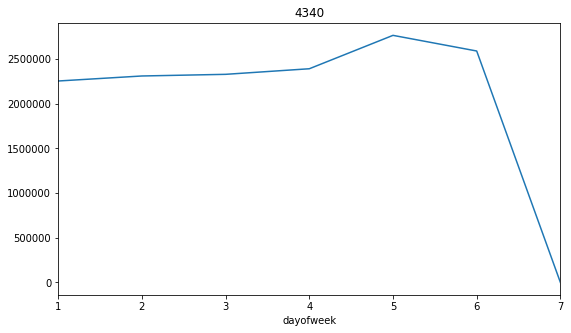

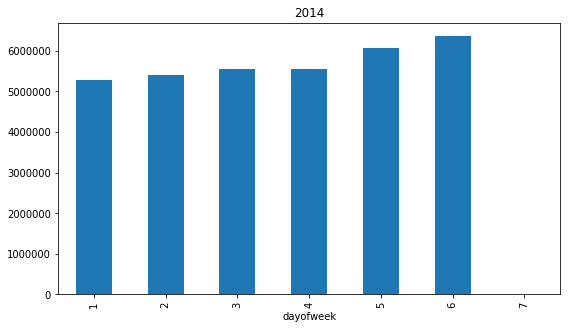

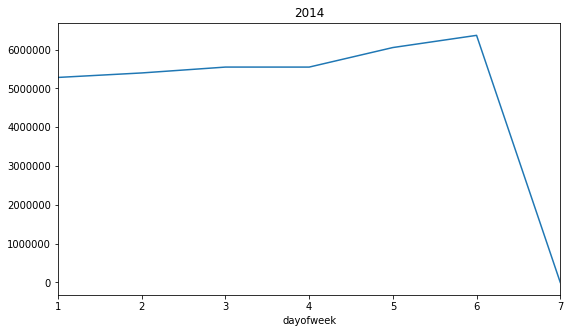

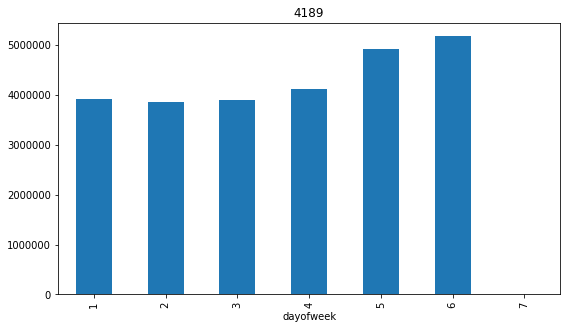

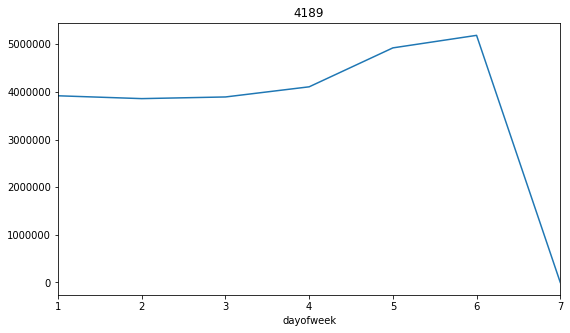

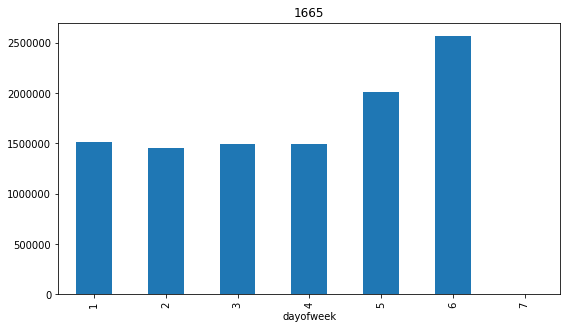

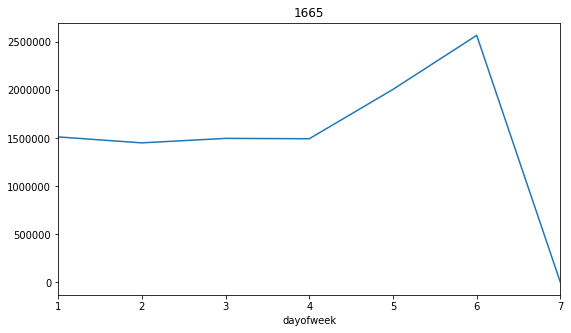

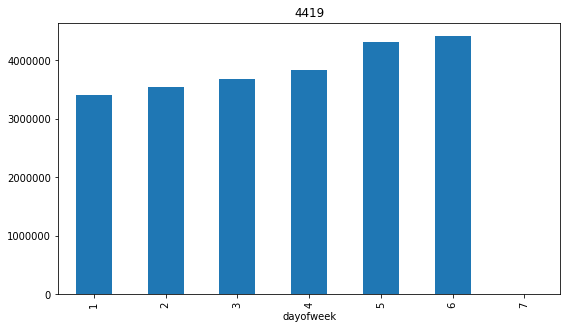

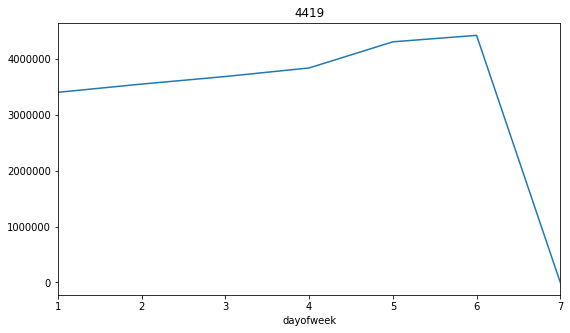

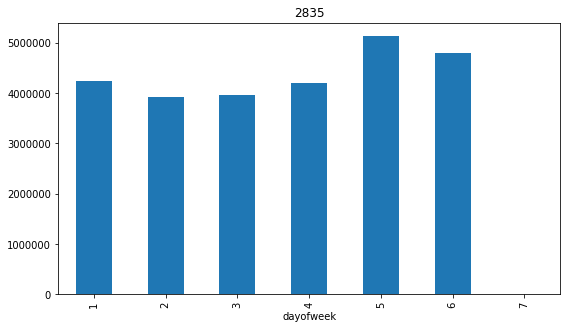

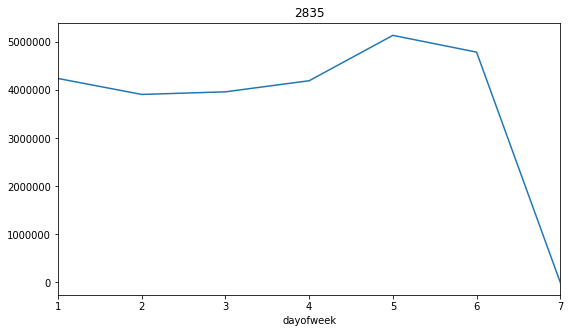

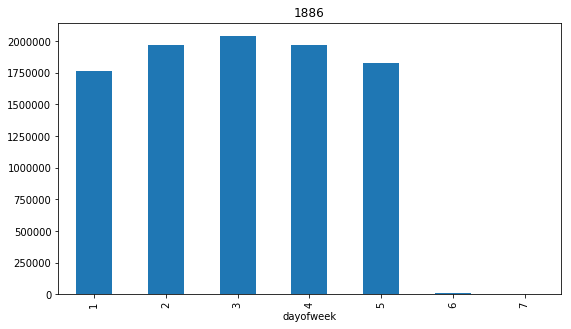

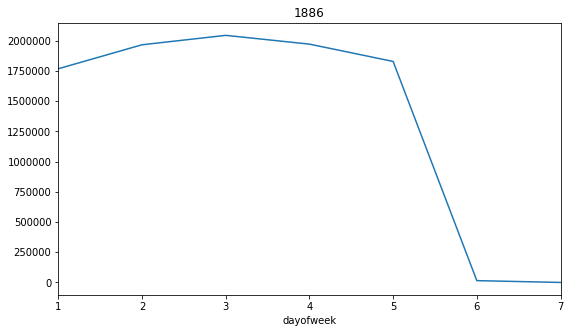

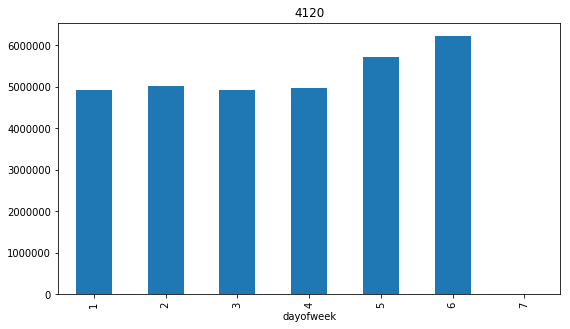

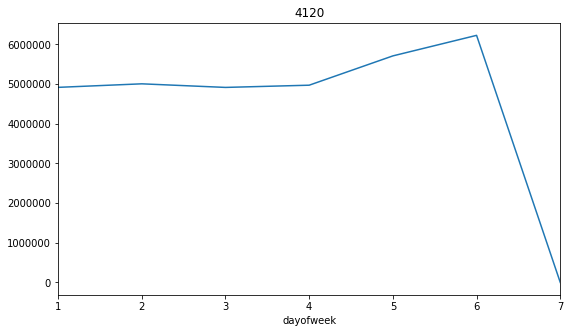

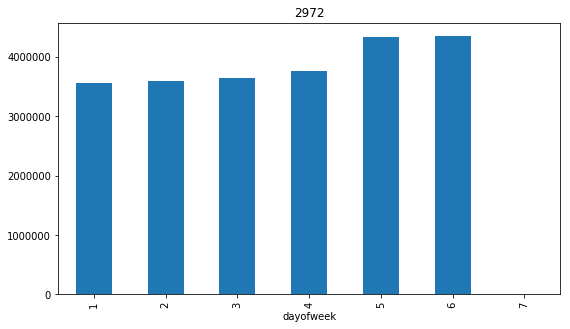

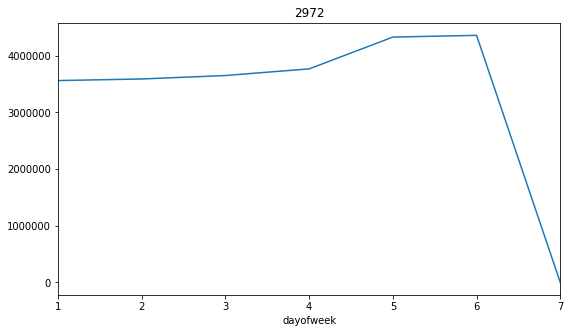

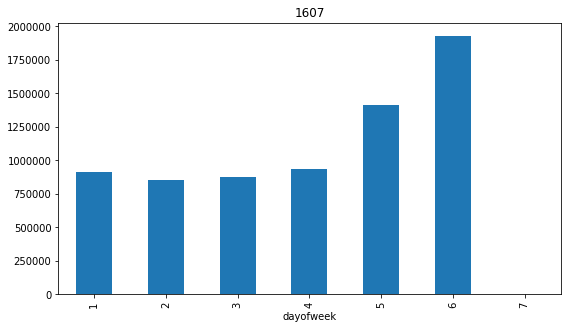

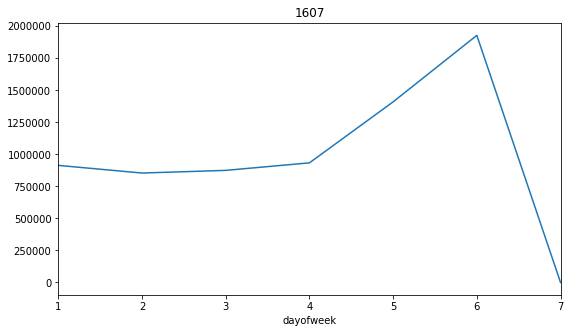

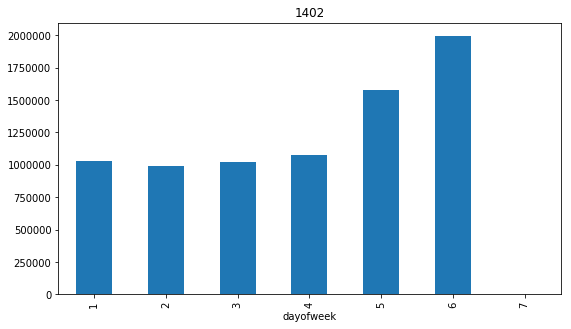

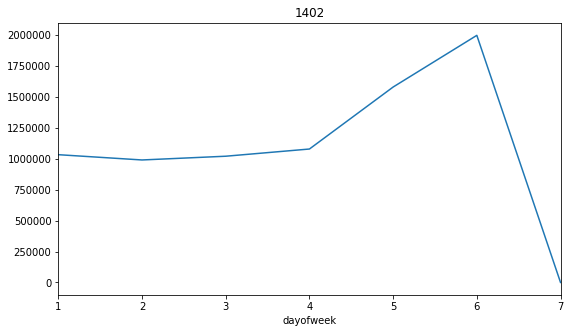

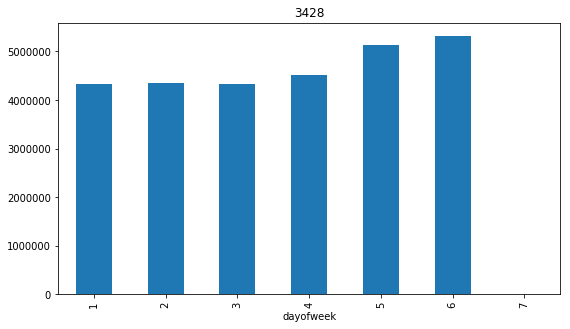

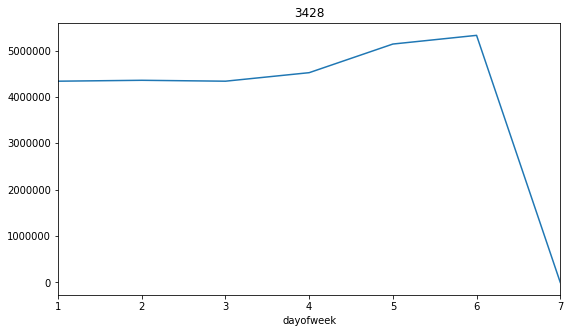

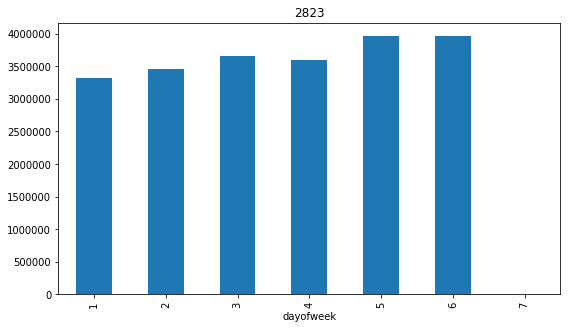

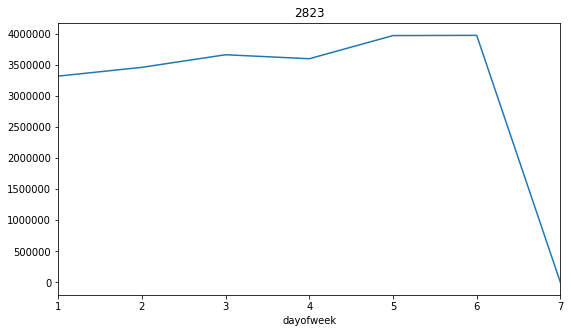

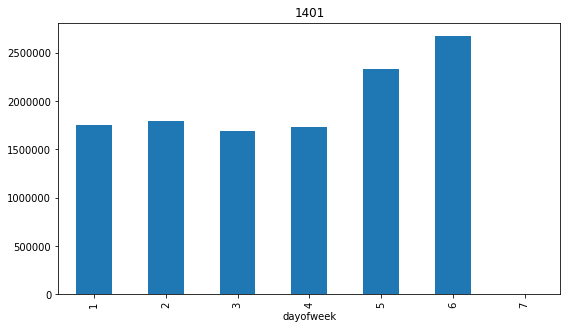

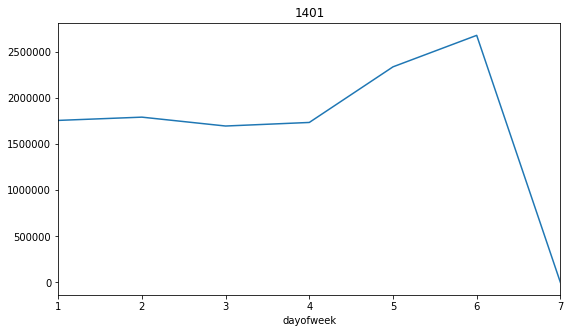

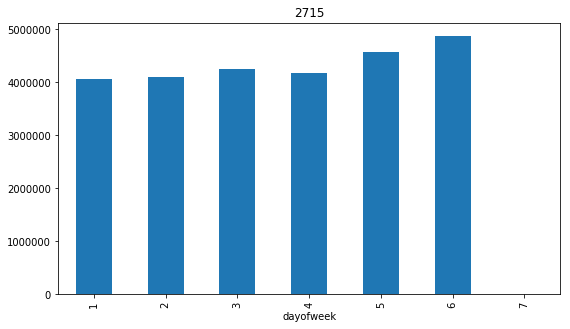

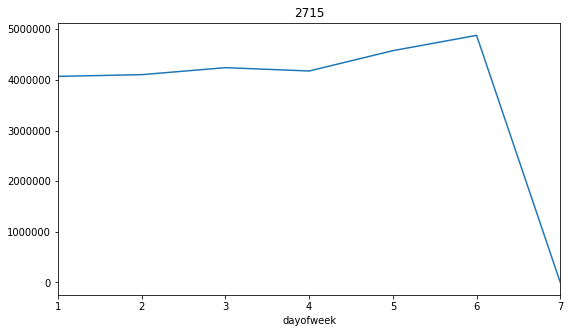

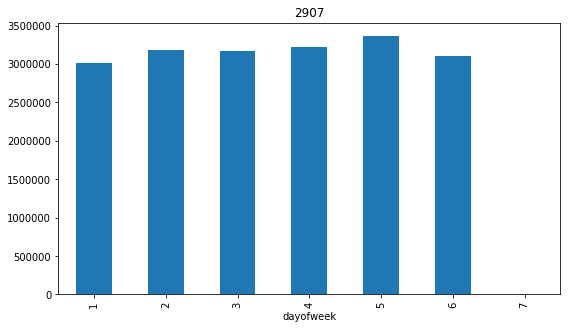

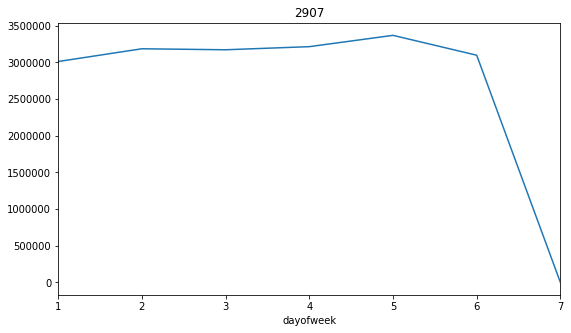

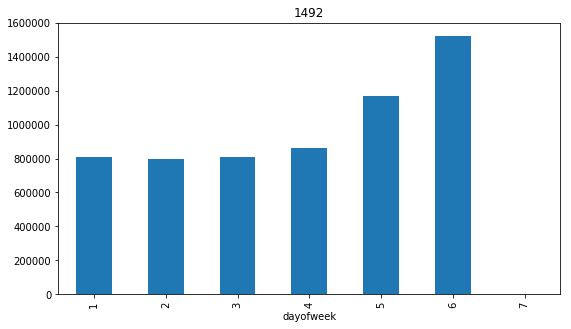

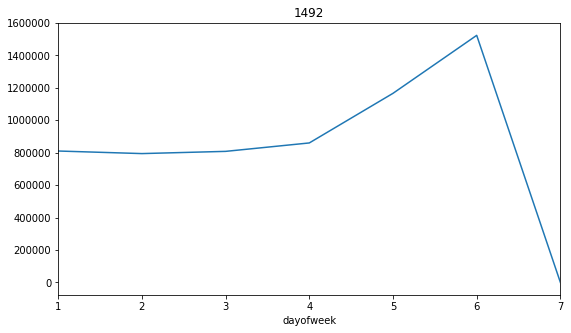

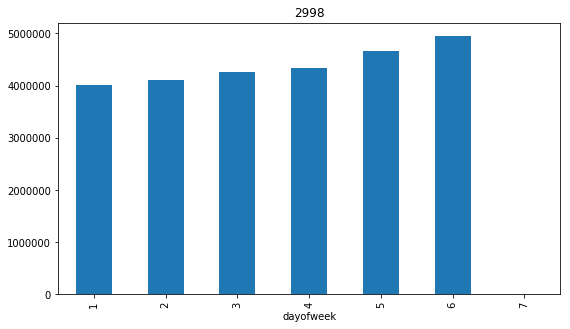

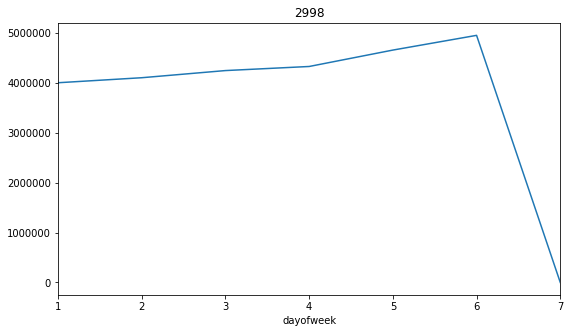

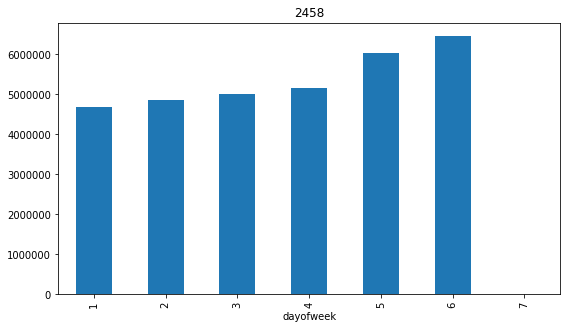

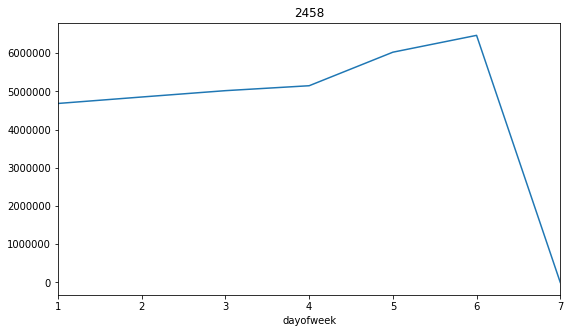

In [0]:
#Sales of each shopes over the week days
for i in data['location_num'].unique():
    test = data[data['location_num'] == i]
    temp = test.groupby(['dayofweek']).sales.sum()
    temp.plot(kind = 'bar',figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()
    temp.plot(figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()

2567


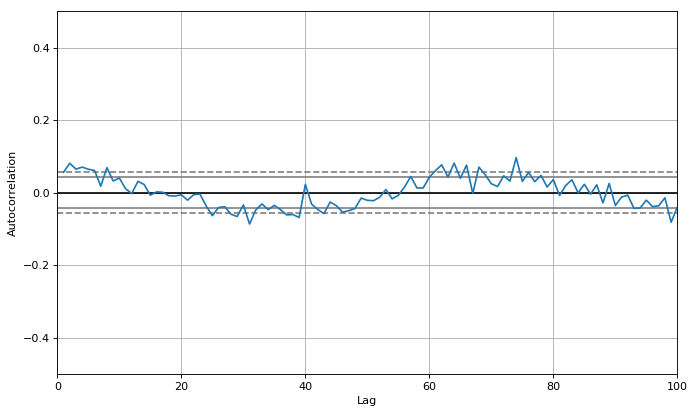

1418


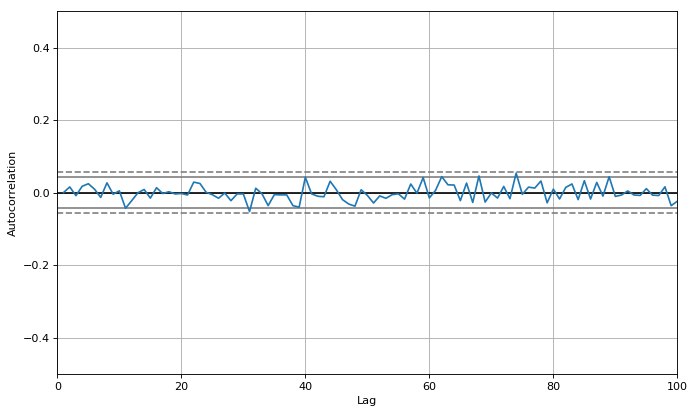

1493


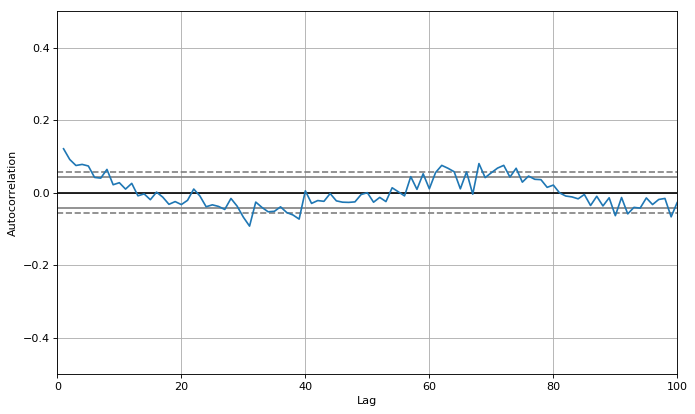

71235


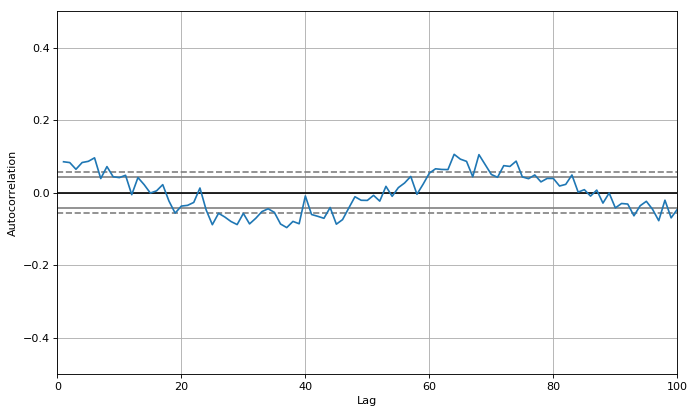

1572


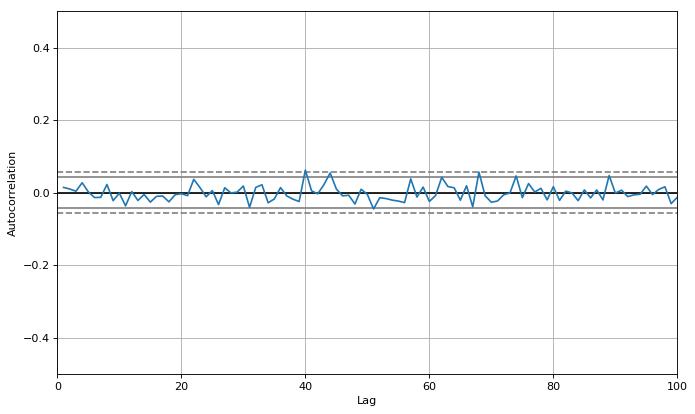

4783


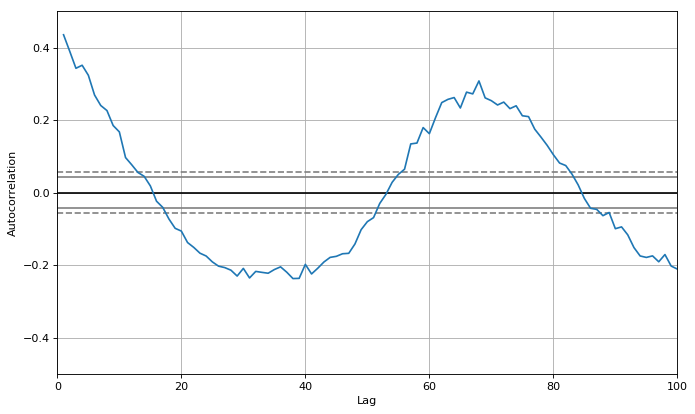

2454


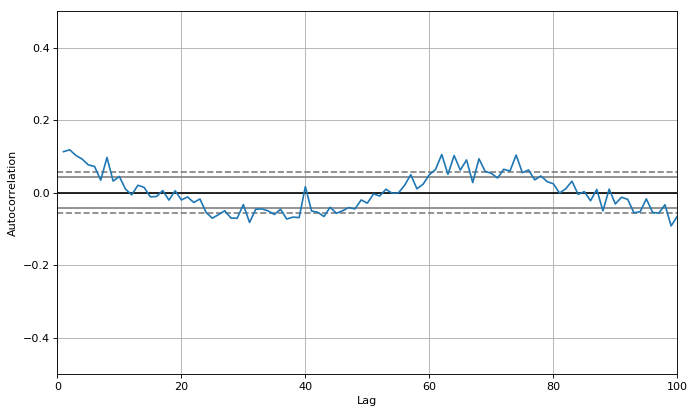

3652


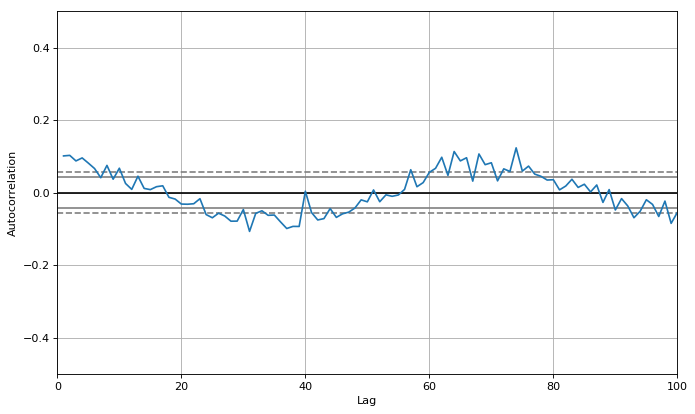

3088


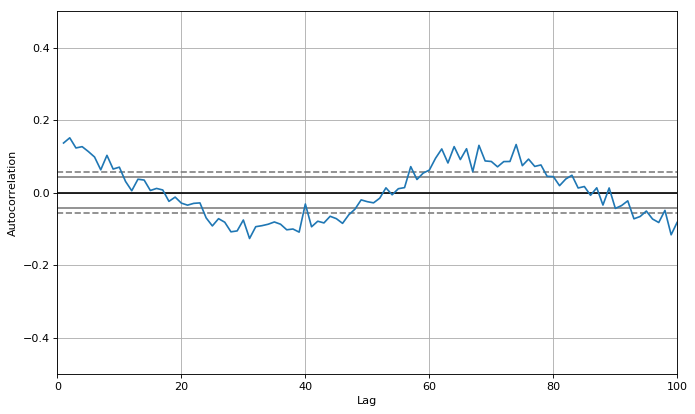

1316


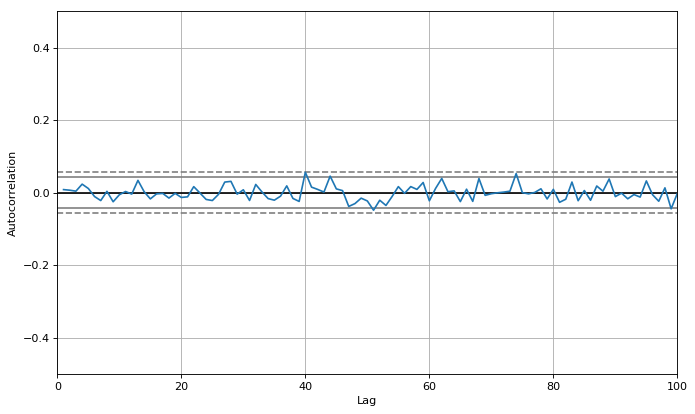

4306


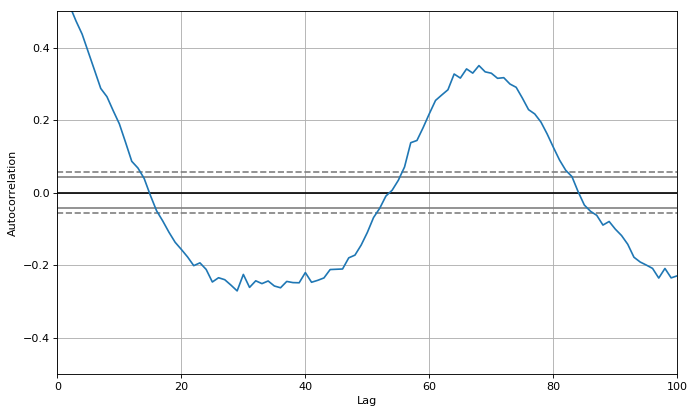

4103


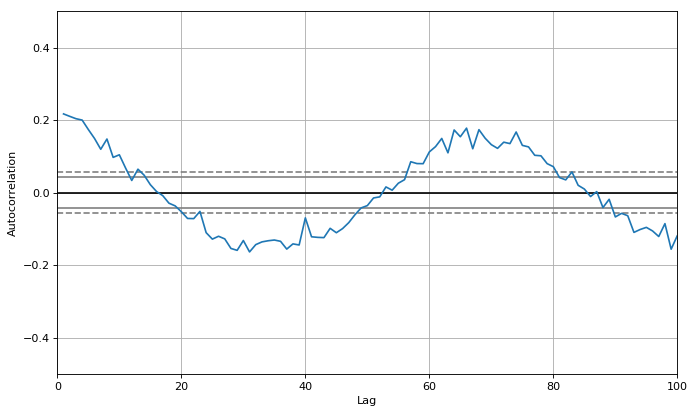

3225


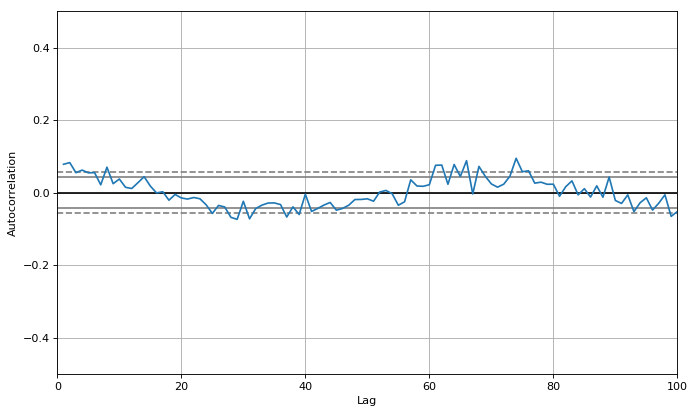

2828


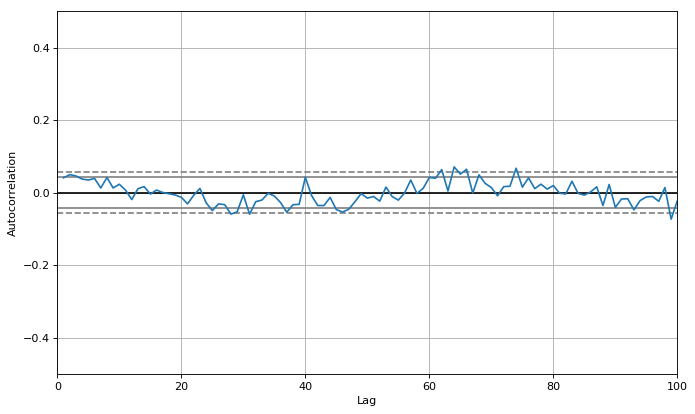

4762


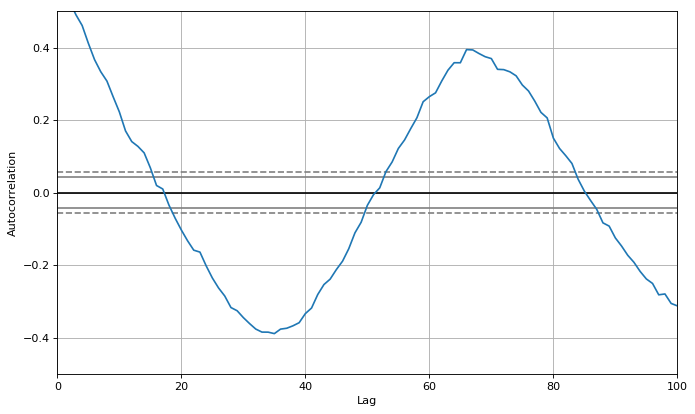

3413


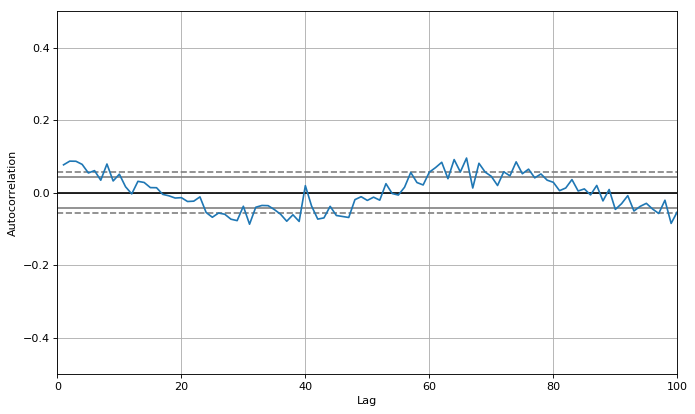

2526


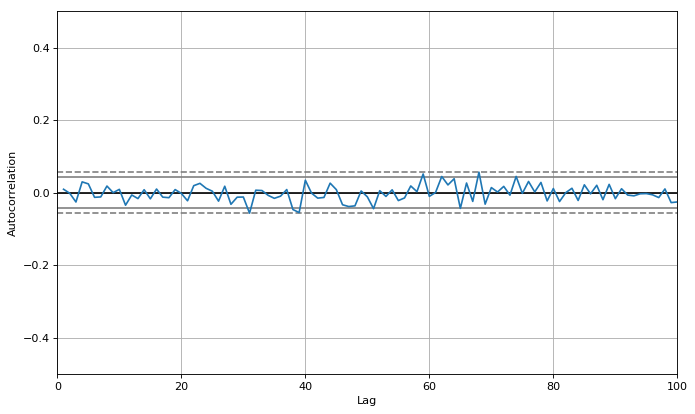

3035


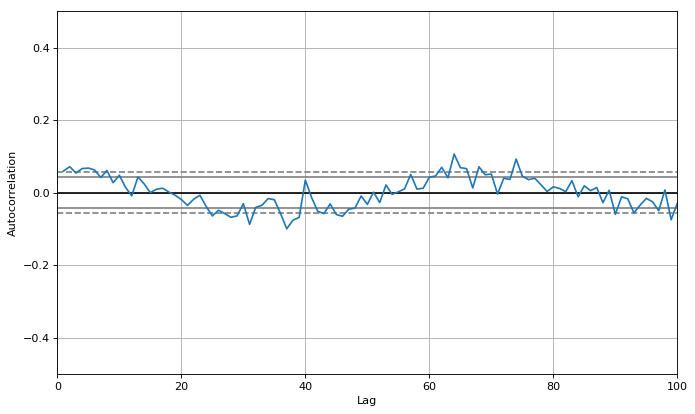

1254


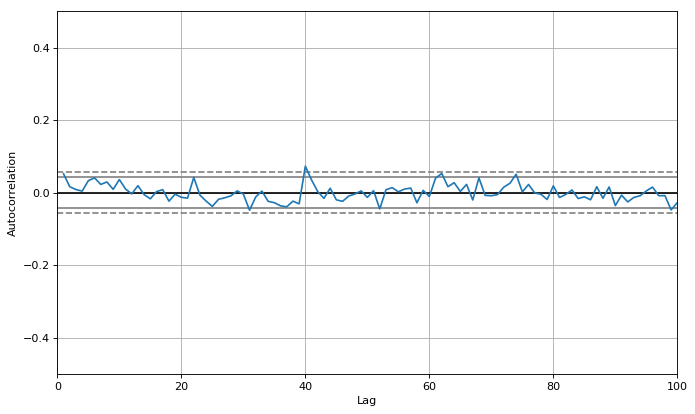

4219


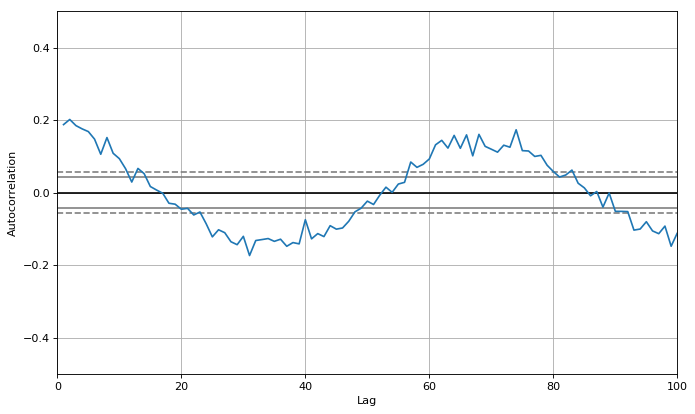

2376


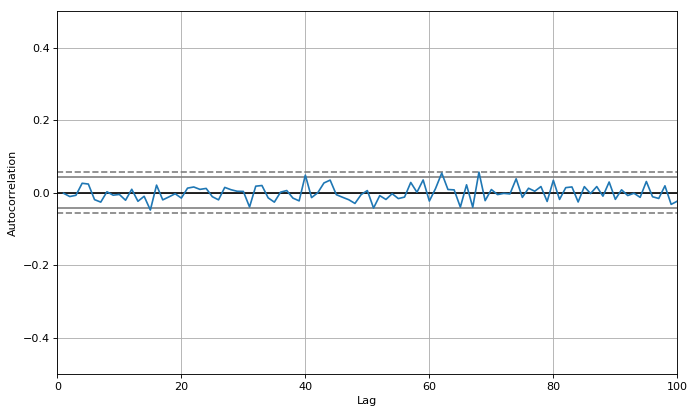

4340


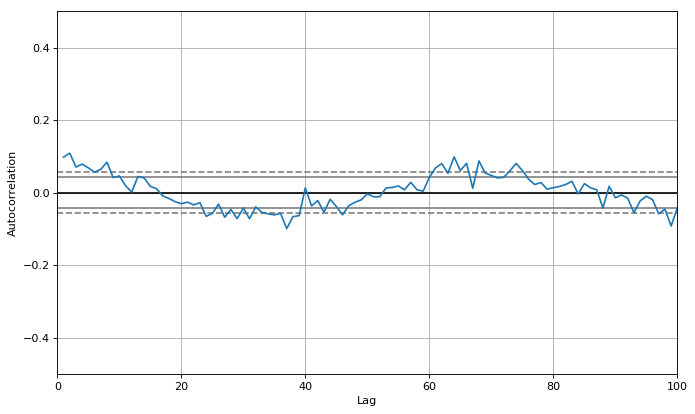

2014


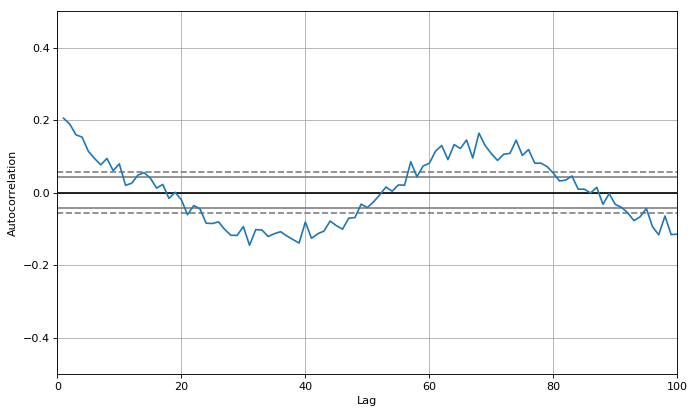

4189


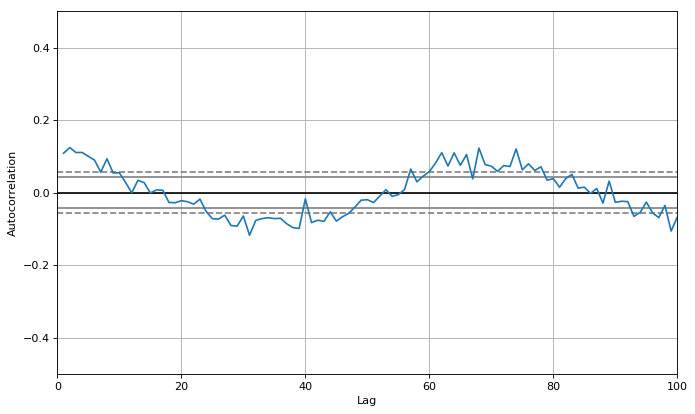

1665


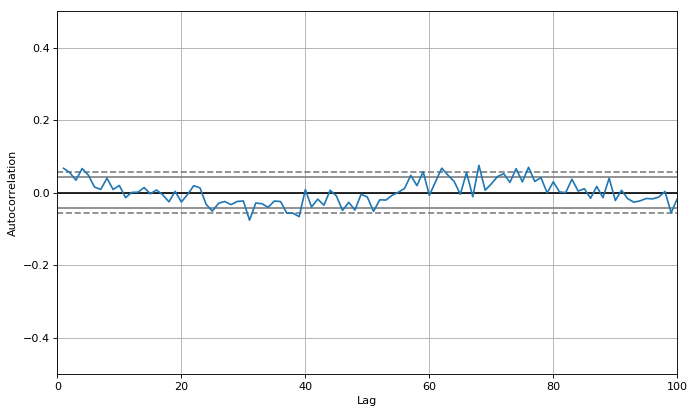

4419


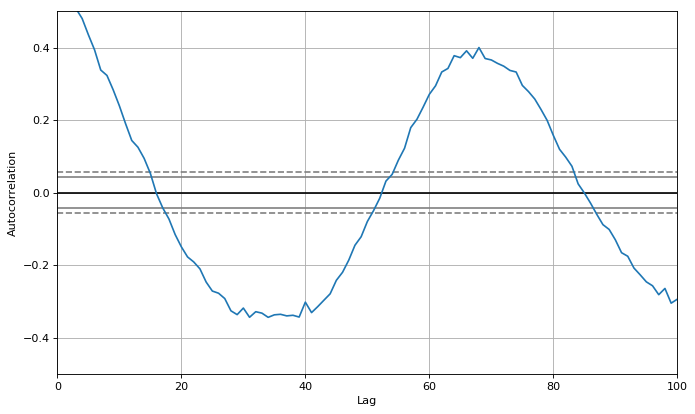

2835


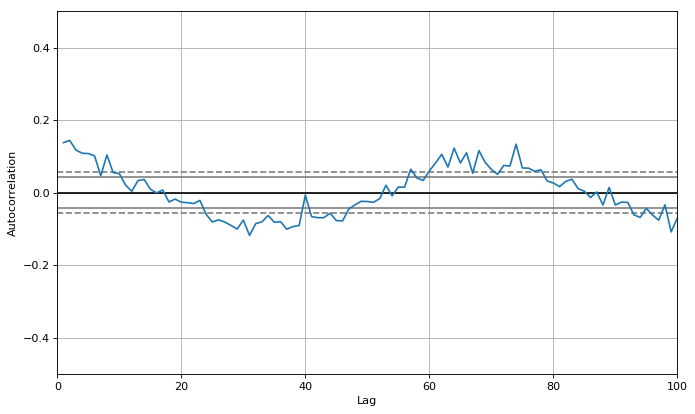

1886


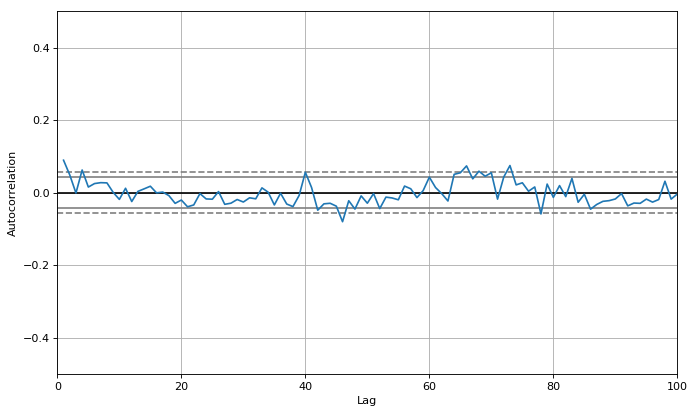

4120


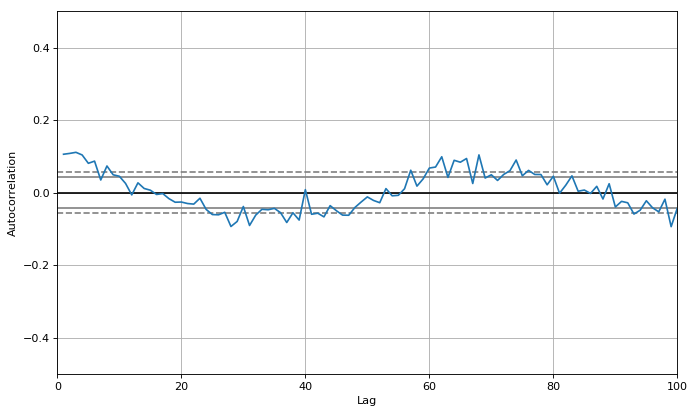

2972


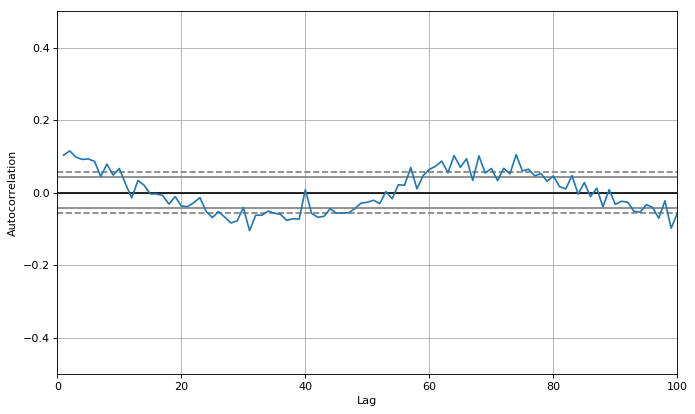

1607


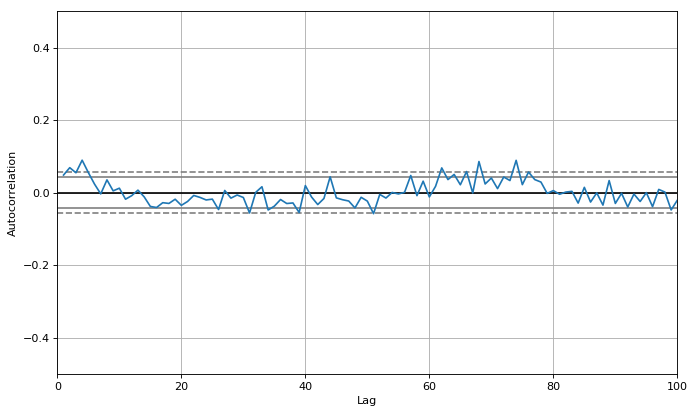

1402


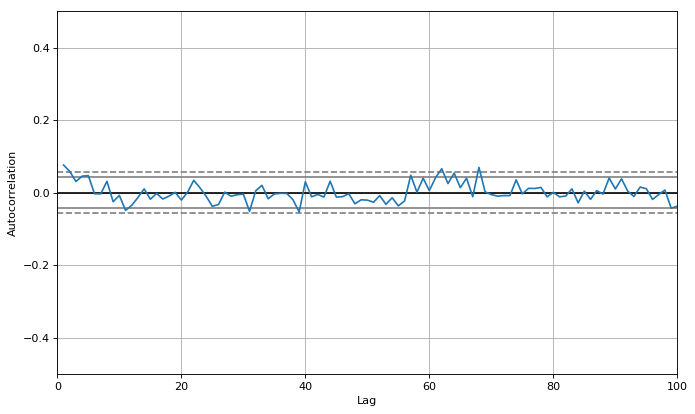

3428


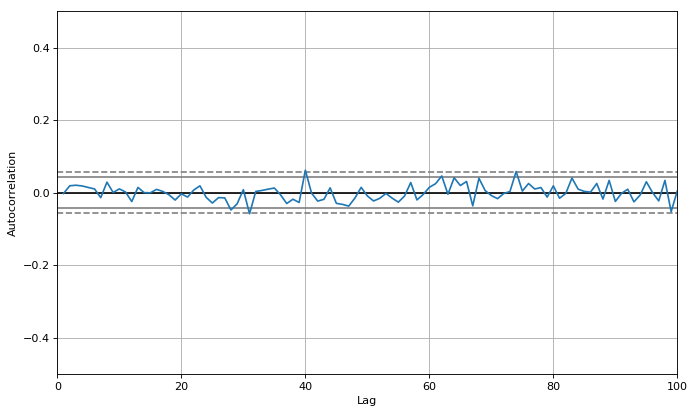

2823


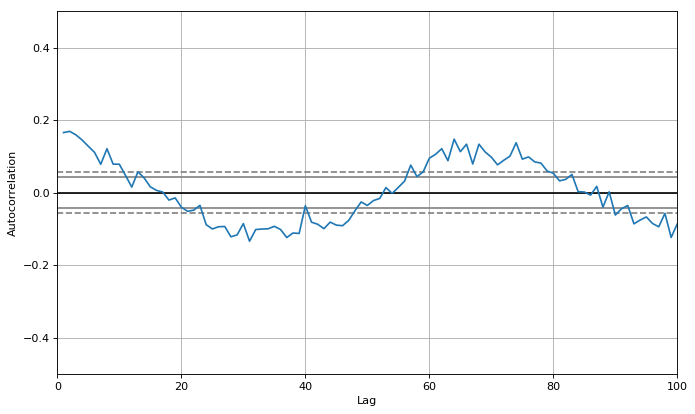

1401


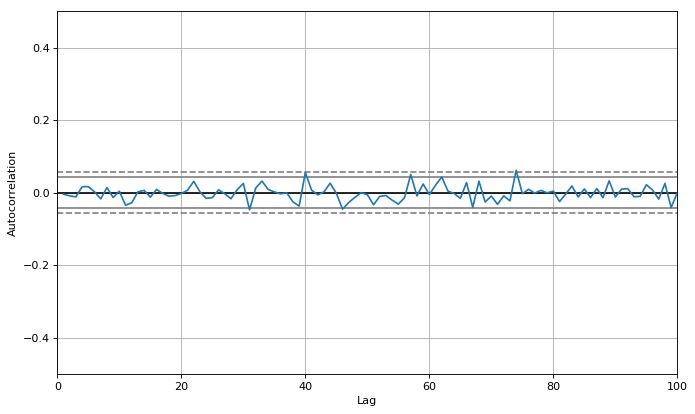

2715


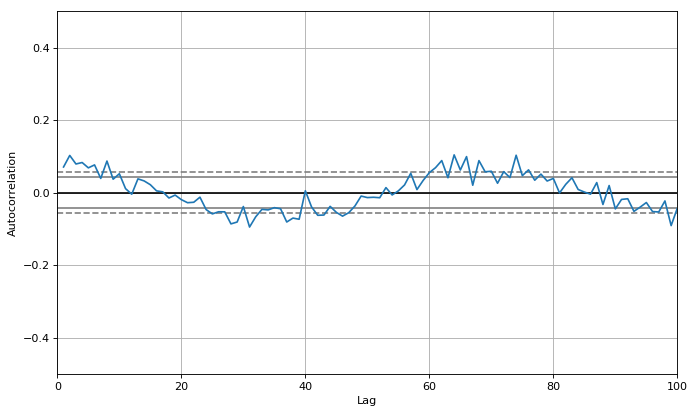

2907


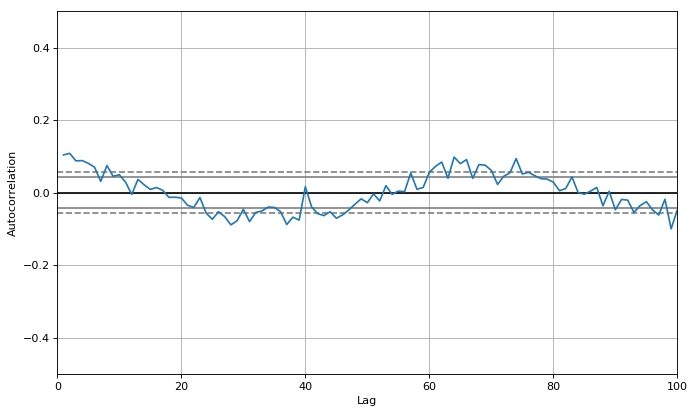

1492


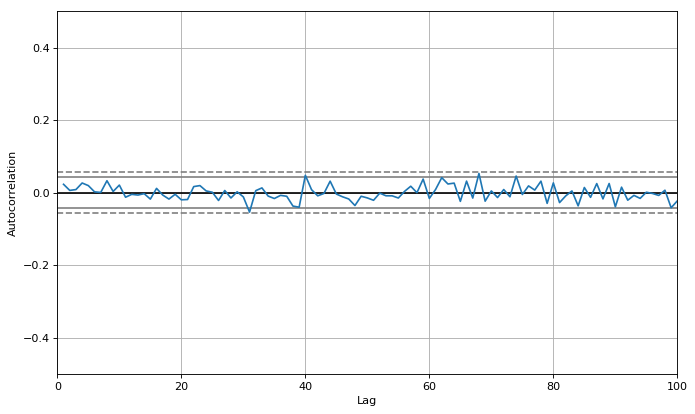

2998


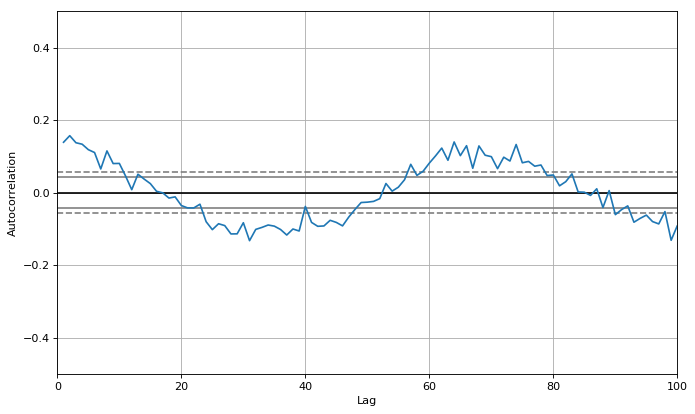

2458


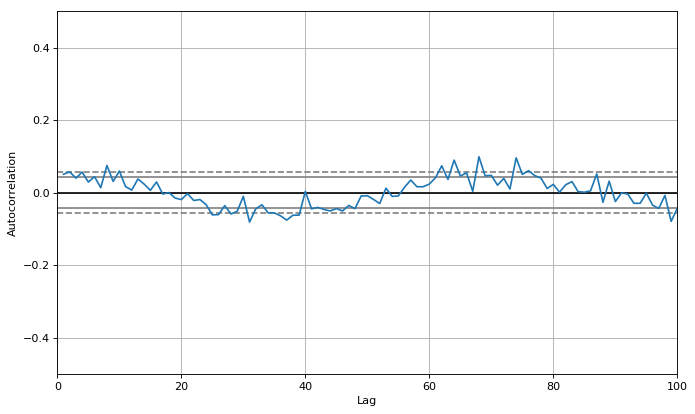

In [0]:
# Autocorrelation
for i in data['location_num'].unique():
    print(i)
    plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    from pandas.plotting import autocorrelation_plot
    autocorrelation_plot(data[data['location_num'] == i]['sales'])
    plt.ylim(-0.5,0.5)
    plt.xlim(0,100)    
    plt.show()


# Holiday's Analysis

In [0]:
data.columns

Index(['thanksgiving', 'christmas', 'onedaypriorchristmas_and_new_year',
       'federalholiday', 'holiday', 'blackfridaycheck', 'business_date',
       'dayofweek', 'Weekends', 'sales', 'trans', 'location_num',
       'federalholiday_name ', 'year', 'month', 'quarter'],
      dtype='object')

The best shop is 3652
The total sales is 830317.95


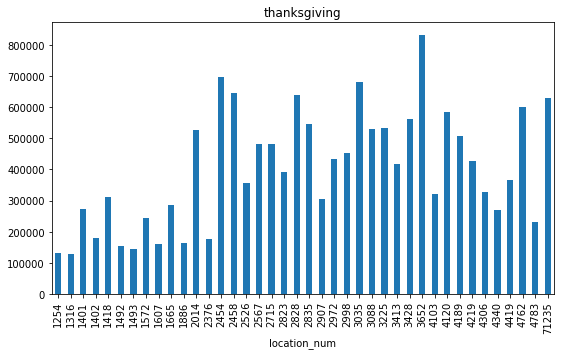

The best shop is 3652
The total sales is 1456387.8599999999


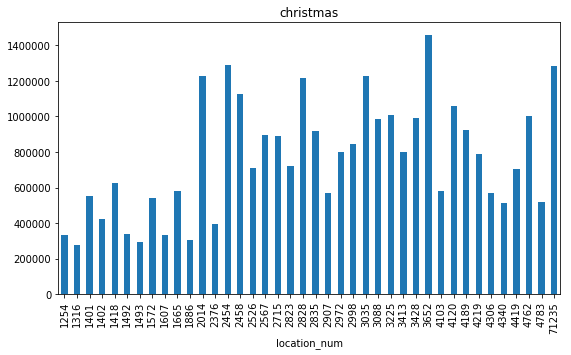

The best shop is 3652
The total sales is 170086.64


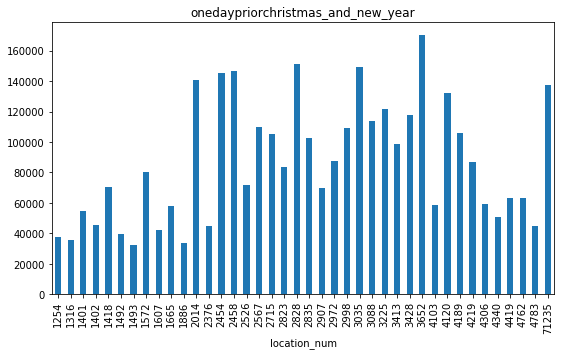

The best shop is 3652
The total sales is 918049.57


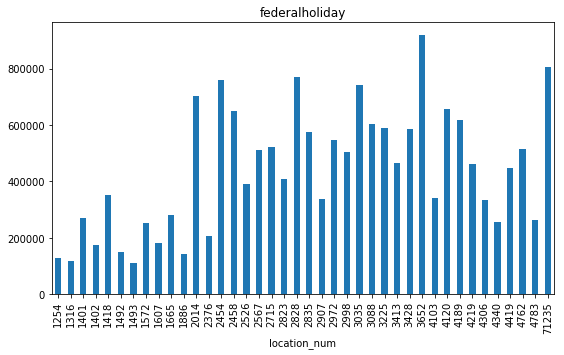

The best shop is 1254
The total sales is 0.0


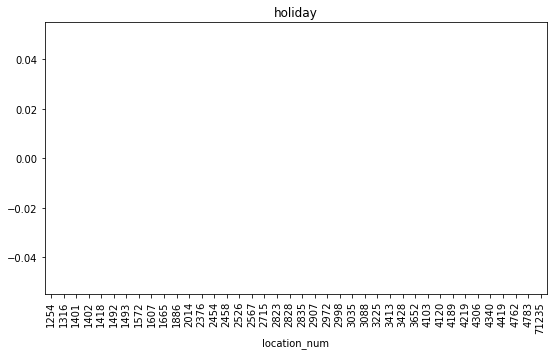

The best shop is 3652
The total sales is 126811.95999999999


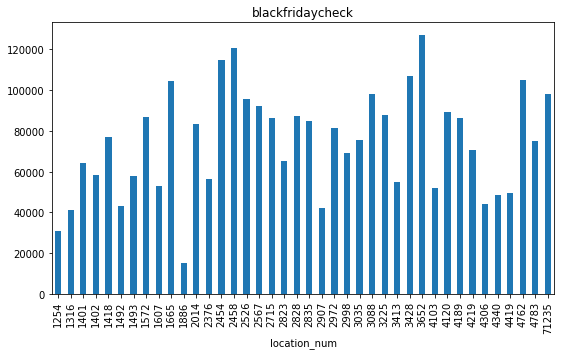

In [0]:
#Sales during different holidays of each shops
for i in ['thanksgiving', 'christmas', 'onedaypriorchristmas_and_new_year','federalholiday', 'holiday', 'blackfridaycheck']:
    test = data[data[i] == 1]
    temp = test.groupby(['location_num']).sales.sum()
    print('The best shop is',temp.idxmax())
    print('The total sales is',temp.max())
    temp.plot(kind = 'bar',figsize=(9,5), sharey = True)
    plt.title(i)
    plt.show()

Best Shop during thanksgiving 3652 And total Sales 123450.58


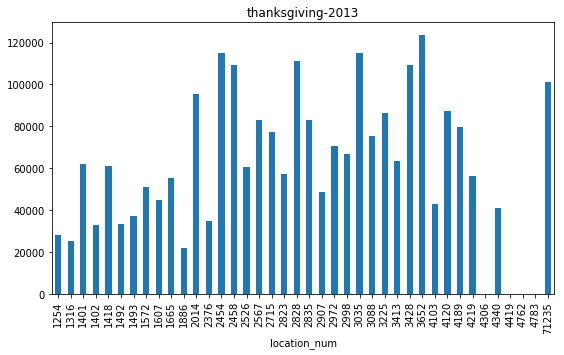

Best Shop during thanksgiving 3652 And total Sales 166169.56


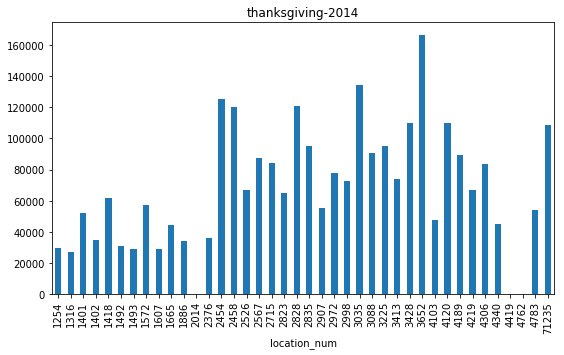

Best Shop during thanksgiving 4762 And total Sales 252895.86


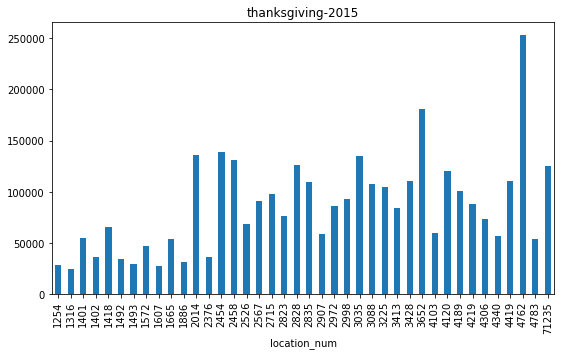

Best Shop during thanksgiving 3652 And total Sales 185137.98


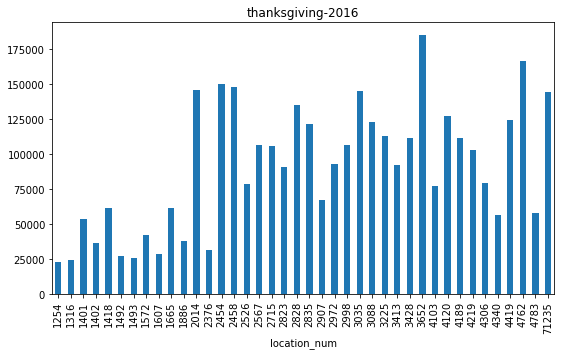

Best Shop during thanksgiving 4762 And total Sales 179104.46000000002


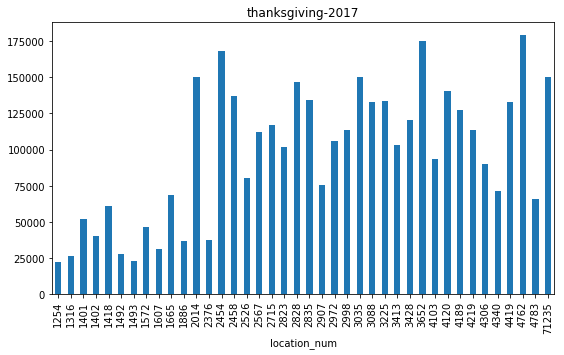

Null values are there
----------------------------------------------------------------------------------------------------
Best Shop during christmas 3652 And total Sales 225099.93000000002


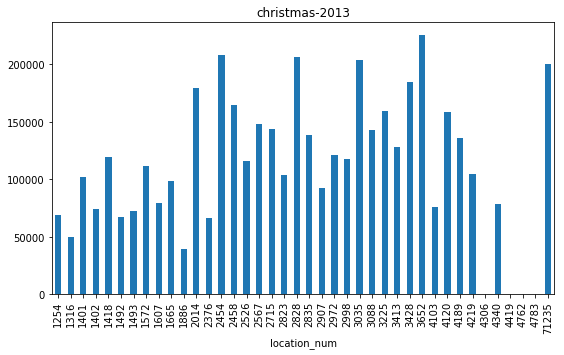

Best Shop during christmas 3652 And total Sales 279893.86


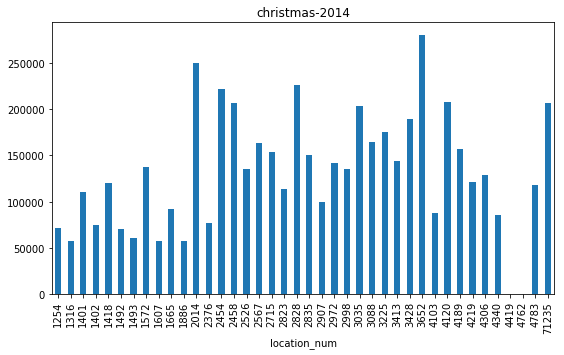

Best Shop during christmas 4762 And total Sales 326000.48000000004


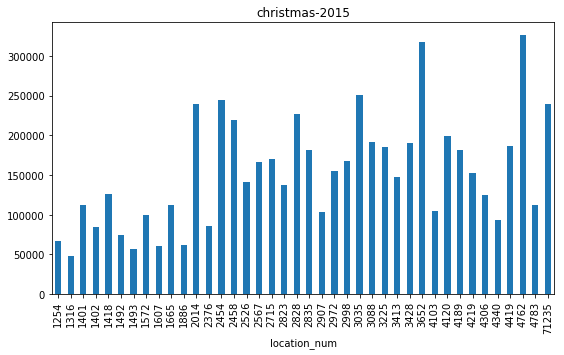

Best Shop during christmas 4762 And total Sales 332622.8900000001


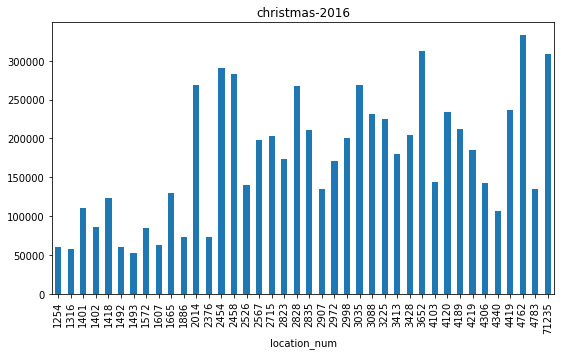

Best Shop during christmas 4762 And total Sales 344667.48999999993


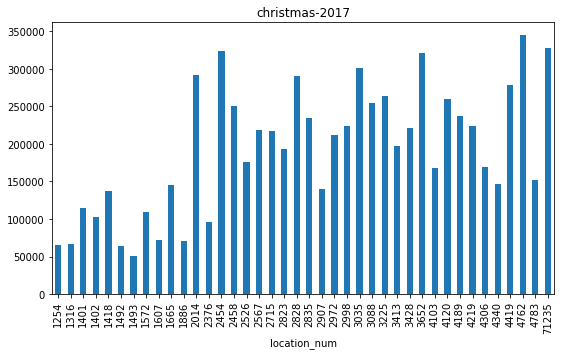

Null values are there
----------------------------------------------------------------------------------------------------
Best Shop during onedaypriorchristmas_and_new_year 2458 And total Sales 46646.64


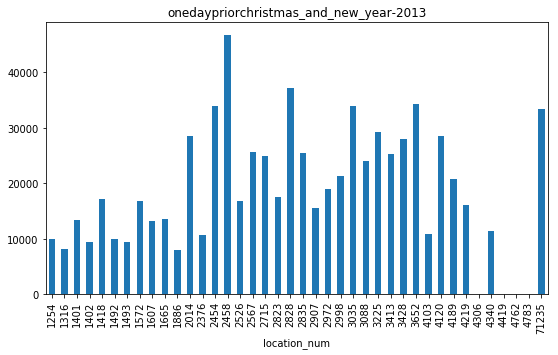

Best Shop during onedaypriorchristmas_and_new_year 3652 And total Sales 44475.71000000001


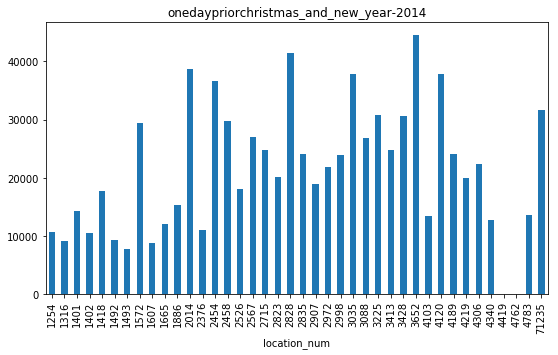

Best Shop during onedaypriorchristmas_and_new_year 3652 And total Sales 49115.64


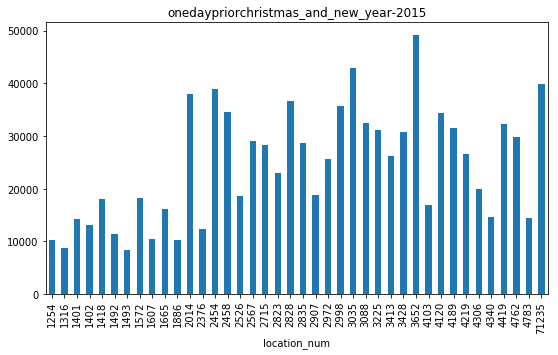

Best Shop during onedaypriorchristmas_and_new_year 3652 And total Sales 42217.3


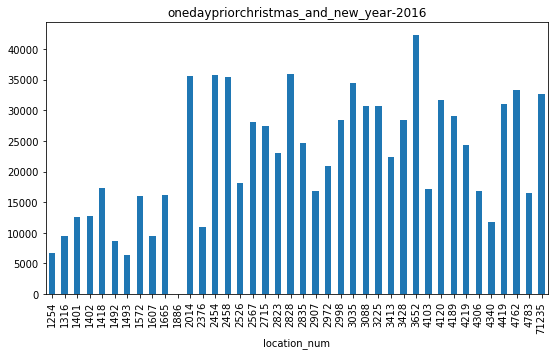

Best Shop during onedaypriorchristmas_and_new_year 1254 And total Sales 0.0


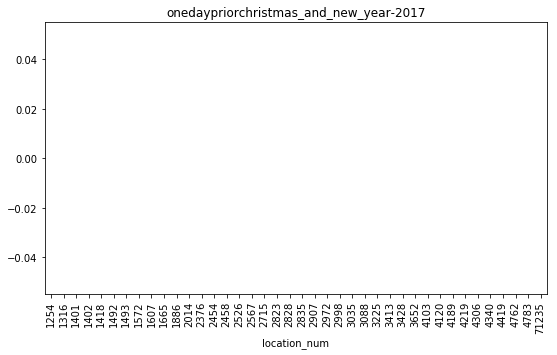

Null values are there
----------------------------------------------------------------------------------------------------
Best Shop during federalholiday 2828 And total Sales 102237.06


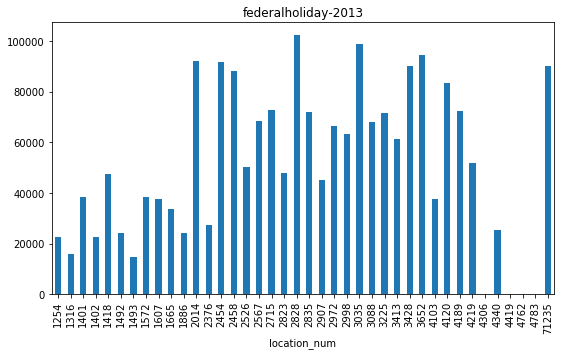

Best Shop during federalholiday 3652 And total Sales 139992.49


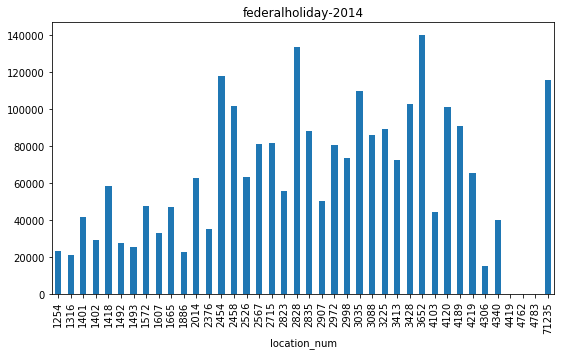

Best Shop during federalholiday 3652 And total Sales 193901.07


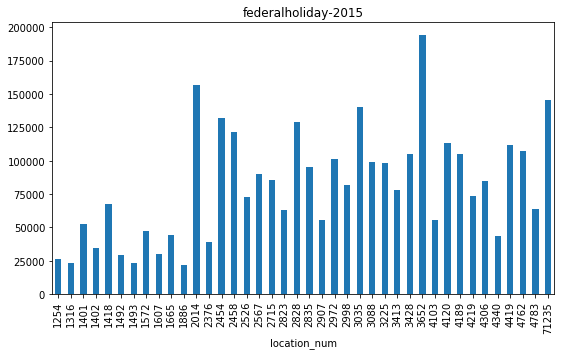

Best Shop during federalholiday 3652 And total Sales 198210.08000000002


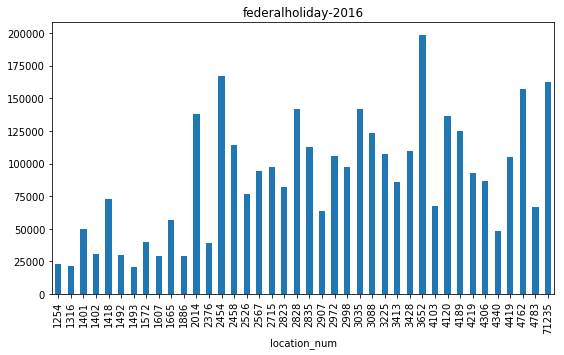

Best Shop during federalholiday 3652 And total Sales 194575.53


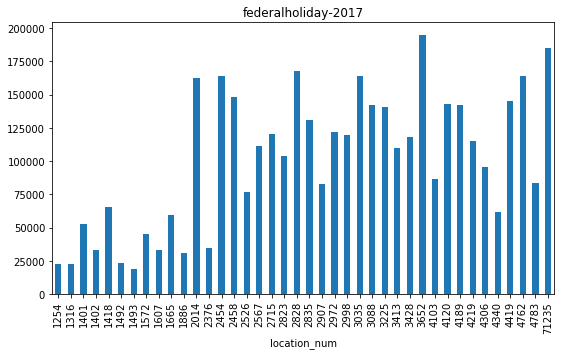

Best Shop during federalholiday 71235 And total Sales 108325.74


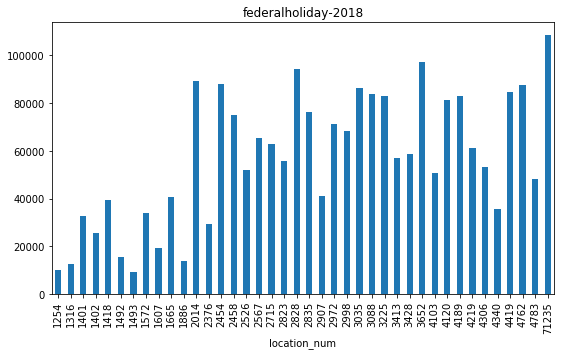

----------------------------------------------------------------------------------------------------
Best Shop during holiday 1254 And total Sales 0.0


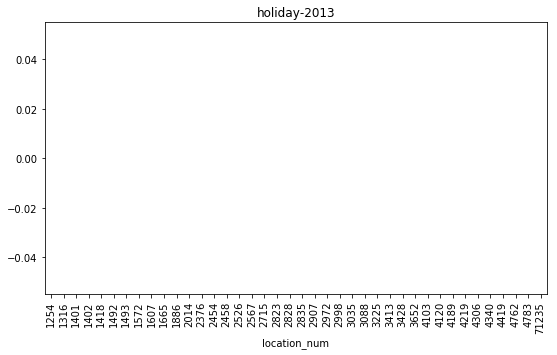

Best Shop during holiday 1254 And total Sales 0.0


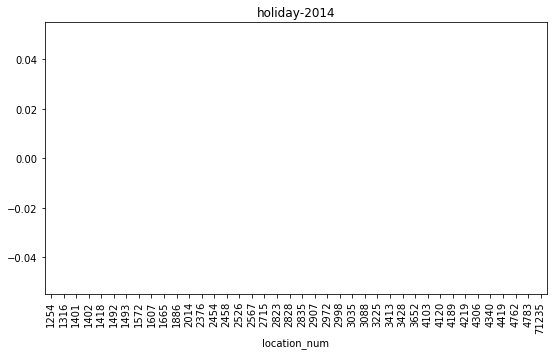

Best Shop during holiday 1254 And total Sales 0.0


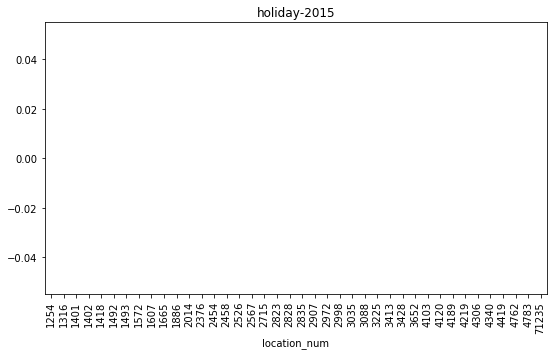

Best Shop during holiday 1254 And total Sales 0.0


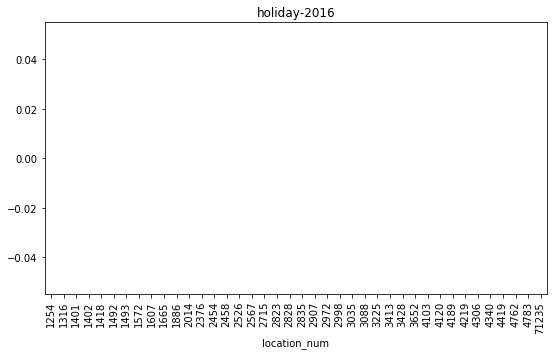

Best Shop during holiday 1254 And total Sales 0.0


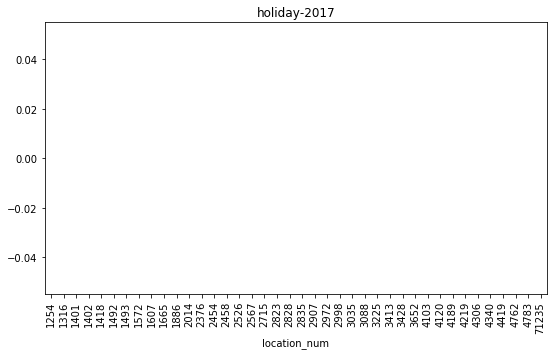

Null values are there
----------------------------------------------------------------------------------------------------
Best Shop during blackfridaycheck 1665 And total Sales 23048.84


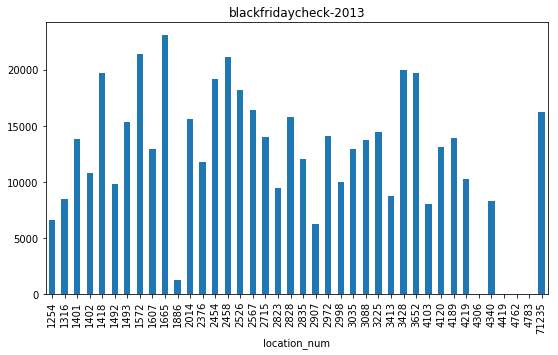

Best Shop during blackfridaycheck 3652 And total Sales 24487.86


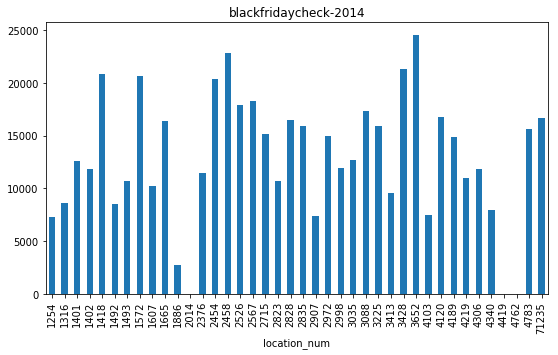

Best Shop during blackfridaycheck 4762 And total Sales 43586.0


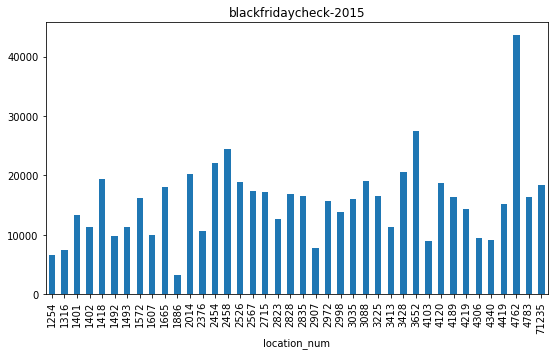

Best Shop during blackfridaycheck 4762 And total Sales 29564.42


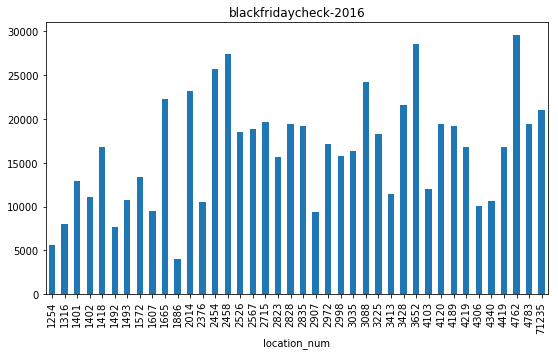

Best Shop during blackfridaycheck 4762 And total Sales 31950.87


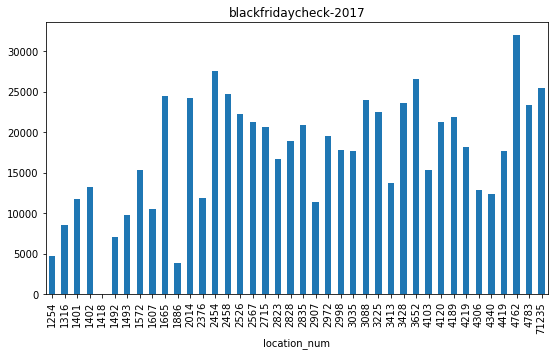

Null values are there
----------------------------------------------------------------------------------------------------


In [0]:
#Sales during different holidays of each shops over the years
for i in ['thanksgiving', 'christmas', 'onedaypriorchristmas_and_new_year','federalholiday', 'holiday', 'blackfridaycheck']:
    for j in data['year'].unique():
        test = data[(data[i] == 1) & (data['year'] == j) ]
        temp = test.groupby(['location_num']).sales.sum()
        try:
            print('Best Shop during ' + str(i),temp.idxmax(),'And total Sales',temp.max())
            temp.plot(kind = 'bar',figsize=(9,5), sharey = True)
            plt.title(i+'-'+str(j))
            plt.show()
        except:
            print('Null values are there')
    print('-'*100)
    

# **Modelling using Multi-varient Linear Regression for 4120**

In [0]:
#importing dataframe

d = data[data['location_num'] == 4120]
d2 = data[data['location_num'] == 4120]
d.head()

thanksgiving  christmas  ...  month  quarter
28              0          0  ...      1        1
72              0          0  ...      2        1
113             0          0  ...      2        1
150             0          0  ...      3        1
165             0          0  ...      4        2

[5 rows x 16 columns]

In [0]:
#Extracting the required Columns

d.drop(d.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,15]], axis=1, inplace=True)
d.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


year  month
28   2013      1
72   2013      2
113  2013      2
150  2013      3
165  2013      4

In [0]:
#Splitting into X and y for modelling
X = d.iloc[:,0:2]
y = d2.iloc[:,9]

yd = pd.DataFrame({'Year':d['year'],'month':d['month'],'sales':d2['sales']})
yd.head()


Year  month     sales
28   2013      1  13337.52
72   2013      2  11673.51
113  2013      2  14613.39
150  2013      3  12648.63
165  2013      4  12951.30

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [0]:
regressor = LinearRegression()  
regressor.fit(X, y)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Getting the intercepts of Linear Regression Model
b0 = regressor.intercept_ 
b1_year = regressor.coef_[0]  
b2_month = regressor.coef_[1] 
print('b0:',regressor.intercept_,'b1:',regressor.coef_[0],'b2:',regressor.coef_[1])

b0: -3524348.083302131 b1: 1755.8042000263604 b2: 228.38928095241062


In [0]:
#Predicting the sales for the next 4 months
import numpy as np
x1 = np.array([2018,2018,2018,2018])
x2 = np.array([8,9,10,11])
Y = []

Y = ((b1_year)*x1) + ((b2_month)*x2) + b0
    
print('The sales for the next 4 months are:', Y)
    


The sales for the next 4 months are: [20691.90659868 20920.29587964 21148.68516059 21377.07444154]


In [0]:
#To compare the Actual and Predicted values from the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state=9)
y_pred = regressor.predict(X_test)  
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(10)

Actual     Predicted
64573  22136.17  17865.466041
56646  27716.18  18707.713118
43270  22104.44  19778.349475
45366  17060.52  16038.351794
76401  11859.71  10999.328475
48015  20448.56  15196.104718
61559  22367.66  16723.519637
76348  10770.53  10542.549913
19055      0.00  13668.689799
37489      0.00  11912.885599

# Modelling Using Arima

In [0]:
#Loading the Dataframe
a = data[data['location_num'] == 4120]
d2 = data[data['location_num'] == 4120]
a.head()

thanksgiving  christmas  ...  month  quarter
28              0          0  ...      1        1
72              0          0  ...      2        1
113             0          0  ...      2        1
150             0          0  ...      3        1
165             0          0  ...      4        2

[5 rows x 16 columns]

In [0]:
#Getting the required Columns

a.drop(a.columns[[0,1,2,3,4,5,7,8,10,11,12,13,14,15]], axis=1, inplace=True)
a.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


business_date     sales
28     2013-01-25  13337.52
72     2013-02-05  11673.51
113    2013-02-28  14613.39
150    2013-03-13  12648.63
165    2013-04-18  12951.30

In [0]:
from matplotlib import pyplot
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
a.sales = a.sales.astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
#Converting Dataframes to the specified model which Arima could take 
a.reset_index(inplace = True)
a.head()

index business_date     sales
0     28    2013-01-25  13337.52
1     72    2013-02-05  11673.51
2    113    2013-02-28  14613.39
3    150    2013-03-13  12648.63
4    165    2013-04-18  12951.30

In [0]:
#Converting Dataframes to the specified model which Arima could take 
a.set_index('business_date',inplace = True)
a.head()

index     sales
business_date                 
2013-01-25        28  13337.52
2013-02-05        72  11673.51
2013-02-28       113  14613.39
2013-03-13       150  12648.63
2013-04-18       165  12951.30

In [0]:
#Converting Dataframes to the specified model which Arima could take 
a.drop('index',inplace = True,axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
#Converting Dataframes to the specified model which Arima could take 
a.columns

Index(['sales'], dtype='object')

In [0]:
a.head()

sales
business_date          
2013-01-25     13337.52
2013-02-05     11673.51
2013-02-28     14613.39
2013-03-13     12648.63
2013-04-18     12951.30

In [0]:
#Converting Dataframes to the specified model which Arima could take 
a.index

DatetimeIndex(['2013-01-25', '2013-02-05', '2013-02-28', '2013-03-13',
               '2013-04-18', '2013-05-12', '2013-06-09', '2013-06-18',
               '2013-06-30', '2013-07-09',
               ...
               '2017-08-22', '2017-10-31', '2017-11-08', '2017-11-09',
               '2017-12-16', '2017-12-21', '2018-03-29', '2018-04-26',
               '2018-04-27', '2018-07-28'],
              dtype='datetime64[ns]', name='business_date', length=2038, freq=None)

In [0]:
#Converting Dataframes to the specified model which Arima could take 
a  = a['sales'].resample('MS').mean()

In [0]:
a.head()


business_date
2013-01-01    10476.338065
2013-02-01    11360.194286
2013-03-01    11462.157419
2013-04-01    11241.285000
2013-05-01    11811.524839
Freq: MS, Name: sales, dtype: float64

                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   66
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -539.772
Method:                       css-mle   S.D. of innovations            854.057
Date:                Wed, 17 Jul 2019   AIC                           1093.545
Time:                        05:28:18   BIC                           1108.872
Sample:                    02-01-2013   HQIC                          1099.601
                         - 07-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           149.4148     36.287      4.118      0.000      78.293     220.536
ar.L1.D.sales    -0.6594      0.113     -5.845      0.000      -0.881      -0.438
ar.L2.D.sales    -0.4121      0.136     

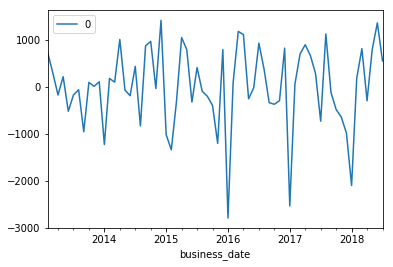

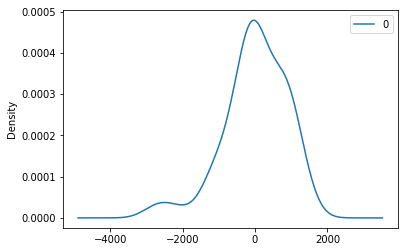

                 0
count    66.000000
mean      8.928366
std     863.102720
min   -2785.105190
25%    -329.371336
50%      38.778379
75%     727.066023
max    1417.901682


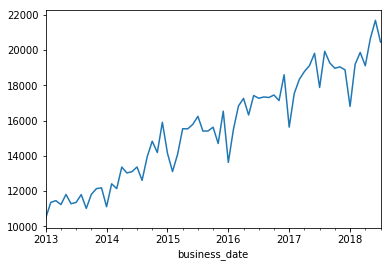

In [0]:
#fit model
from matplotlib import pyplot
model = ARIMA(a, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())
a.plot()
pyplot.show()



In [0]:
#Forecasting
forecast = model_fit.forecast(steps=5)[0]
print('Prediction of next 5 months is', forecast)

Prediction of next 5 months is [20885.74870406 21147.26901595 20662.7095425  21185.1404973
 21763.93299906]


Predicted=17655.574504, Expected=17316.597000
Predicted=17709.406536, Expected=17455.760000
Predicted=17567.979578, Expected=17141.102333
Predicted=17764.526982, Expected=18607.064839
Predicted=18169.279240, Expected=15634.591935
Predicted=17694.236855, Expected=17545.595714
Predicted=17499.282469, Expected=18344.337419
Predicted=17870.222323, Expected=18788.641667
Predicted=18338.611246, Expected=19125.716774
Predicted=18955.976141, Expected=19824.749667
Predicted=18621.644369, Expected=17884.719677
Predicted=18848.012286, Expected=19937.633226
Predicted=19308.242787, Expected=19277.834000
Predicted=19650.285784, Expected=18973.942581
Predicted=19777.619262, Expected=19053.109000
Predicted=19799.155801, Expected=18888.136774
Predicted=19137.485131, Expected=16806.807419
Predicted=19083.649103, Expected=19198.964286
Predicted=18948.112262, Expected=19871.823548
Predicted=19449.807163, Expected=19116.446667
Predicted=19757.312575, Expected=20663.832903
Predicted=20061.248082, Expected=2

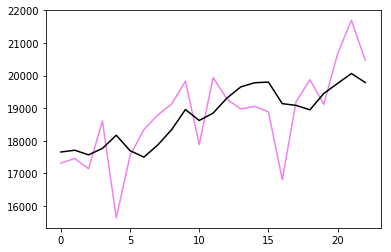

In [0]:
from sklearn.metrics import mean_squared_error
X_ = a.values
size = int(len(X_) * 0.66)
train, test = X_[0:size], X_[size:len(X_)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Predicted=%f, Expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test,color='violet')
pyplot.plot(predictions, color='black')
pyplot.show()


# Modelling Using Prophet

In [0]:
#Prophet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline

In [0]:
#Loading the Dataframe
a_ = data[data['location_num'] == 4120]
d2 = data[data['location_num'] == 4120]
a_.drop(a_.columns[[0,1,2,3,4,5,7,8,10,11,12,13,14,15]], axis=1, inplace=True)
a_.head()



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



business_date     sales
28     2013-01-25  13337.52
72     2013-02-05  11673.51
113    2013-02-28  14613.39
150    2013-03-13  12648.63
165    2013-04-18  12951.30

In [0]:
#Converting Dataframes to the specified model which Prophet could take 
a_ = a_[['business_date', 'sales']].dropna()

a_['business_date'] = pd.to_datetime(a_['business_date'])
a_ = a_.set_index('business_date')

daily_df = a_['sales'].resample('D').mean()
d_df = daily_df.reset_index().dropna()


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


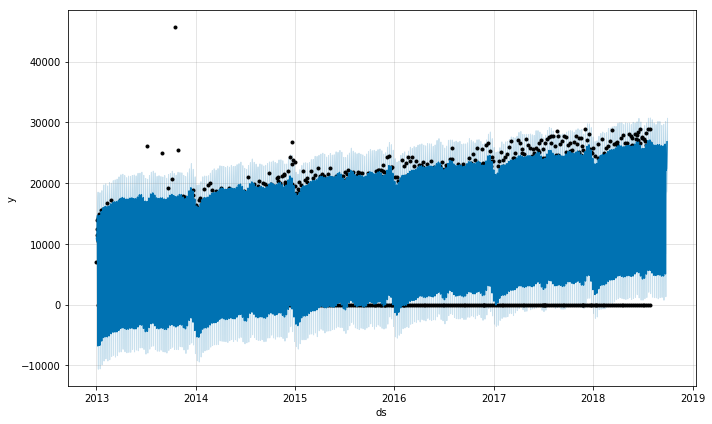

In [0]:
#Fitting the Model
d_df.columns = ['ds', 'y']

m = Prophet()
m.fit(d_df)

future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig = m.plot(forecast)

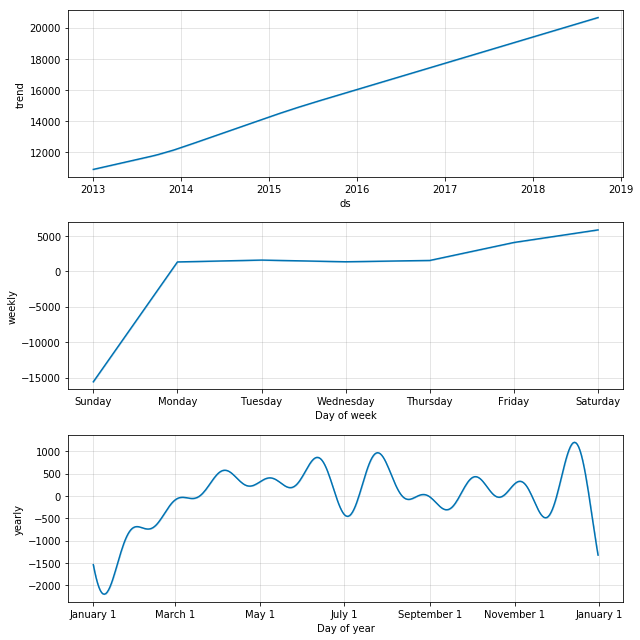

In [0]:
fig2 = m.plot_components(forecast)

In [0]:
#Taking the crossvalidation Matrics
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='60 days')
df_p = performance_metrics(df_cv)
df_p.head(5)


INFO:fbprophet:Making 54 forecasts with cutoffs between 2014-01-23 00:00:00 and 2018-06-01 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0


horizon           mse         rmse          mae  coverage
0  6 days  4.367770e+06  2089.920960  1491.200345  0.929012
1  7 days  4.611339e+06  2147.402892  1544.077168  0.932099
2  8 days  6.573250e+06  2563.834983  1639.214344  0.929012
3  9 days  8.339761e+06  2887.864357  1745.811083  0.919753
4 10 days  1.035152e+07  3217.377949  1888.623865  0.919753

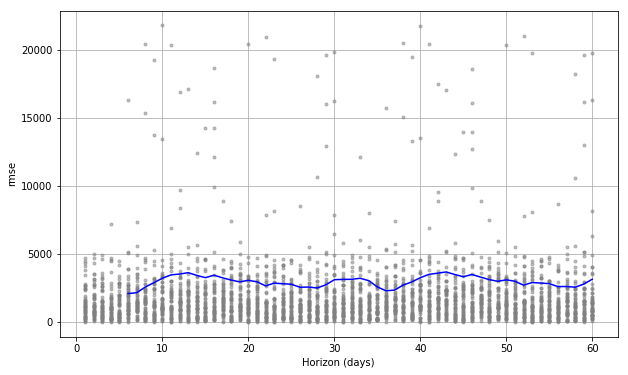

In [0]:

#Plotting the result
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')